### Projet Machine Learning : Notebook R

In [1]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(dplyr)
library(naniar)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement 

### I. Analyse exploratoire des données

In [2]:
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
df <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", dec="." ,header = TRUE)
# Premières lignes du jeu de données
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.P.Km2. Land

1. Commencez par vérifier la nature des différentes variables et leur encodage. Convertissez la variable
Year en une variable qualitative. N.B. Curieusement, la variable Density (P/Km2) n’est pas con-
sidérée comme une variable numérique. Convertissez-là en une variable numérique en prenant soin de
ne pas transformer les nombre décimaux en NA. Par exemple, en R, vous pourrez utiliser la formule:
as.numeric(gsub(",","",data$Density.n.P.Km2.)), où data représente le jeu de données utilisé.

In [3]:
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.P.Km2. Land

In [4]:
print("---Variable Year---")

df[,"Year"] <- as.factor(df[,"Year"])
summary(df["Year"])

print("---Variable Entity---")

df[,"Entity"] <- as.factor(df[,"Entity"])
summary(df["Entity"])

print("---Variable Density.P.Km2.---")

df[,"Density.P.Km2."] <- as.numeric(gsub(",",".",(df[,"Density.P.Km2."])))
summary(df["Density.P.Km2."])

df_na <- df #on stocke df avec les valeurs NA pour la partie 'complétion de variables'

[1] "---Variable Year---"


      Year     
 2013   : 175  
 2014   : 175  
 2015   : 175  
 2016   : 175  
 2017   : 175  
 2018   : 175  
 (Other):2599  

[1] "---Variable Entity---"


                 Entity    
 Afghanistan        :  21  
 Albania            :  21  
 Algeria            :  21  
 Angola             :  21  
 Antigua and Barbuda:  21  
 Argentina          :  21  
 (Other)            :3523  

[1] "---Variable Density.P.Km2.---"


 Density.P.Km2.    
 Min.   :   1.265  
 1st Qu.:  26.000  
 Median :  81.000  
 Mean   : 137.058  
 3rd Qu.: 203.000  
 Max.   :1281.000  
 NA's   :1         

2. Déterminez le taux de valeurs manquantes pour chaque variable.
On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im-
portant: Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

On affiche ici la proportion de valeurs manquantes pour chacune des variables : 

[1] "0 : Entity"
[1] "0 : Year"
[1] "0.274047684297068 : Access.to.electricity....of.population."
[1] "4.63140586462044 : Access.to.clean.fuels.for.cooking"
[1] "25.513839408057 : Renewable.electricity.generating.capacity.per.capita"
[1] "57.2485612496574 : Financial.flows.to.developing.countries..US..."
[1] "5.31652507536311 : Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] "0.575500137023842 : Electricity.from.fossil.fuels..TWh."
[1] "3.45300082214305 : Electricity.from.nuclear..TWh."
[1] "0.575500137023842 : Electricity.from.renewables..TWh."
[1] "1.15100027404768 : Low.carbon.electricity....electricity."
[1] "0 : Primary.energy.consumption.per.capita..kWh.person."
[1] "5.6727870649493 : Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] "11.7292408879145 : Value_co2_emissions_kt_by_country"
[1] "58.5639901342834 : Renewables....equivalent.primary.energy."
[1] "8.68731159221705 : gdp_growth"
[1] "7.72814469717731 : gdp_per_capita"
[1] "0.027404768

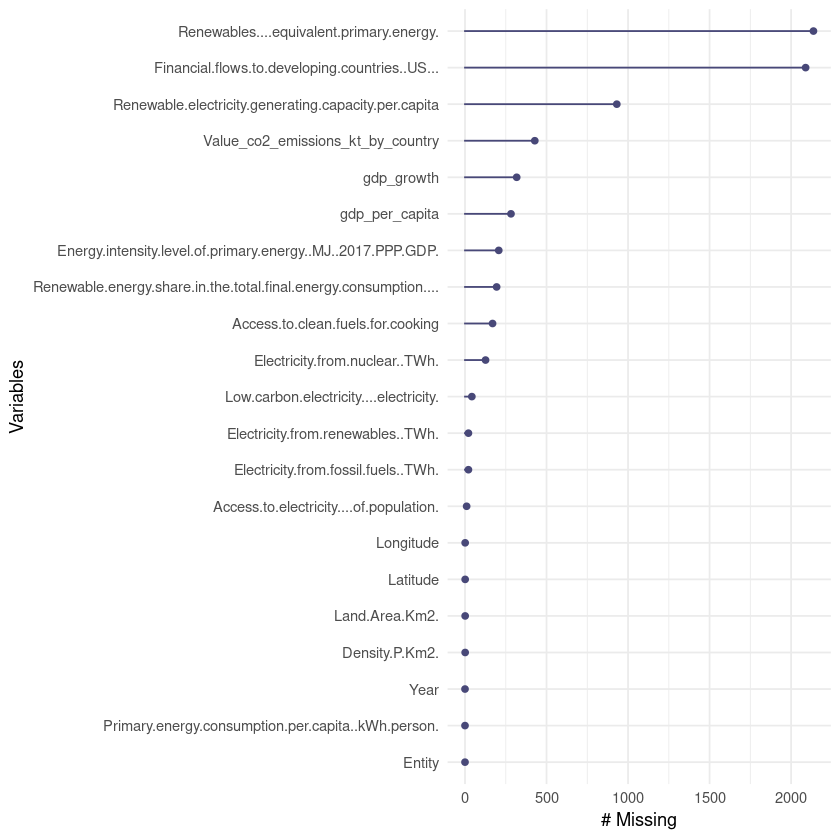

In [5]:
for (i in names(df))
  print(paste(sum(is.na(df[i])/nrow(df)*100) ,":", i))

gg_miss_var(df)

In [6]:
df <- subset(df, select = -c(Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.))

On enlève donc les colonnes inutiles, car présentant trop de données manquantes. (Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.)

In [7]:
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.31                              65.95744                              
2 0.50                              84.74577                              
3 0.56                              81.15942                              
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.P.Km2.
1  760                                     NA        NA       60            
2  730                                     NA        NA       60            
3 1030                                     NA  179.4266       60            
4 1220                               8.832278  190.6838       60            
5 1030                               1.414118  211.3821       60            
6 1550                              11.229715  242.0313       60            
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

3. Pour la suite de l’étude, vous allez créer un jeu de données comportant seulement les individus qui n’ont
pas de valeur manquante. Il reste alors 2868 observations

Nous modifions donc une nouvelle fois notre dataframe en supprimant maintenant toutes les lignes qui comportent au moins une valeur manquante.

In [8]:
df <- na.omit(df)

In [9]:
print(paste("Le jeu de données contient désormais",nrow(df),"lignes, après avoir supprimé les lignes comportant des valeurs manquantes"))

[1] "Le jeu de données contient désormais 2868 lignes, après avoir supprimé les lignes comportant des valeurs manquantes"


4. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?

Après avoir bien formaté notre dataframe nous pouvons passer à l'analyse descriptive de nos données. On commence par afficher les caractéristiques statistiques descriptives liées à nos données.

In [10]:
summary(df)

                 Entity          Year     
 Algeria            :  20   2014   : 147  
 Angola             :  20   2015   : 147  
 Antigua and Barbuda:  20   2016   : 146  
 Argentina          :  20   2017   : 146  
 Armenia            :  20   2018   : 146  
 Australia          :  20   2019   : 146  
 (Other)            :2748   (Other):1990  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 53.238                         1st Qu.: 22.07                   
 Median : 97.000                         Median : 81.55                   
 Mean   : 76.585                         Mean   : 62.17                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
                                                                          
 Renewable.energy.share.in.the.total.final.energy.consum

Avec le tableau ci-dessus, on se rend compte que beaucoup de variables prennent des grandes plages de valeurs. Par exemple, la variable 'Primary energy consumption per capita (kWh/person)' prend des valeurs entre 105 et 262585, avec une moyenne de 26082. Cette grosse différence d'echelle au sein d'une même colonne nous met sur la piste d'une potentielle transformation logarithmique des données.

Ci-dessous, nous allons afficher les données ainsi que leurs transformations logarithmiques, afin de se rendre compte graphiquement pour quelles variables la transformation est pertinente.

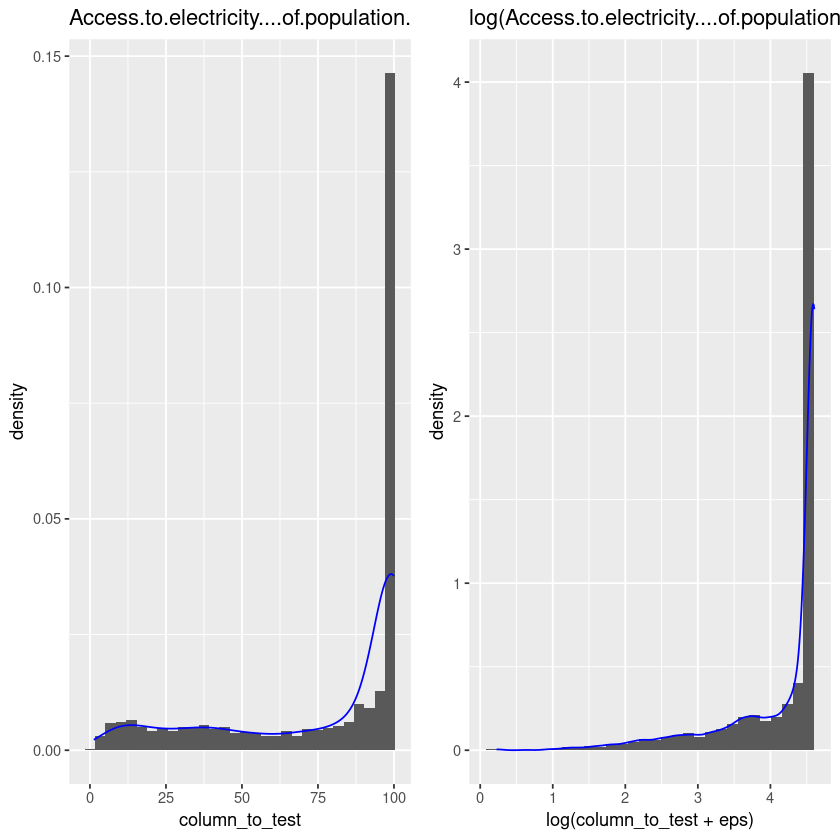

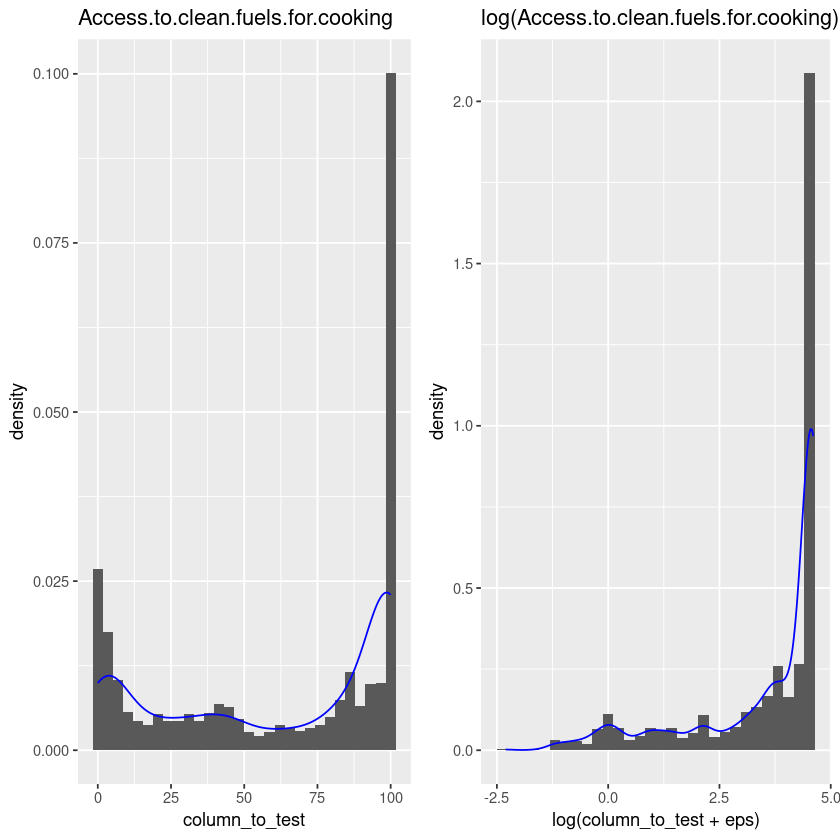

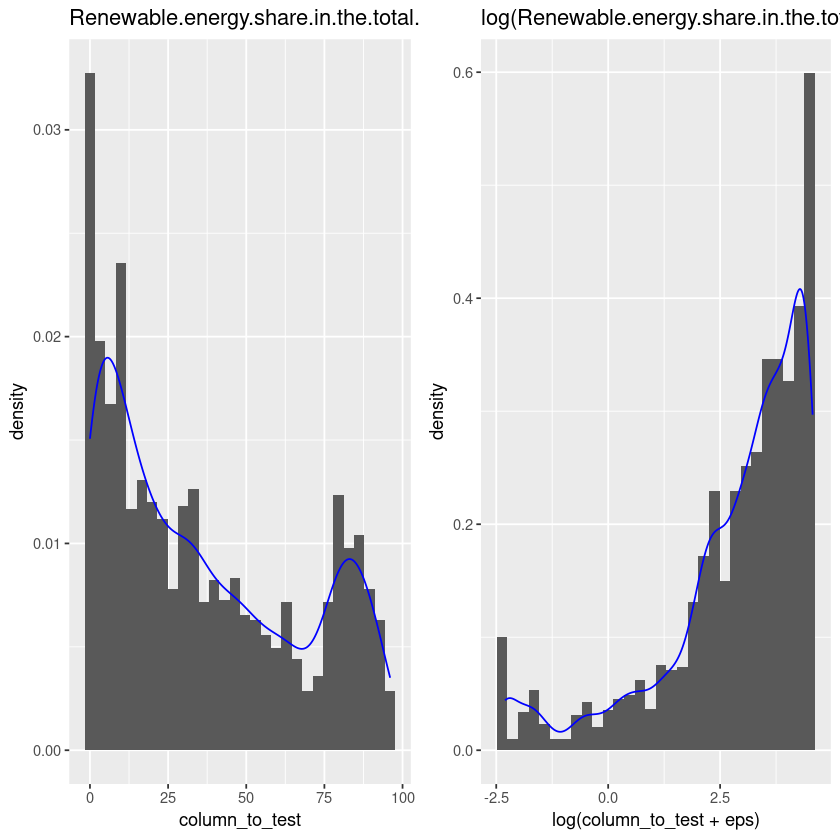

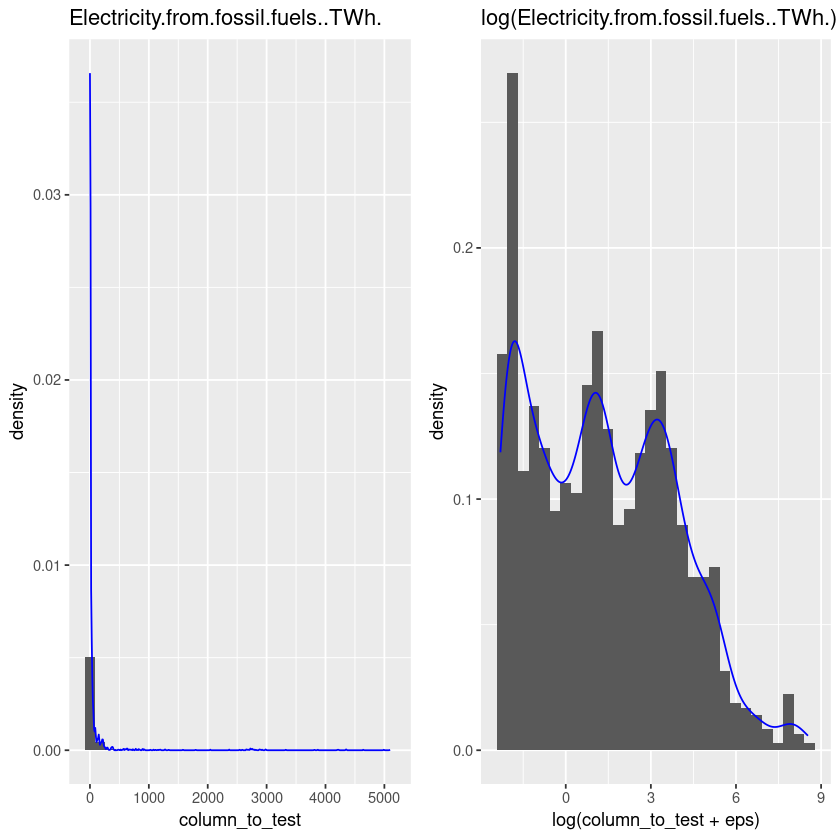

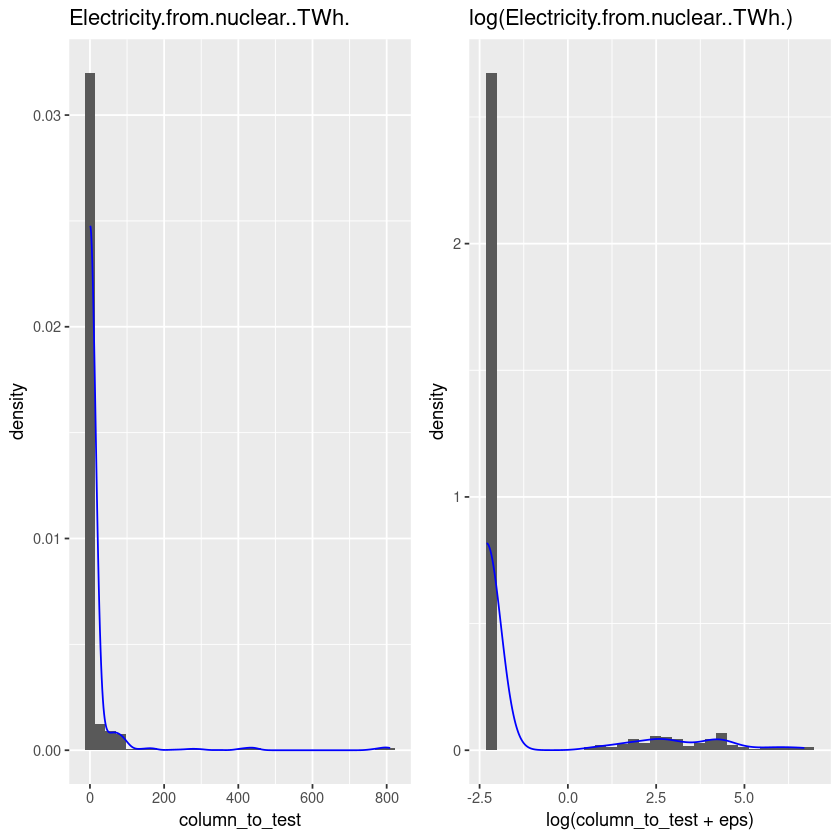

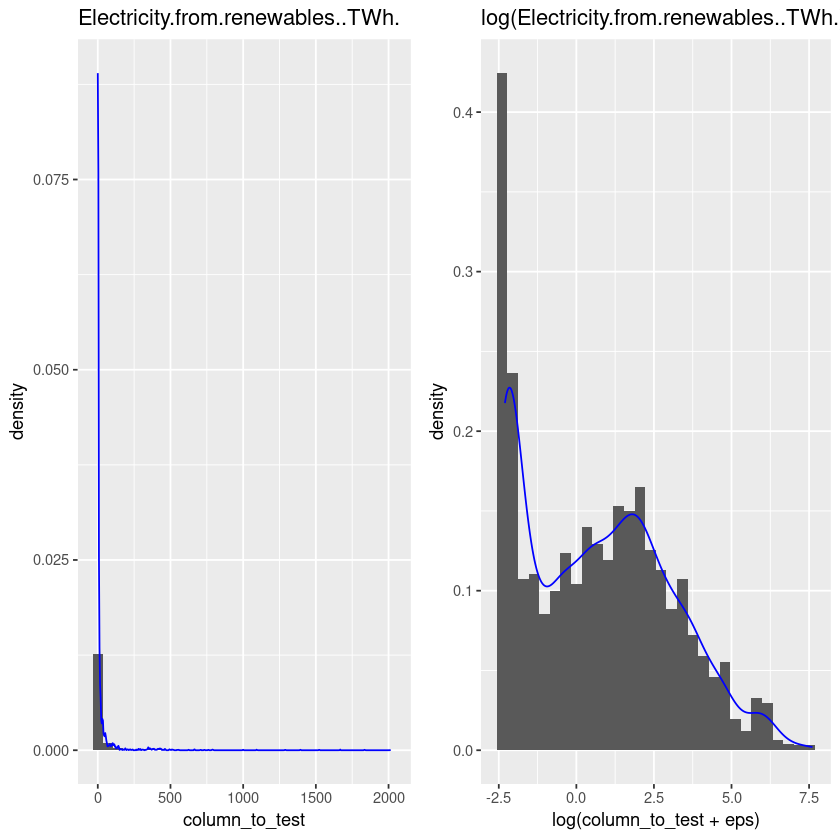

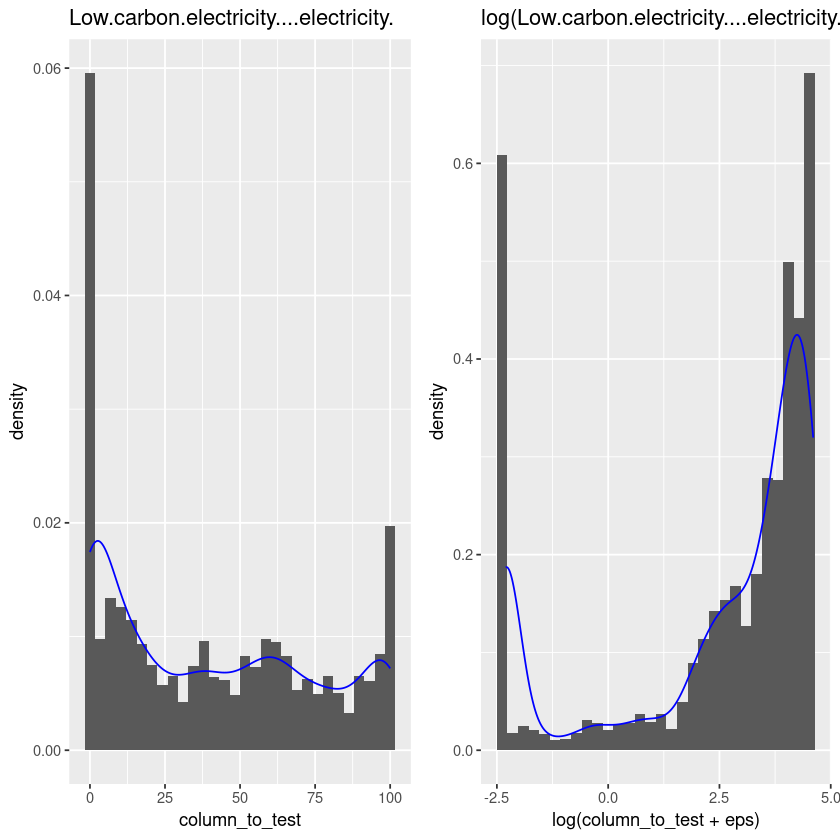

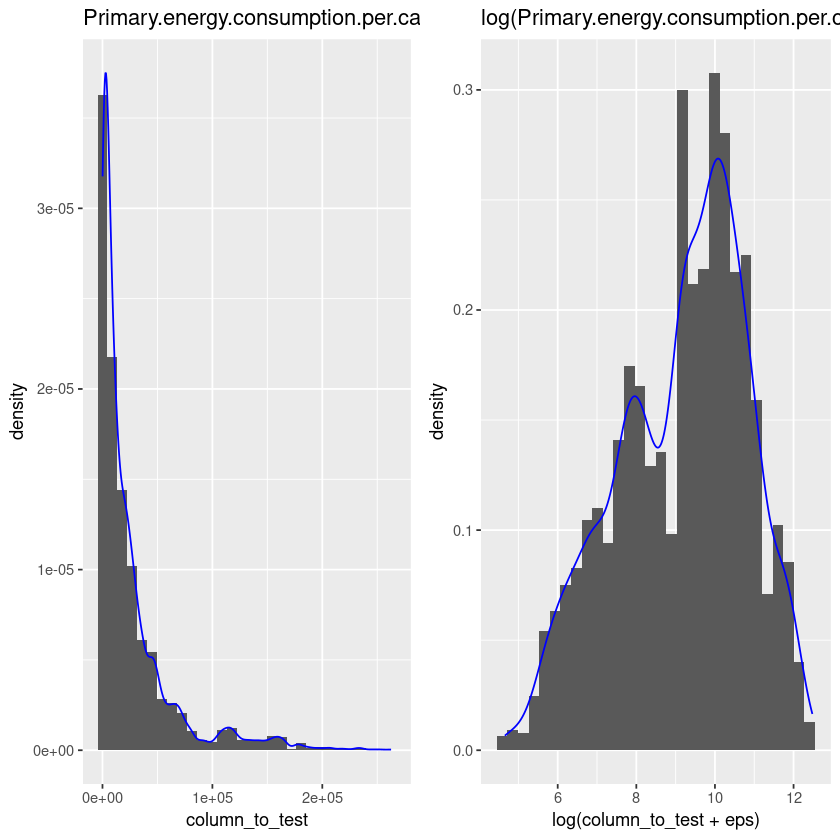

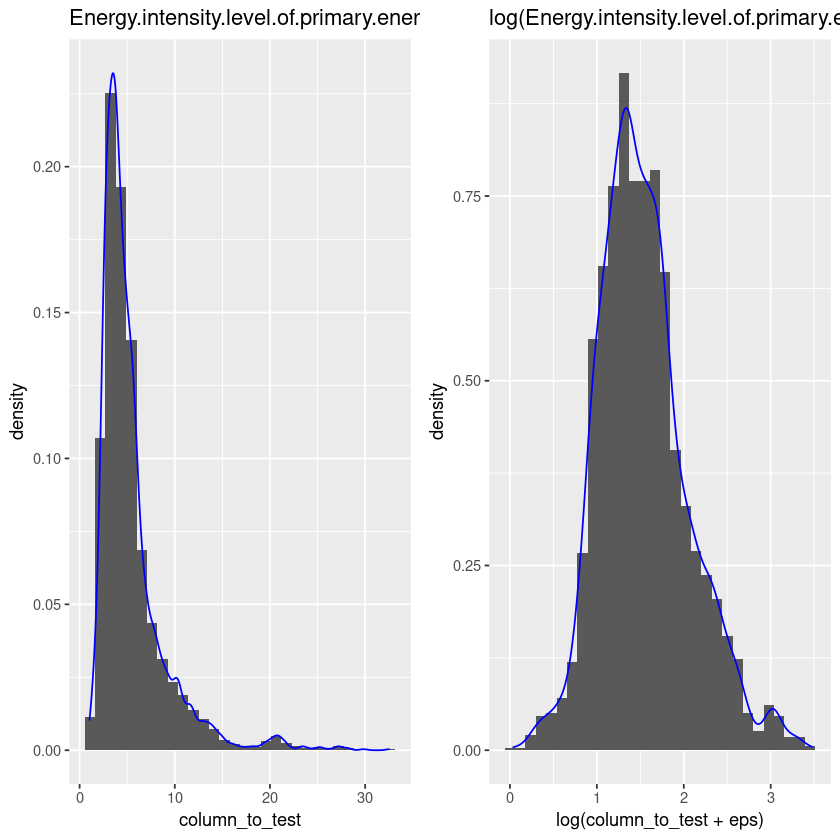

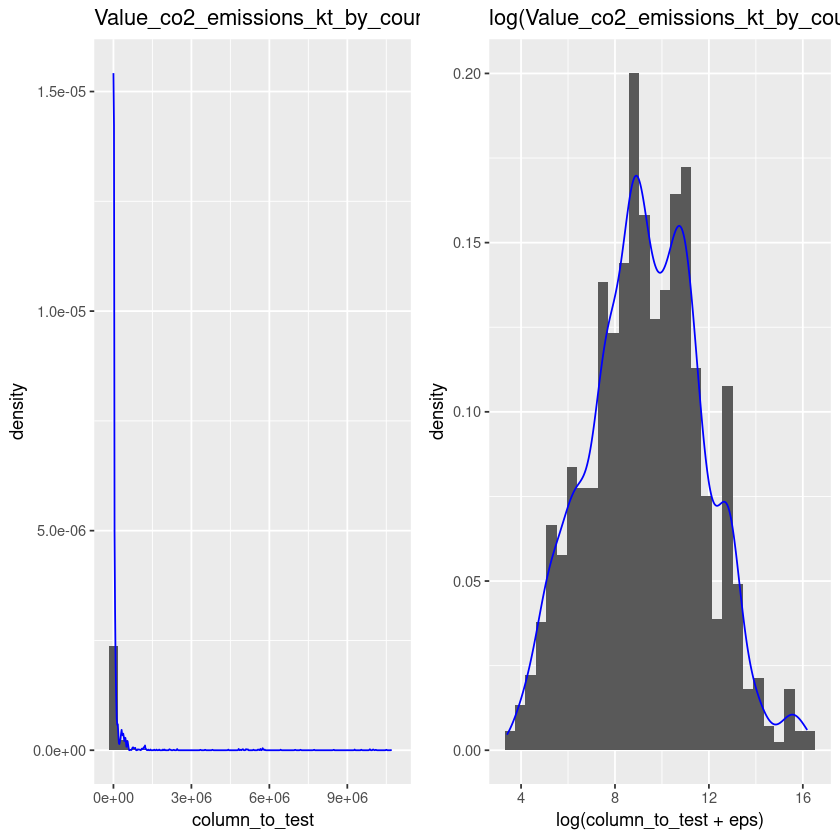

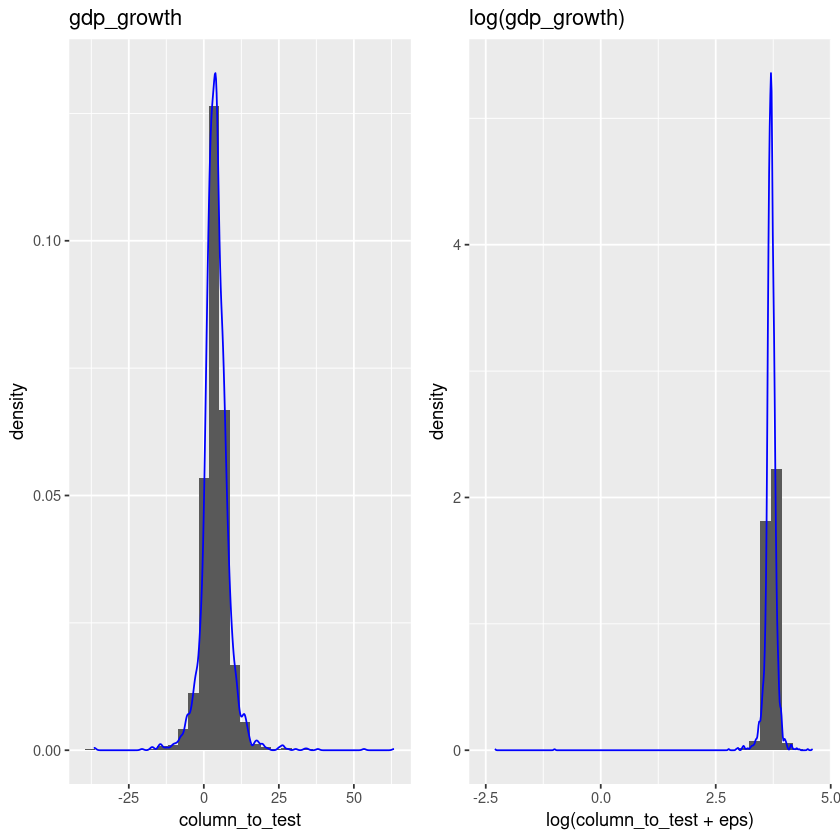

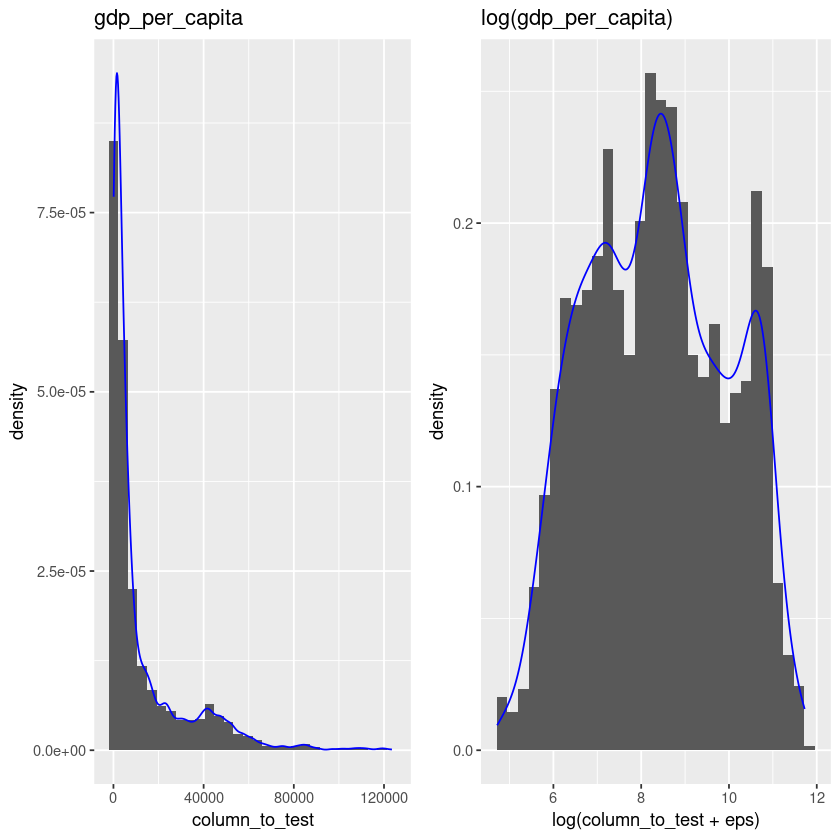

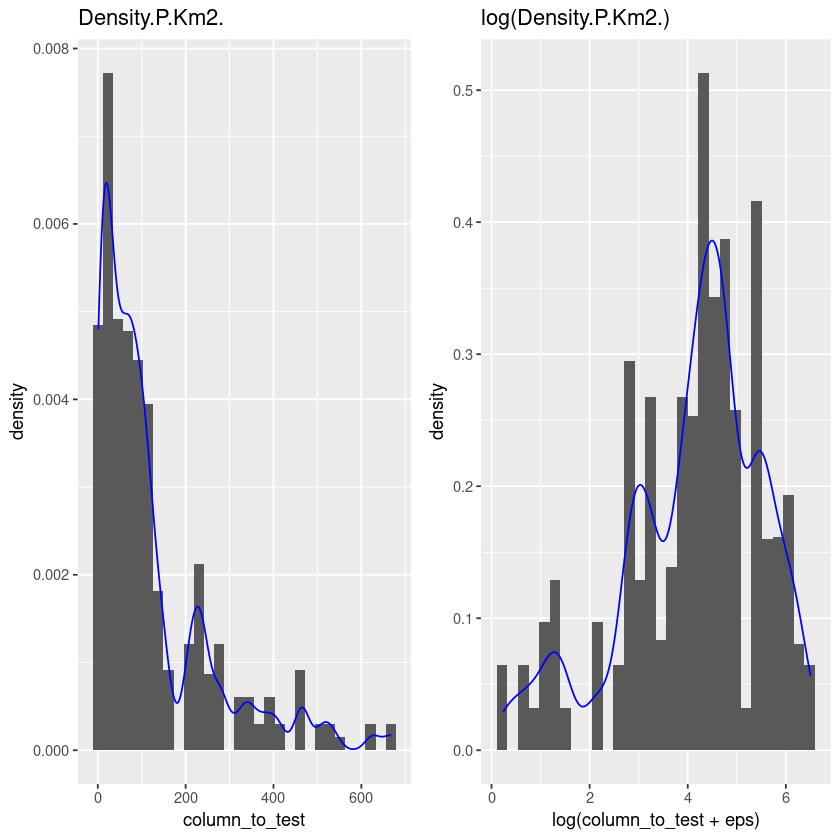

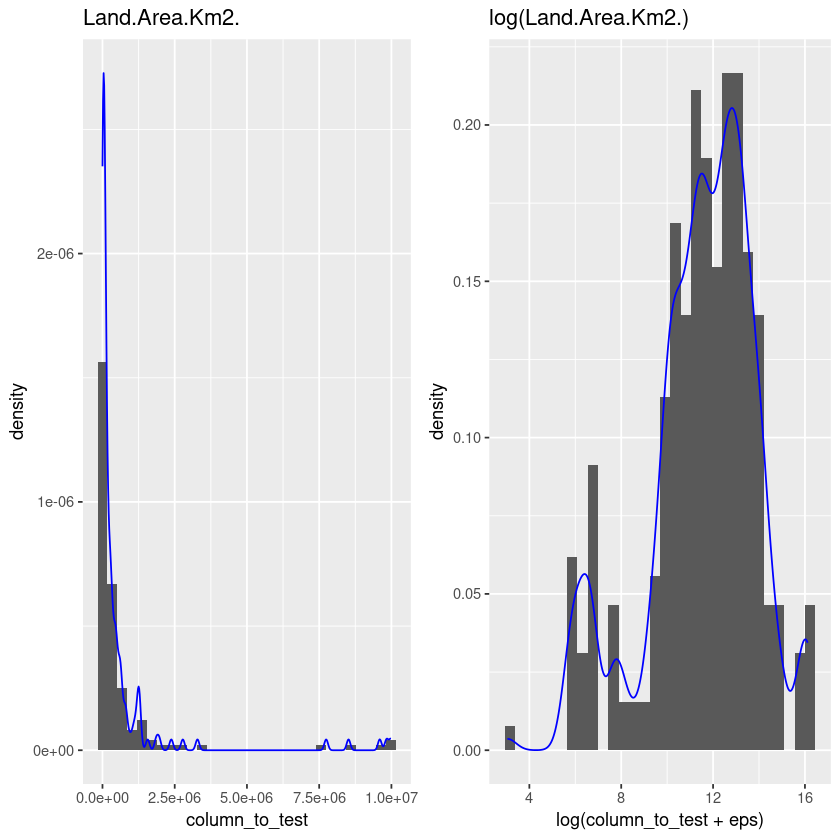

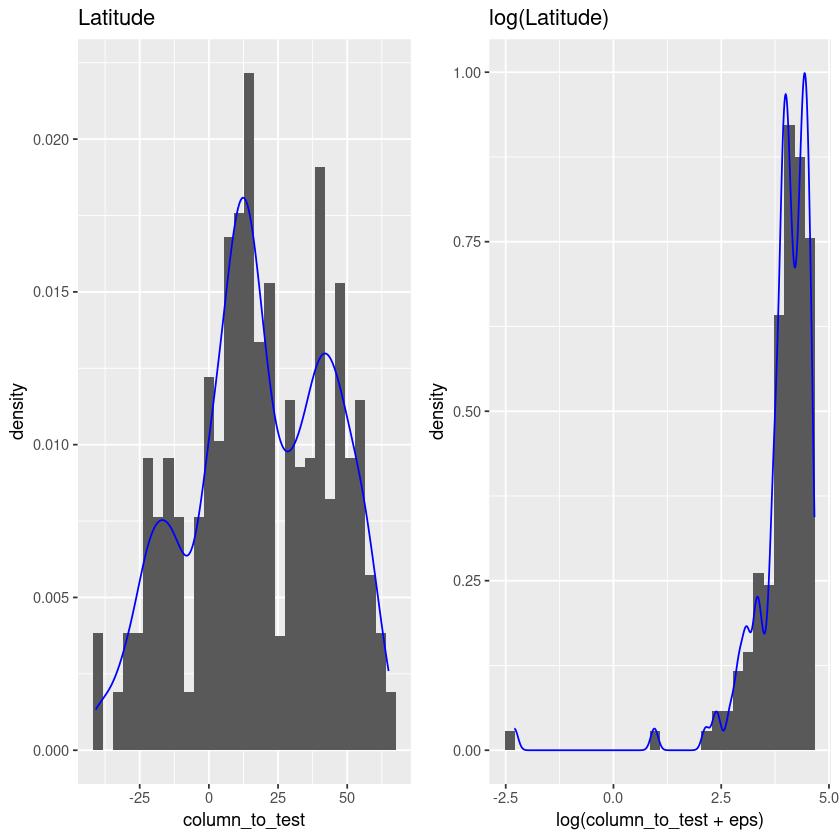

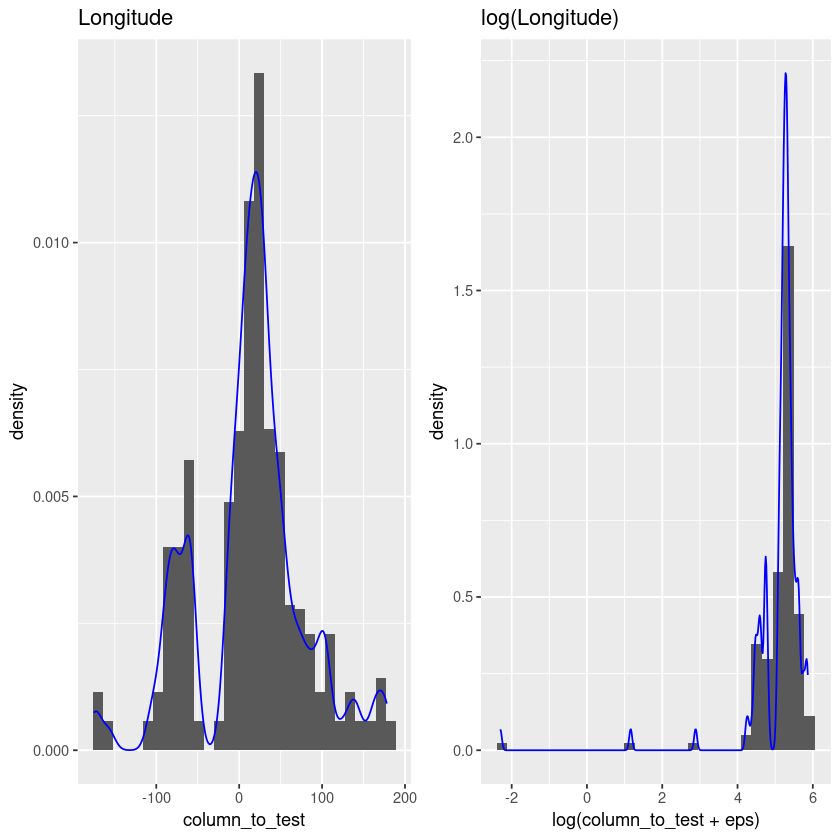

In [11]:
interesting_columns <- select(df, -c(Entity, Year))

for (i in 1:ncol(interesting_columns)){
    
  column_to_test = interesting_columns[,i]
  colname = colnames(interesting_columns)[i]
  
  eps = 0
  if (min(column_to_test)<=0){
    eps = abs(min(column_to_test)) + 0.1
  }
  
  g1<-ggplot(interesting_columns,aes(x=column_to_test))+
  geom_histogram(aes(y=after_stat(density)), bins = 30)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(colname)
  
  g2<-ggplot(interesting_columns,aes(x=log(column_to_test + eps)))+
  geom_histogram(aes(y=after_stat(density)), bins = 30)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(paste("log(",colname,")", sep=""))
  
  grid.arrange(g1, g2, ncol = 2)
  
}

Ci-dessus, nous affichons les données du dataframe ainsi que leurs transformations logarithmiques (en ajoutant un offset pour les données prenant des valeurs négatives ou nulles). On considère que la transfomation améliore nos données si la répartition de nos données transformées ressemble plus à une gaussienne. Ainsi, on peut dire que la transformation logarithmique est pertinente pour 6 colonnes que sont :

- 'Primary energy consumption per capita (kWh/person)'
- 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
- 'Value_co2_emissions_kt_by_country'
- 'gdp_per_capita'
- 'Density(P/Km2)'
- 'Land Area(Km2)'.

On décide de créer de nouvelles colonnes à notre dataframe pour sauvegarder nos transformations log. Par exemple pour la variable 'gdp_per_capita', nous avons la colonne d'origine et nous crééons 'log_gdp_per_capita' qui comporte le log de 'gdp_per_capita'.

In [12]:
df <- df %>% mutate(log_Primary.energy.consumption.per.capita..kWh.person. = log(Primary.energy.consumption.per.capita..kWh.person.),
                    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.),
                    log_gdp_per_capita = log(gdp_per_capita),
                    log_Value_co2_emissions_kt_by_country = log(Value_co2_emissions_kt_by_country),
                    log_Density.P.Km2. = log(Density.P.Km2.),
                    log_Land.Area.Km2. = log(Land.Area.Km2.))

head(df)

Entity      Year Access.to.electricity....of.population.
4 Afghanistan 2003 14.73851                               
5 Afghanistan 2004 20.06497                               
6 Afghanistan 2005 25.39089                               
7 Afghanistan 2006 30.71869                               
8 Afghanistan 2007 36.05101                               
9 Afghanistan 2008 42.40000                               
  Access.to.clean.fuels.for.cooking
4  9.50                            
5 10.90                            
6 12.20                            
7 13.85                            
8 15.30                            
9 16.70                            
  Renewable.energy.share.in.the.total.final.energy.consumption....
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
7 31.89                                                           
8 28.78                                                           
9 21.17                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
7 0.20                                0                             
8 0.20                                0                             
9 0.19                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
7 0.64                              76.19048                              
8 0.75                              78.94737                              
9 0.54                              73.97260                              
  Primary.energy.consumption.per.capita..kWh.person. ⋯ Density.P.Km2.
4 229.9682                                           ⋯ 60            
5 204.2312                                           ⋯ 60            
6 252.0691                                           ⋯ 60            
7 304.4209                                           ⋯ 60            
8 354.2799                                           ⋯ 60            
9 607.8335                                           ⋯ 60            
  Land.Area.Km2. Latitude Longitude
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995 
7 652230         33.93911 67.70995 
8 652230         33.93911 67.70995 
9 652230         33.93911 67.70995 
  log_Primary.energy.consumption.per.capita..kWh.person.
4 5.437941                                              
5 5.319253                                              
6 5.529703                                              
7 5.718411                                              
8 5.870087                                              
9 6.409901                                              
  log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
4 0.3364722                                                      
5 0.1823216                                                      
6 0.3435897                                                      
7 0.4054651                                                      
8 0.4252677                                                      
9 0.6626880                                                      
  log_gdp_per_capita log_Value_co2_emissions_kt_by_country log_Density.P.Km2.
4 5.250617           7.106606                              4.094345          
5 5.353667           6.937314                              4.094345          
6 5.489067           7.

5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. Quels sont les 5 pays les plus
émetteurs de CO2 ?

On s'intéresse désormais à la variable 'Value_co2_emissions_kt_by_country'.

On commence par trier les valeurs des émissions pour chaque pays et on affiche un barplot des 50 pays les plus émetteurs. On renvoie ensuite les valeurs des émissions de C02 pour les différents pays puis on affiche le barplot avec les 5 pays les plus émetteurs.

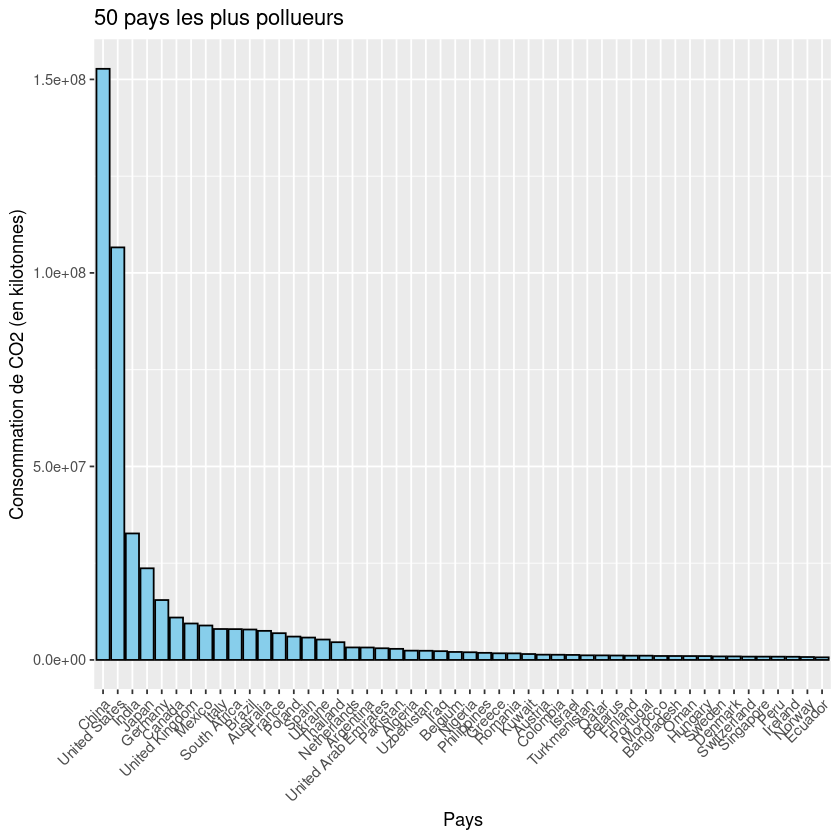

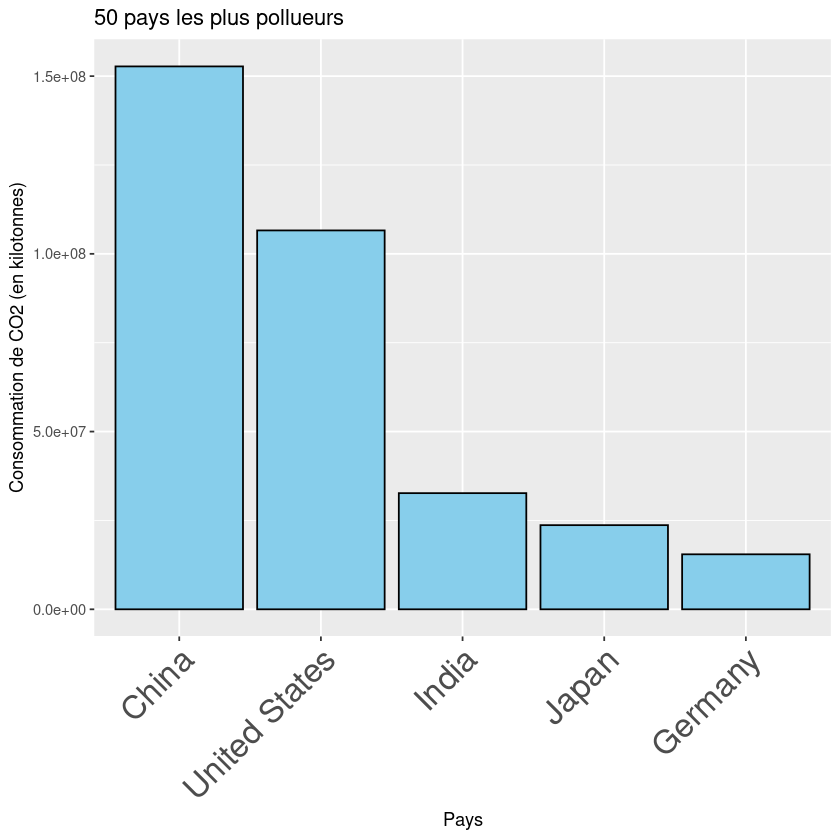

In [13]:
emissions_par_pays <- df %>% select(Entity,Value_co2_emissions_kt_by_country)

emissions_par_pays <- emissions_par_pays %>% ## on regroupe les pays en sommant leur consommation de co2
  group_by(Entity) %>%
  summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

emissions_par_pays<- emissions_par_pays %>% arrange(desc(Value_co2_emissions_kt_by_country)) ## on classe par ordre décroissant

#emissions_par_pays <- distinct(emissions_par_pays,Entity)
# On sélectionne les 50 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:50)

ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))


## On sélectionne les 5 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:5)
ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20))

On voit donc que 2 pays, à savoir la Chine et les Etats-Unis, émettent bien plus de C02 que les autres. L'inde, le Japon, et l'Allemagne font eux aussi partie des 5 pays les plus émetteurs.

6. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations... Analysez les dépendances entre
les variables quantitatives

Afin de poursuivre notre étude, on analyse le point de vue descriptif multidimensionnel, on commence par afficher la matrice de corrélation entre les différentes variables.

Cet affichage nous permet de voir qu'il existe une corrélation très importante (proche de 1 : 0.99) entre la variable à prédire 'Value_co2_emissions_kt_by_country' et 'Electricity from fossil fuels (TWh)'. De plus, on peut aussi noter une corrélation conséquente entre ''Value_co2_emissions_kt_by_country' et 'Electricity from renewables (TWh)'.

On peut aussi conclure des liens moins important entre 'log_Value_co2_emissions_kt_by_country' et 'Land Area(Km2)', 'Access to clean fuels for cooking', et 'log_Primary energy consumption per capita (kWh/person)'.

(Le graphique suivant est plus lisible sur le notebook Python)

In [14]:
library(corrplot)

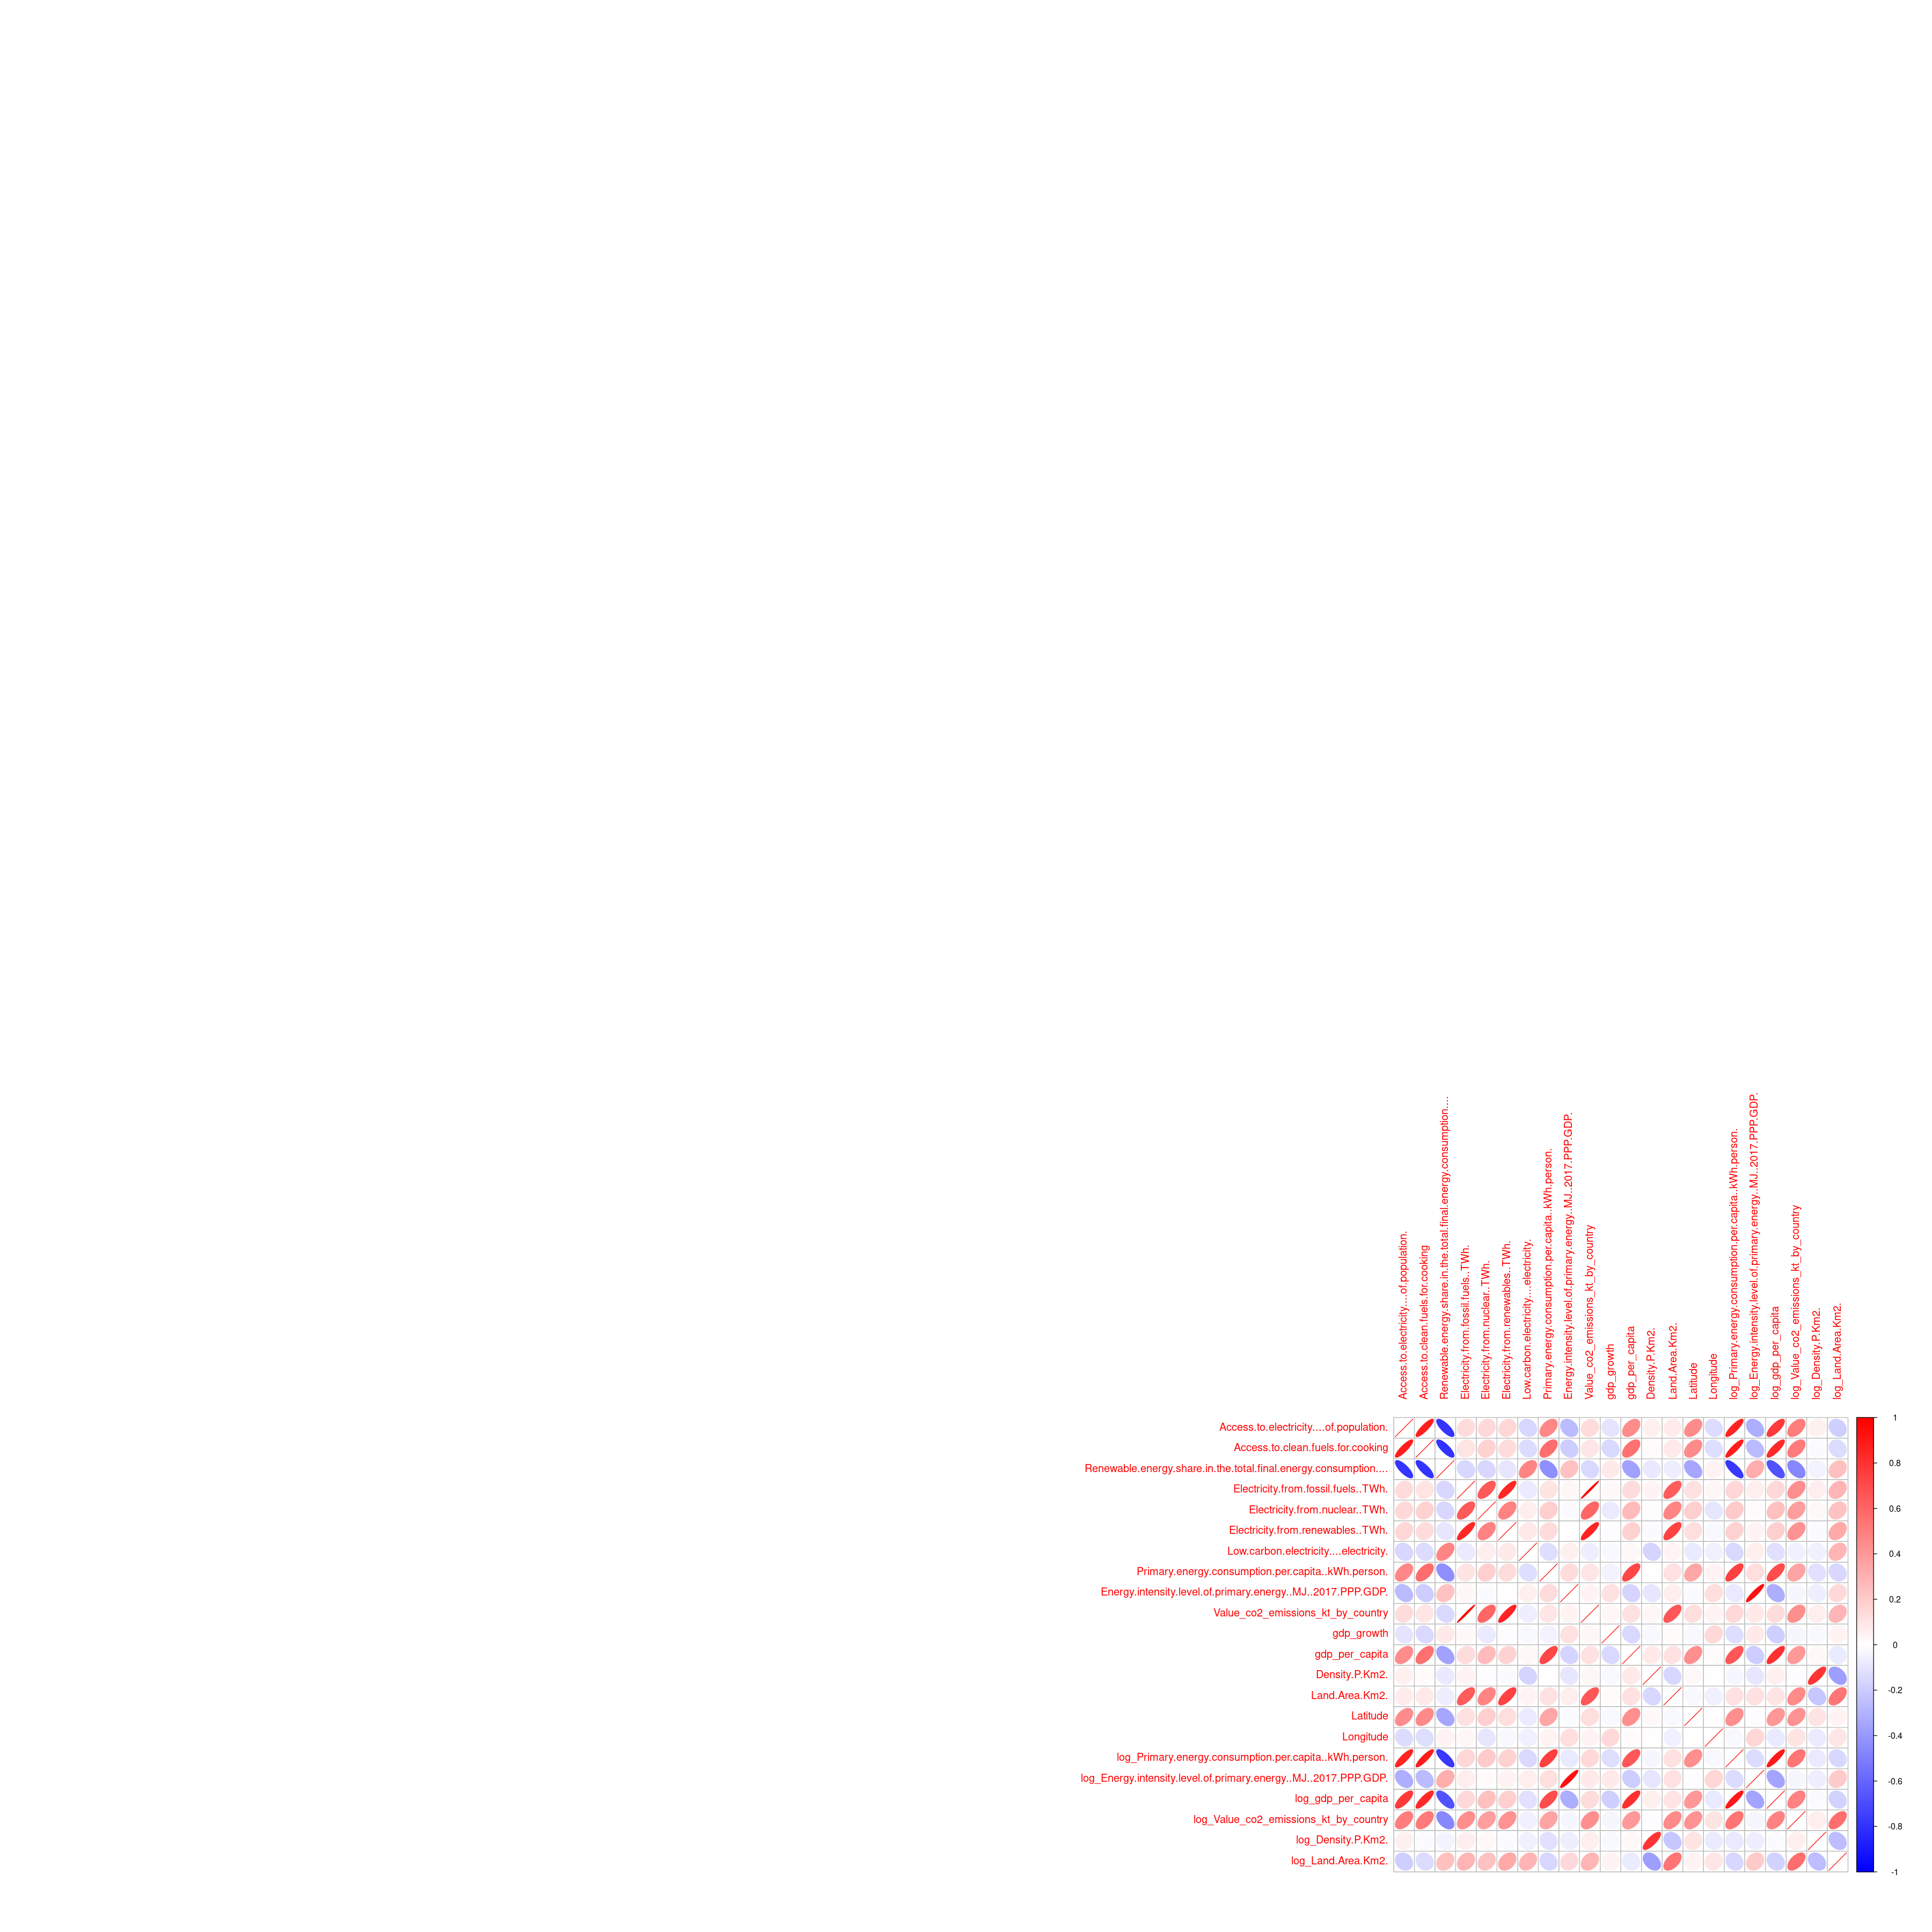

In [15]:
options(repr.plot.width=30, repr.plot.height=30)

coolwarm <- colorRampPalette(c("blue", "white", "red"))(200)
cor_matrix <- cor(select(df, -c(1,2))) 

corrplot(cor_matrix,
        method = "ellipse",
        col = coolwarm,
        tl.cex = 1)

On affiche également le nuage point des différentes variables, aux côtés du score de corrélation. Dû au grand nombre de variables, l'analyse de ce graphique reste compliquée.

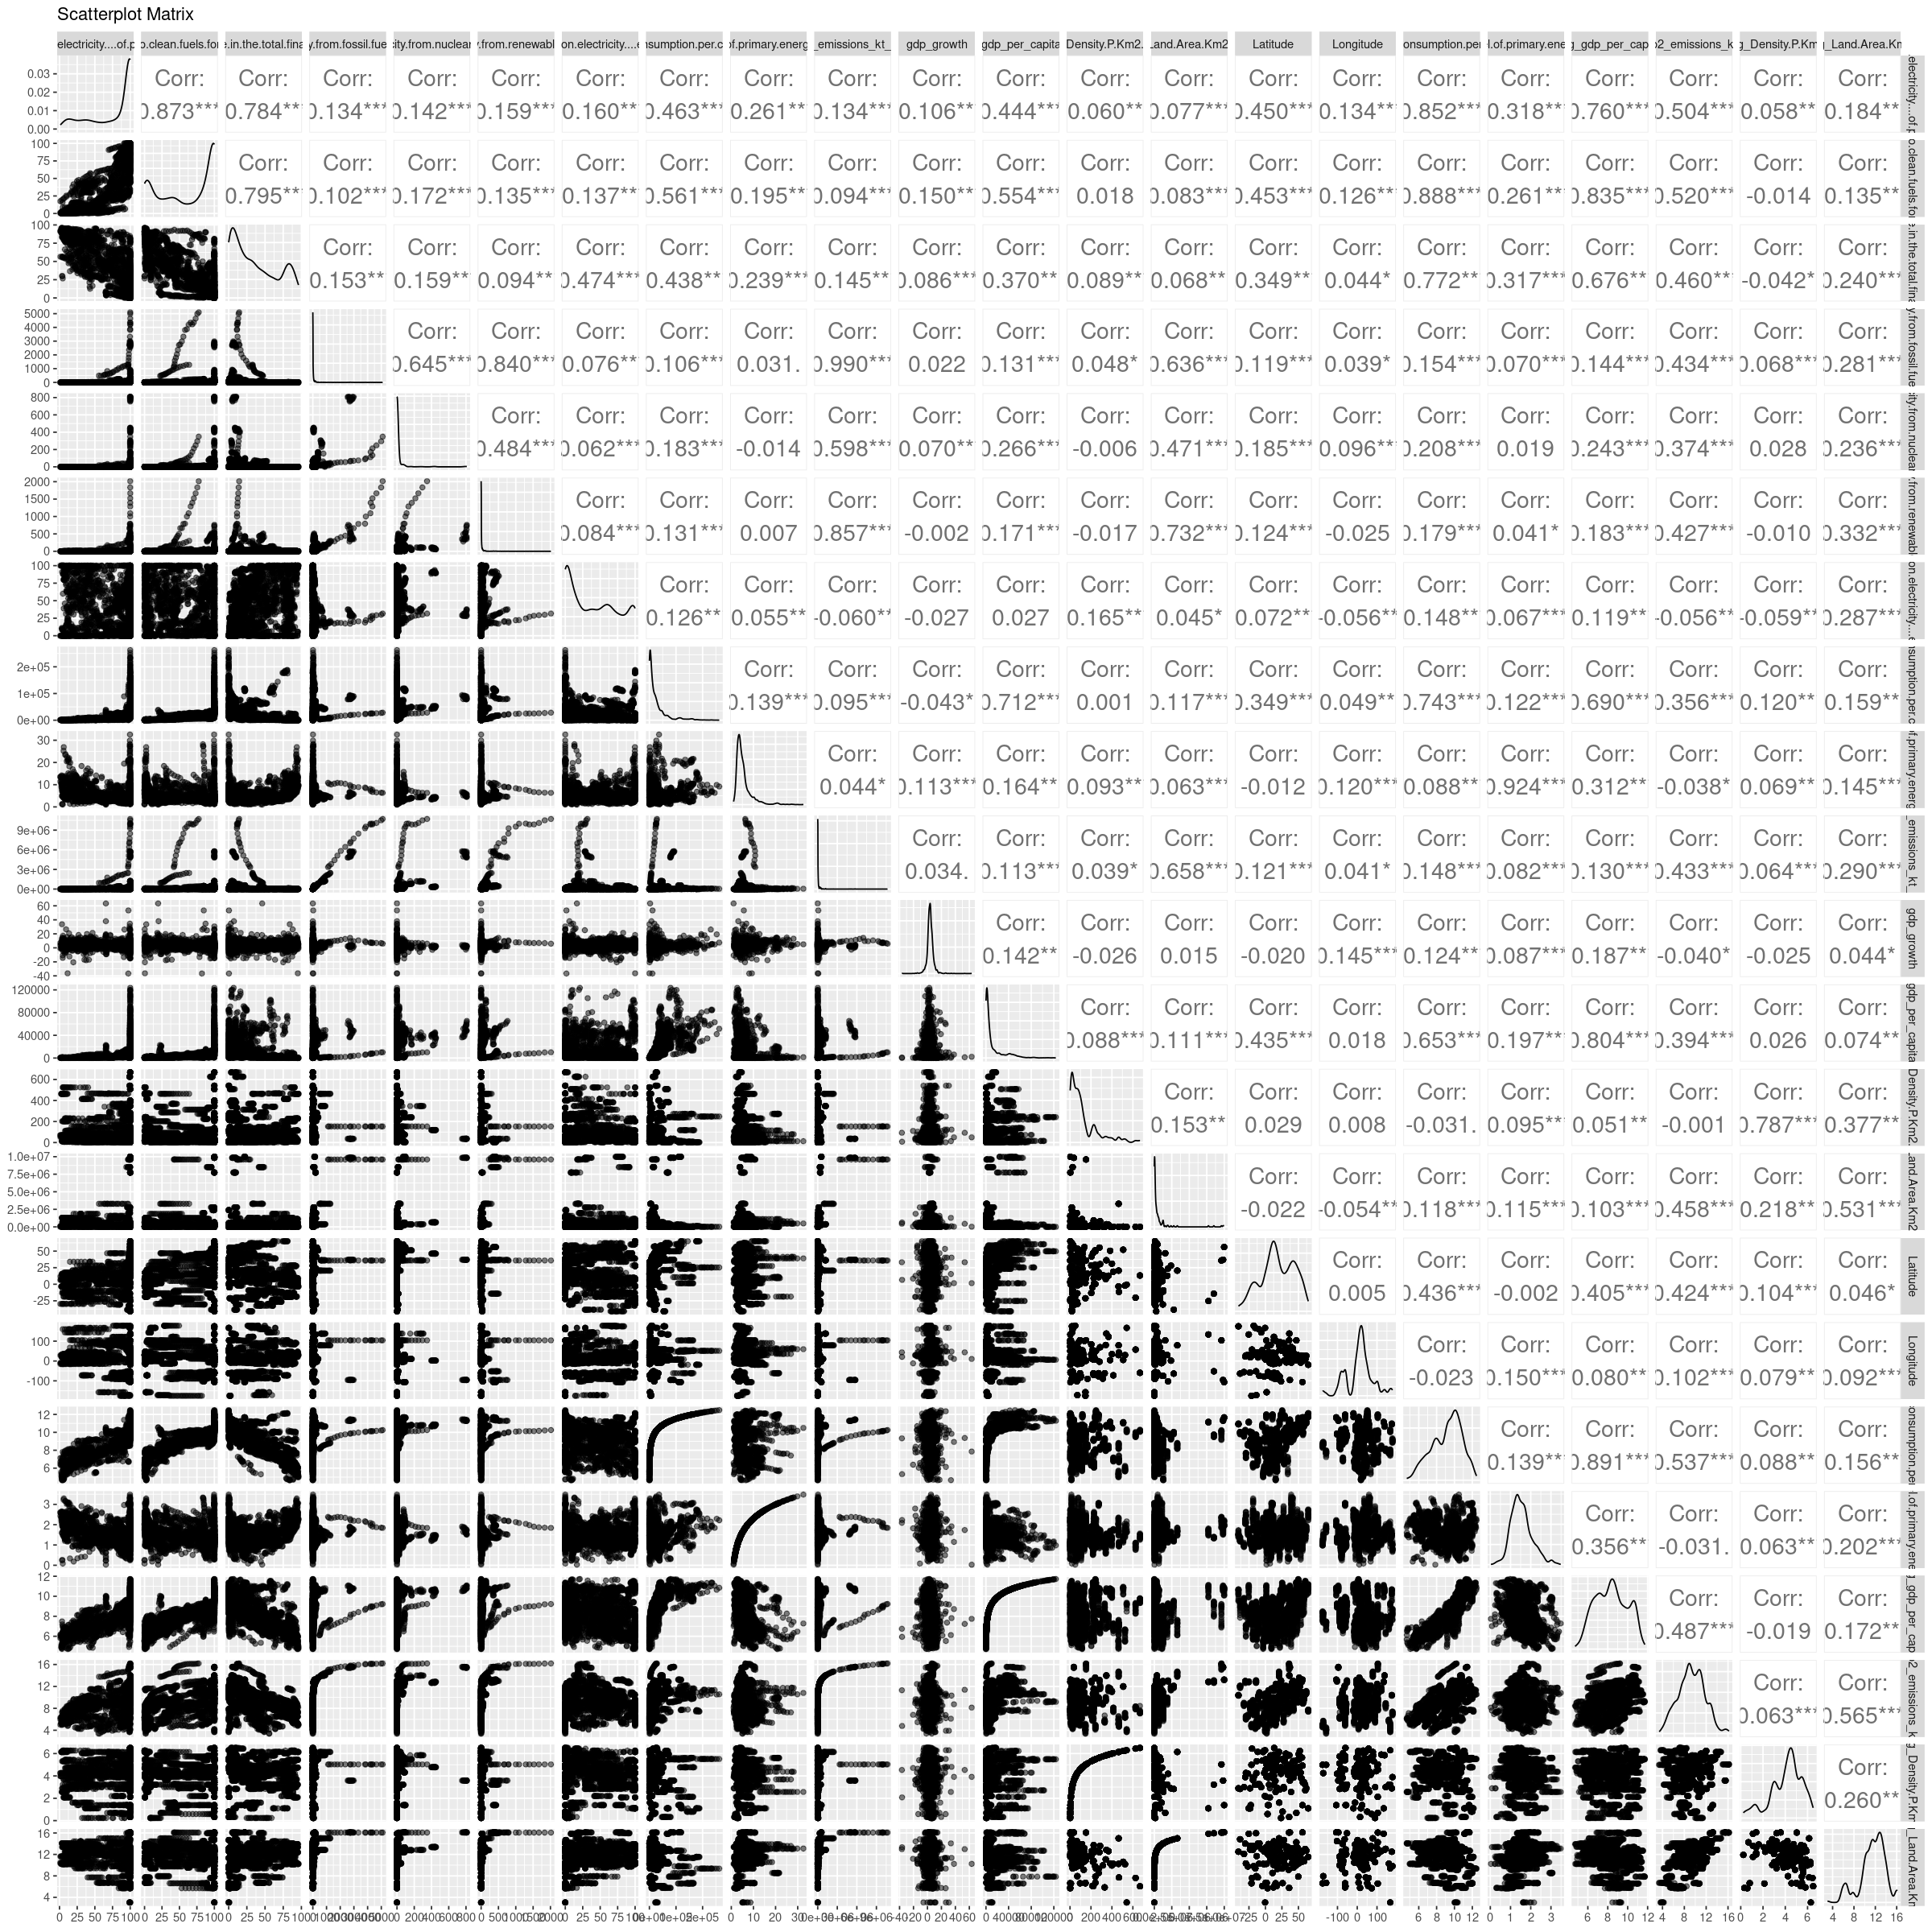

In [16]:
library(GGally)
data <- select(df, -c(1,2))

# Créer la scatterplot matrix
options(repr.plot.width=20, repr.plot.height=20)
ggpairs(data,
        upper = list(continuous = wrap("cor", size = 6)),
        lower = list(continuous = wrap("points", alpha = 0.5)),
        diag = list(continuous = wrap("densityDiag")),
        title = "Scatterplot Matrix")

7. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats

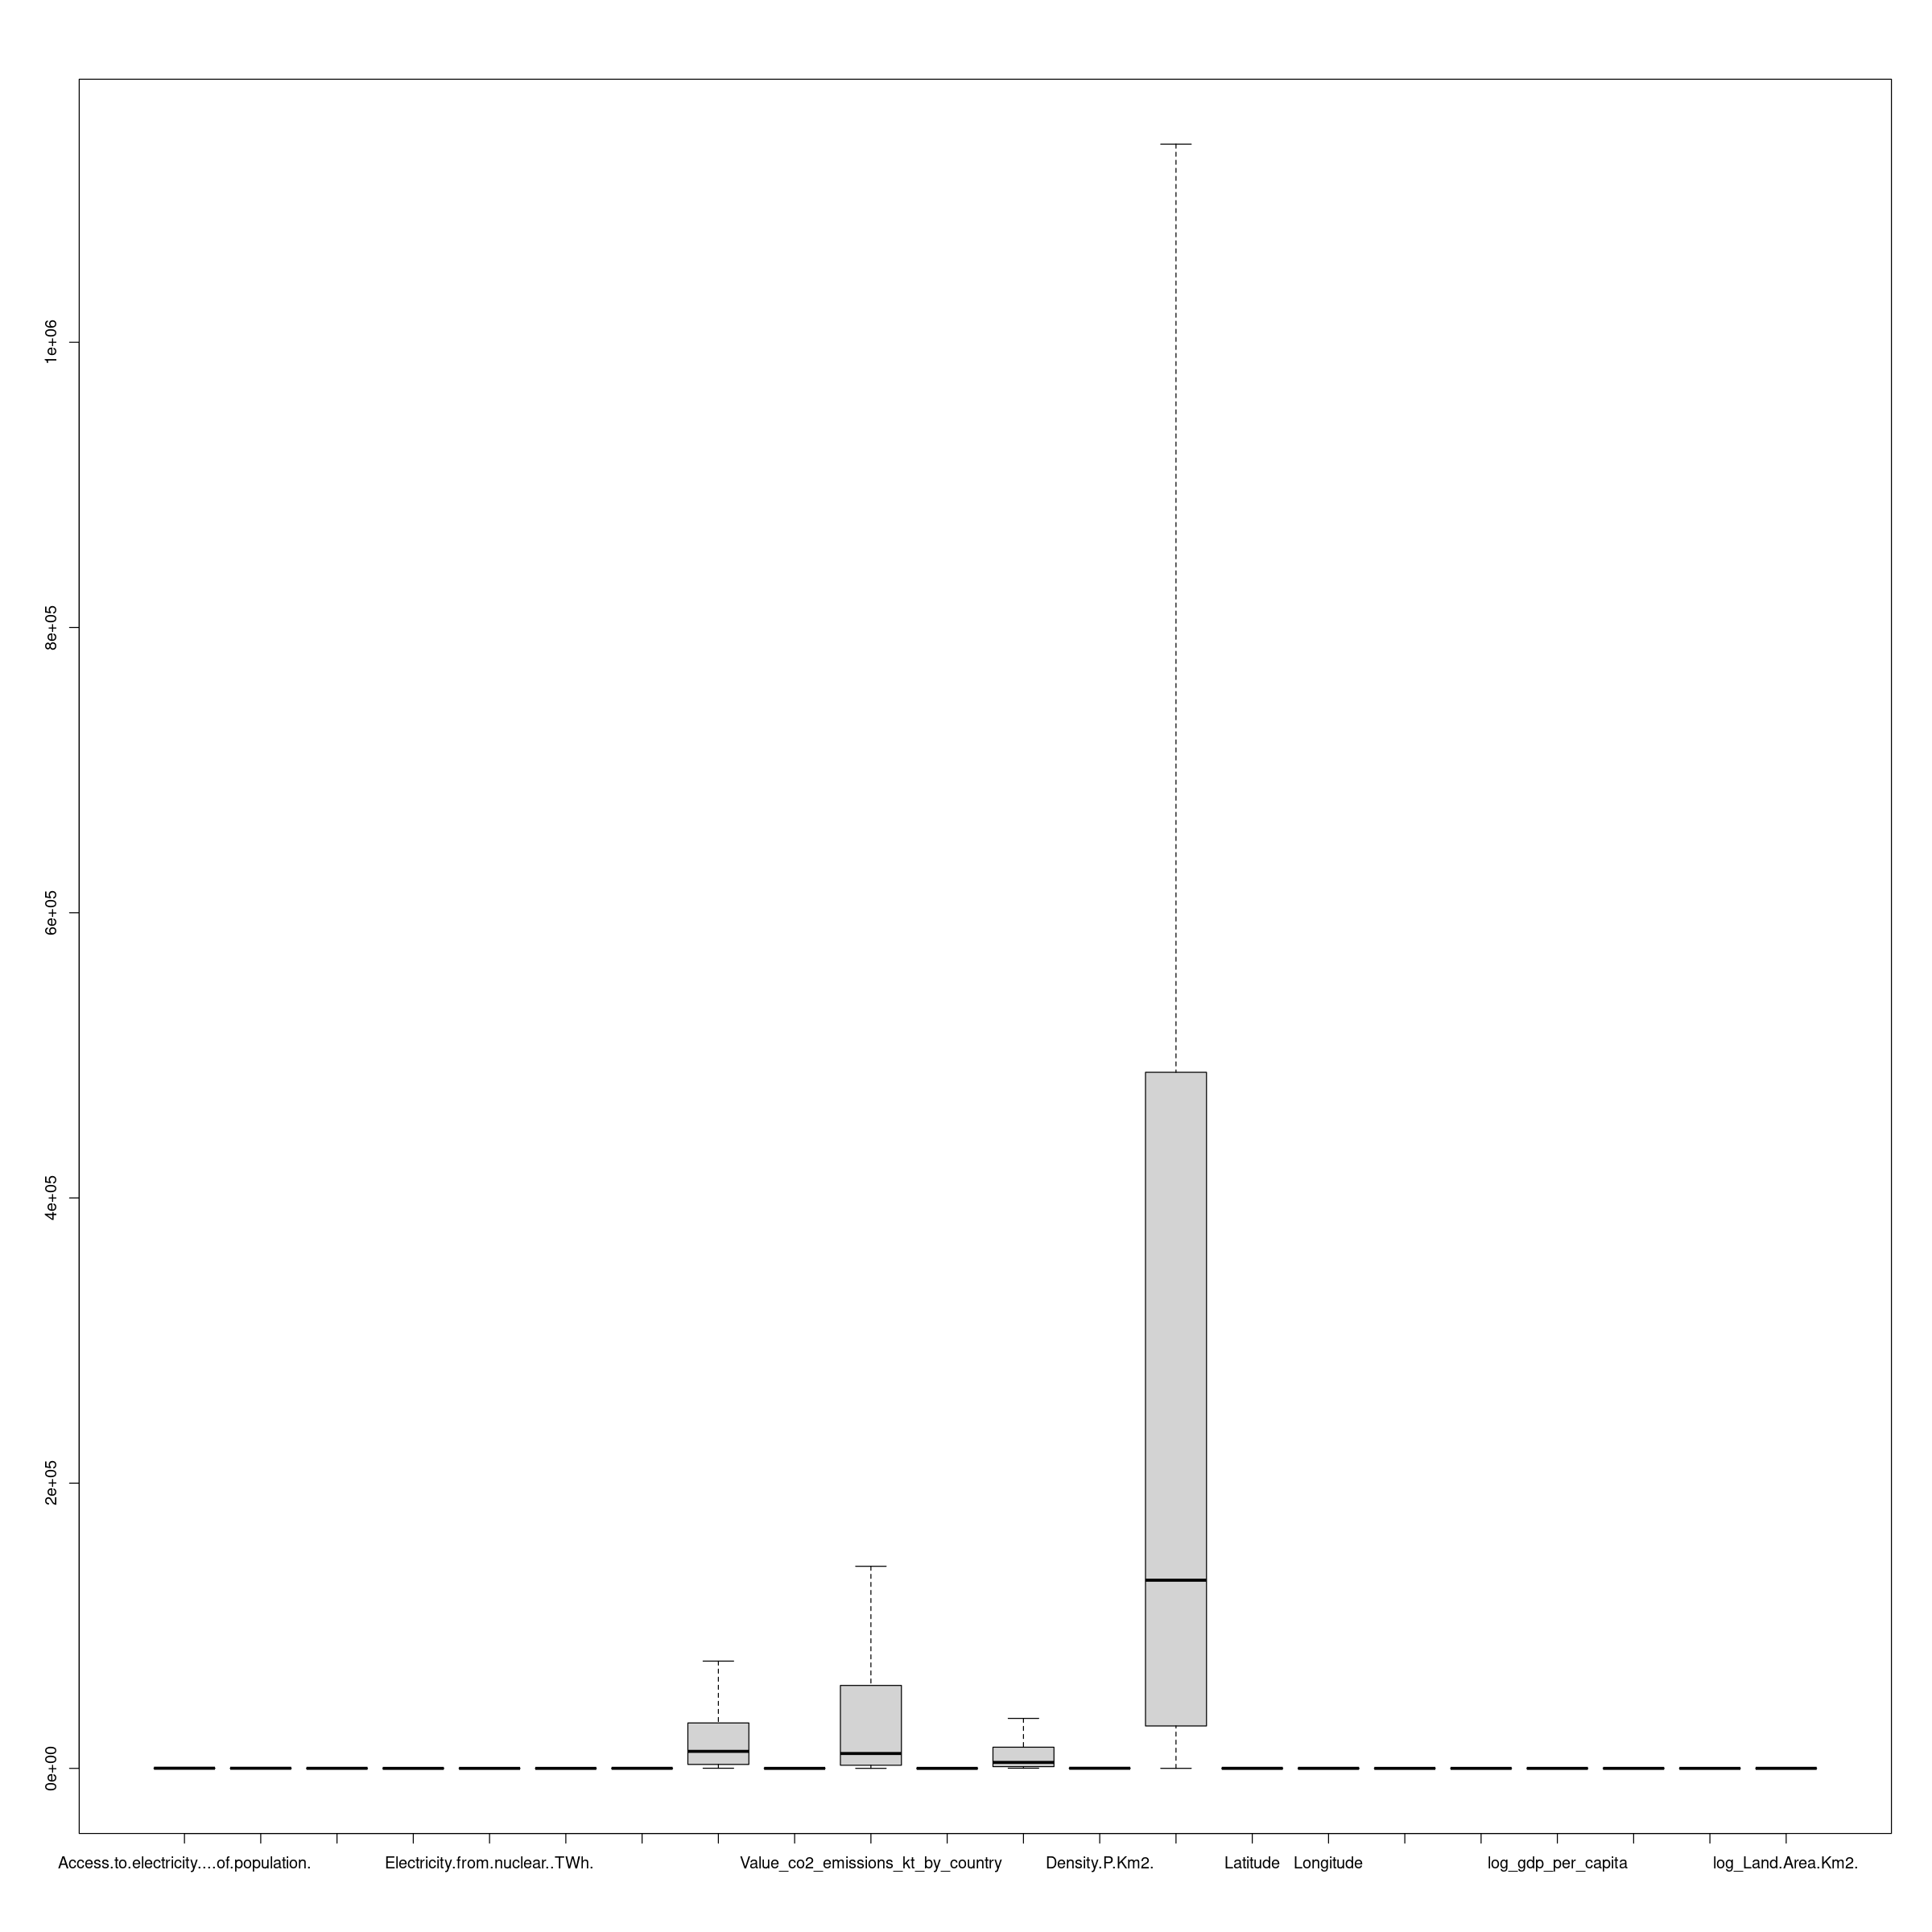

In [17]:
data <- select(df, -c(1,2))
options(repr.plot.width=20, repr.plot.height=20)
boxplot(data, outline=FALSE)

On peut voir que les variables n'ont pas des données de même échelle donc il est nécessaire de normaliser les données avant de continuer la suite

In [18]:
df_norm <- data.frame(scale(select(df, -c(Entity, Year)))) #Standardisation des données

Suite à la standardisation des données, on va pouvoir réaliser l'ACP.

In [19]:
library(FactoMineR)

In [20]:
df_pca <- PCA(df_norm)
print(df_pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 2868 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error

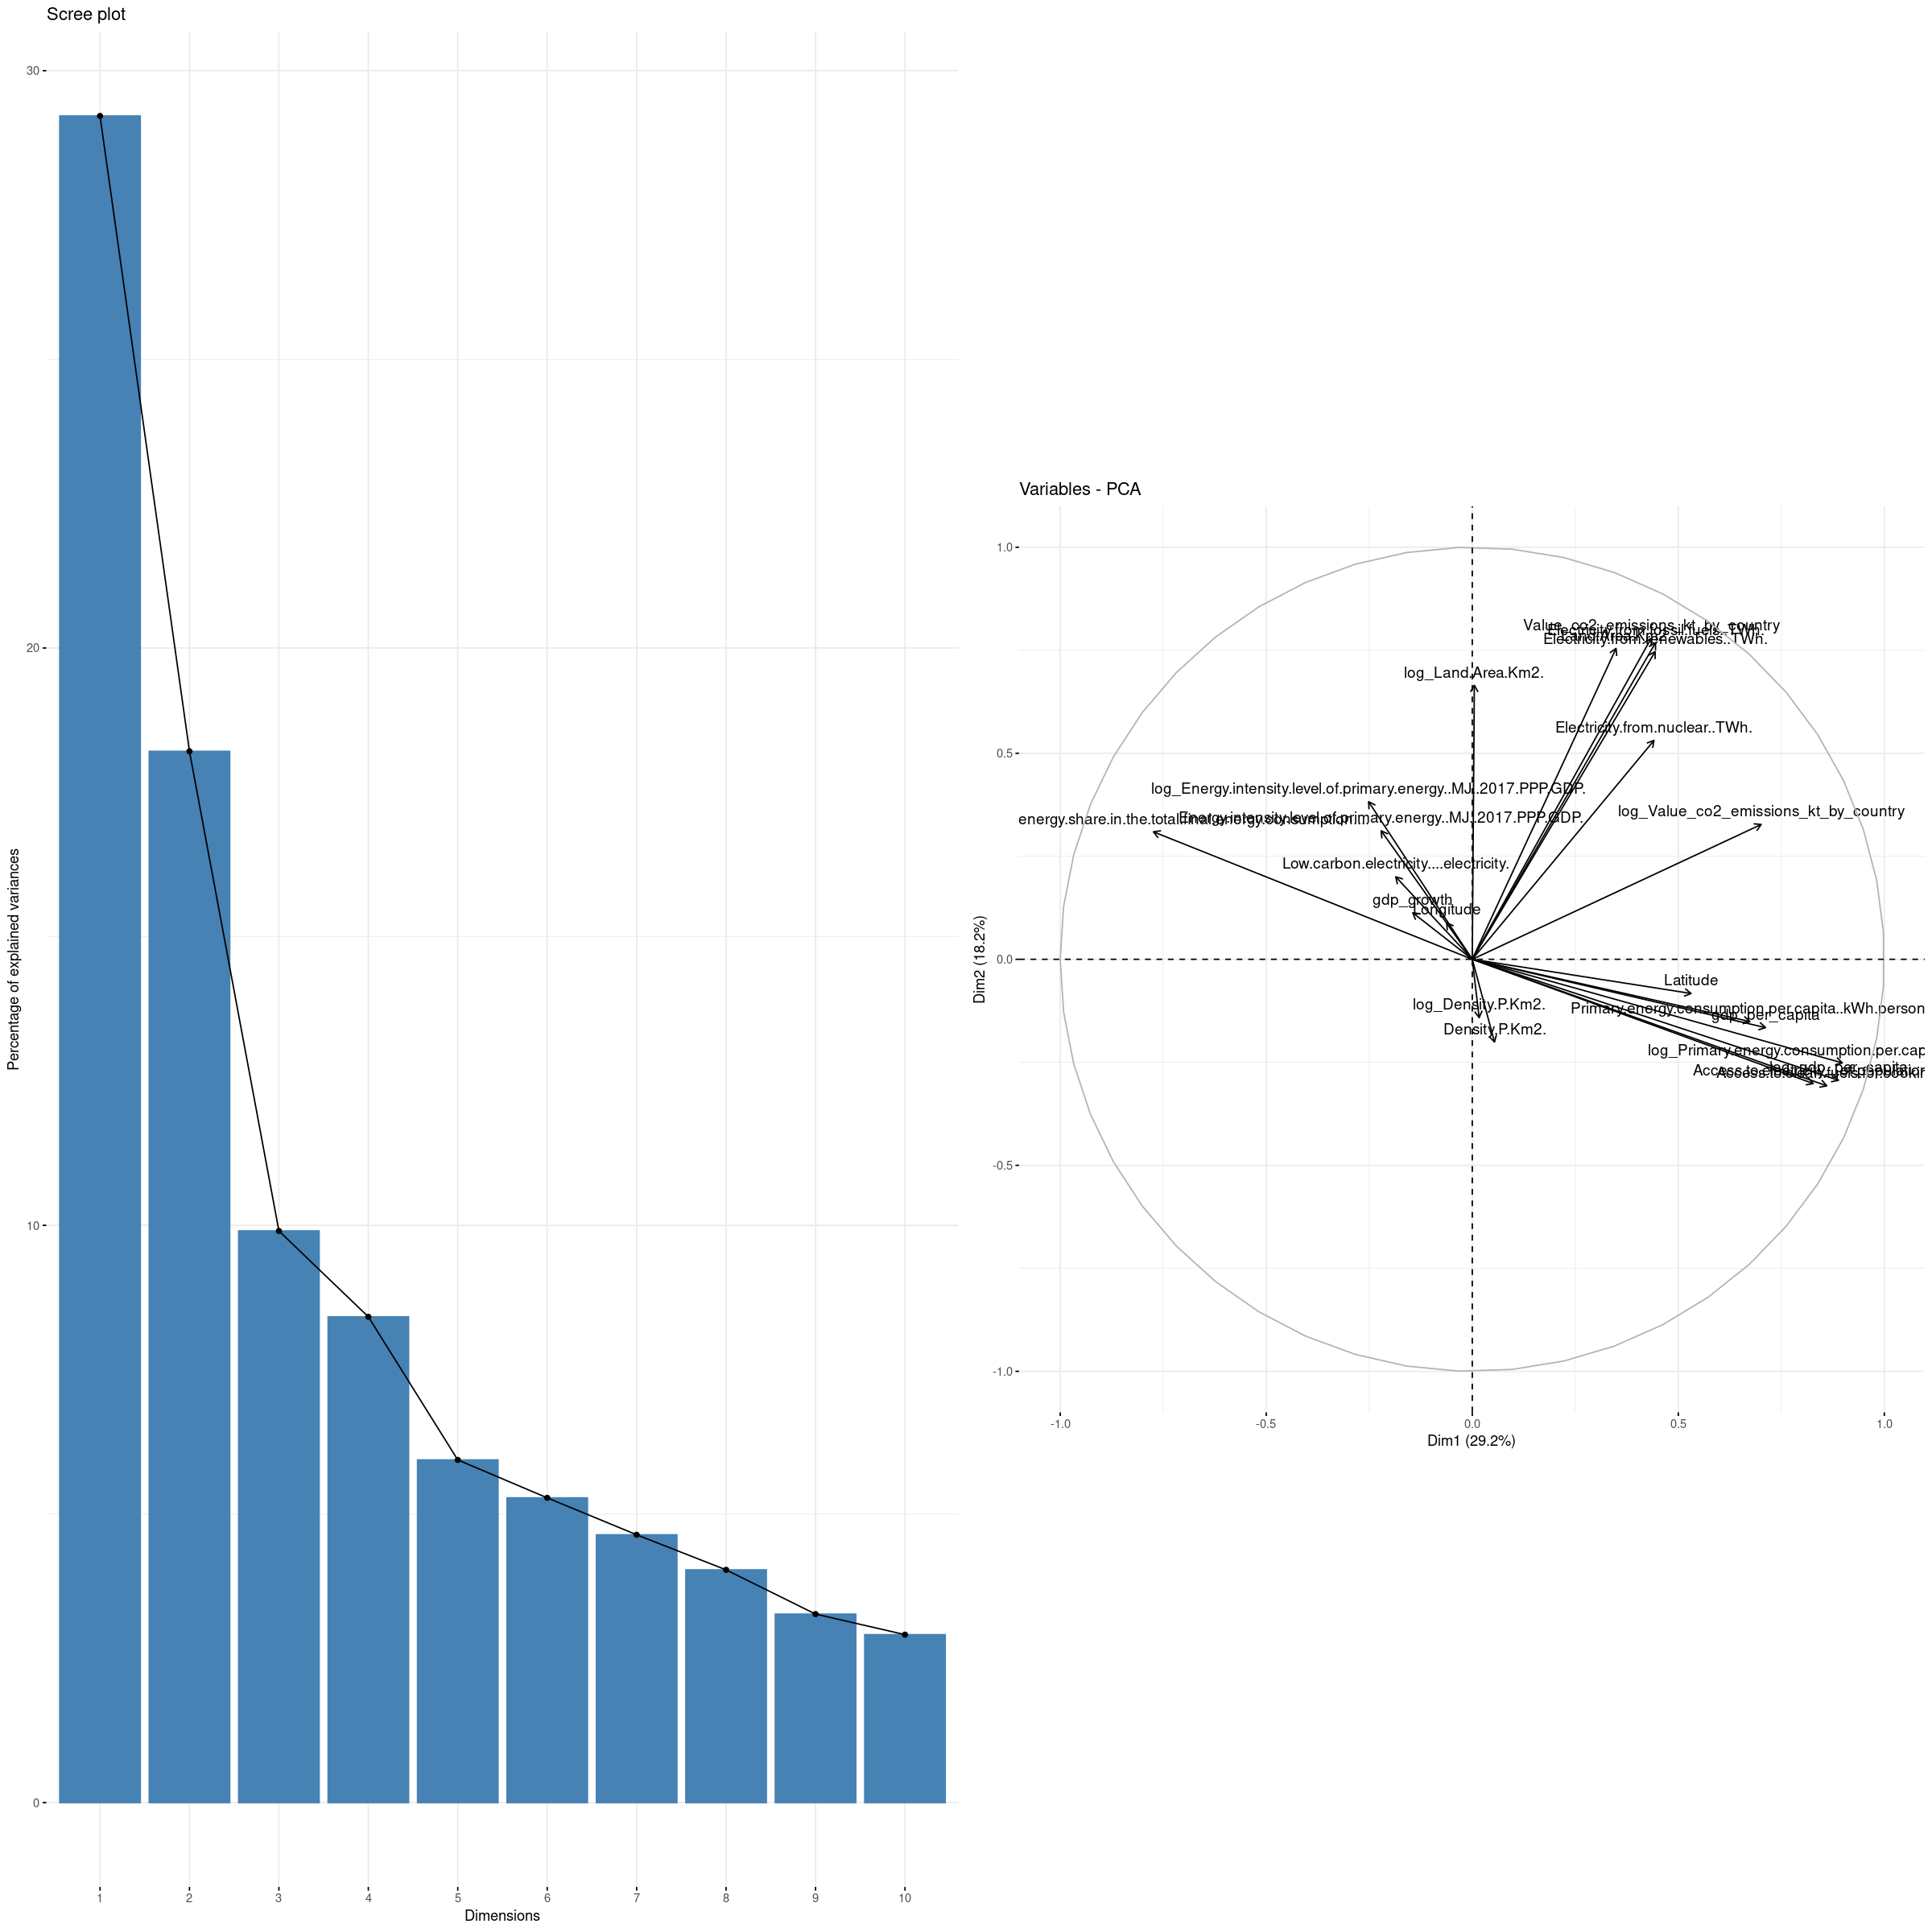

In [21]:
grid.arrange(
    fviz_eig(df_pca), 
    fviz_pca_var(df_pca,axes=c(1,2)),
    ncol=2
)

Comme les noms de variables se superposent, on affiche la matrice des contributions de l'acp, afin de vérifier quelles variables sont corrélées avec la variable à expliquer.

In [22]:
df_pca$var$coord

Dim.1       
Access.to.electricity....of.population.                           0.827489552
Access.to.clean.fuels.for.cooking                                 0.860230106
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.773712223
Electricity.from.fossil.fuels..TWh.                               0.444752087
Electricity.from.nuclear..TWh.                                    0.440922303
Electricity.from.renewables..TWh.                                 0.443886841
Low.carbon.electricity....electricity.                           -0.185756055
Primary.energy.consumption.per.capita..kWh.person.                0.673863196
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      -0.221116315
Value_co2_emissions_kt_by_country                                 0.433877434
gdp_growth                                                       -0.144466197
gdp_per_capita                                                    0.711681322
Density.P.Km2.                                                    0.053963287
Land.Area.Km2.                                                    0.348908997
Latitude                                                          0.530996254
Longitude                                                        -0.062221482
log_Primary.energy.consumption.per.capita..kWh.person.            0.897987011
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.  -0.251637519
log_gdp_per_capita                                                0.888639544
log_Value_co2_emissions_kt_by_country                             0.701172830
log_Density.P.Km2.                                                0.016648953
log_Land.Area.Km2.                                                0.005004299
                                                                 Dim.2      
Access.to.electricity....of.population.                          -0.30157785
Access.to.clean.fuels.for.cooking                                -0.30711577
Renewable.energy.share.in.the.total.final.energy.consumption....  0.30933180
Electricity.from.fossil.fuels..TWh.                               0.76820507
Electricity.from.nuclear..TWh.                                    0.53110426
Electricity.from.renewables..TWh.                                 0.74673750
Low.carbon.electricity....electricity.                            0.20025120
Primary.energy.consumption.per.capita..kWh.person.               -0.15109034
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.31181354
Value_co2_emissions_kt_by_country                                 0.77851042
gdp_growth                                                        0.11295257
gdp_per_capita                                                   -0.16584338
Density.P.Km2.                                                   -0.20066677
Land.Area.Km2.                                                    0.75438891
Latitude                                                         -0.08295605
Longitude                                                         0.08883413
log_Primary.energy.consumption.per.capita..kWh.person.           -0.25144619
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.   0.38240024
log_gdp_per_capita                                               -0.29360798
log_Value_co2_emissions_kt_by_country                             0.32724560
log_Density.P.Km2.                                               -0.14162380
log_Land.Area.Km2.                                                0.66490546
                                                                 Dim.3      
Access.to.electricity....of.population.                          -0.01004539
Access.to.clean.fuels.for.cooking                                 0.11183116
Renewable.energy.share.in.the.total.final.energy.consumption....  0.07150564
Electricity.from.fossil.fuels..TWh.                              -0.31079281
Electricity.from.nuclear..TWh.                                   -0.16759817
Electricity.from.renewables..TWh.     

On remarque que les variables corrélées avec la variable à expliquer dans les dimensions 1 et 2 sont : 
- Land.Area.Km2., la taille du pays, 
- Electricity.from.fossil.fuels..TWh, la consommation du pays en énergies fossiles, 
- Electricity.from.renewables..TWh. qui représente la consommation en énergies renouvelables.

On remarque cependant que certaines variables sont anticorrélées à la variable à expliquer par rapport à la composante 2 de l'acp. On peut notamment citer : 
- Access.to.electricity....of.population. 
- Access.to.clean.fuels.for.cooking
- log_Primary.energy.consumption.per.capita..kWh.person.
- log_gdp_per_capita

In [23]:
df_pca$eig

eigenvalue  percentage of variance cumulative percentage of variance
comp 1  6.427523561 29.21601619             29.21602                        
comp 2  4.006330433 18.21059288             47.42661                        
comp 3  2.178687982  9.90312719             57.32974                        
comp 4  1.851391477  8.41541581             65.74515                        
comp 5  1.306048637  5.93658471             71.68174                        
comp 6  1.161474033  5.27942742             76.96116                        
comp 7  1.020712864  4.63960393             81.60077                        
comp 8  0.887112900  4.03233136             85.63310                        
comp 9  0.718527119  3.26603236             88.89913                        
comp 10 0.640208365  2.91003802             91.80917                        
comp 11 0.534101212  2.42773278             94.23690                        
comp 12 0.303601671  1.38000759             95.61691                        
comp 13 0.201227419  0.91467009             96.53158                        
comp 14 0.160423426  0.72919739             97.26078                        
comp 15 0.144405995  0.65639089             97.91717                        
comp 16 0.119845328  0.54475149             98.46192                        
comp 17 0.101236093  0.46016406             98.92208                        
comp 18 0.078233020  0.35560463             99.27769                        
comp 19 0.063653055  0.28933207             99.56702                        
comp 20 0.055484582  0.25220265             99.81922                        
comp 21 0.032900723  0.14954874             99.96877                        
comp 22 0.006870105  0.03122775            100.00000

On sélectionne 9 composantes, afin d'expliquer 85% de la variance

In [24]:
nb_components = 9
df_pca <- PCA(df_norm, ncp = nb_components)

In [25]:
library(factoextra)

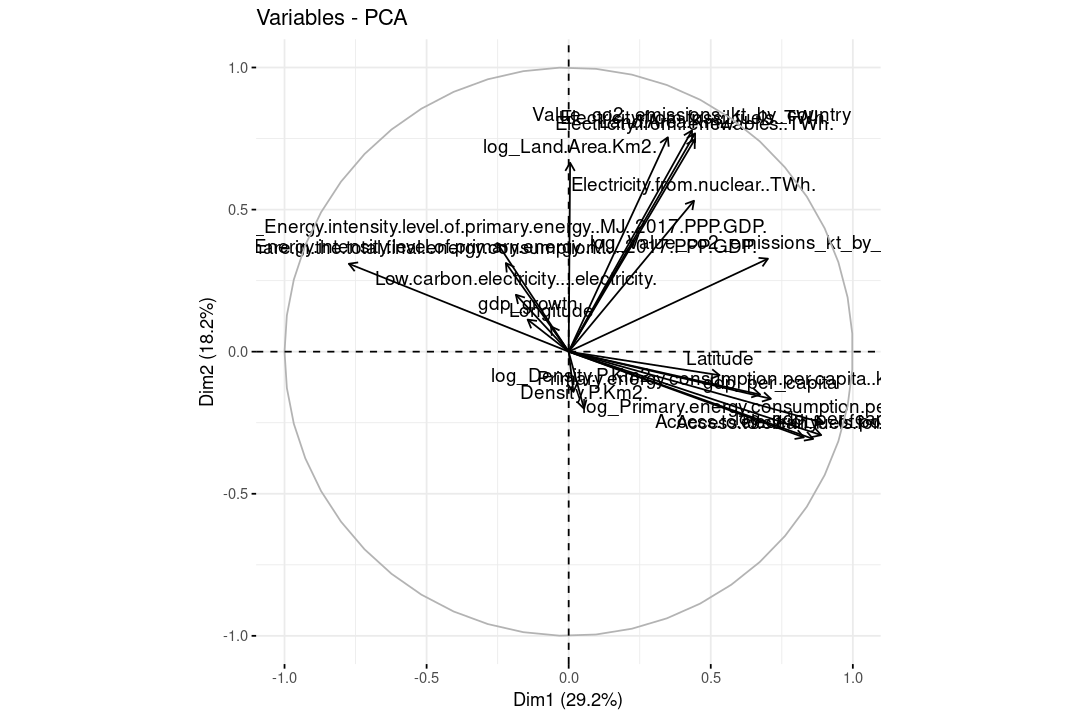

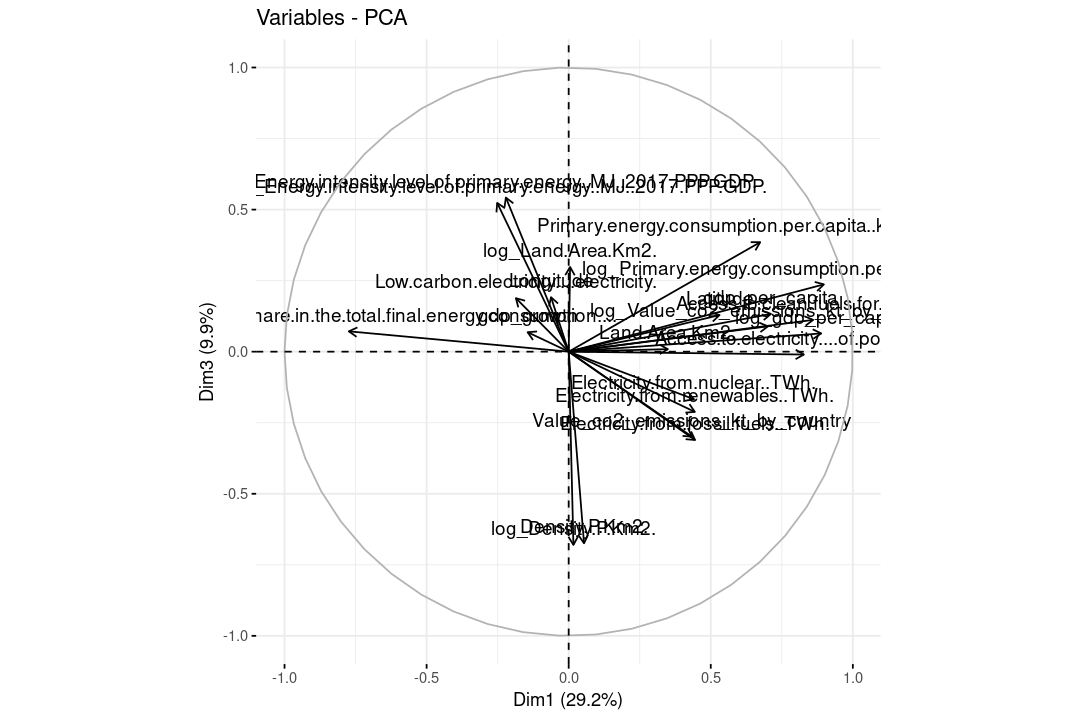

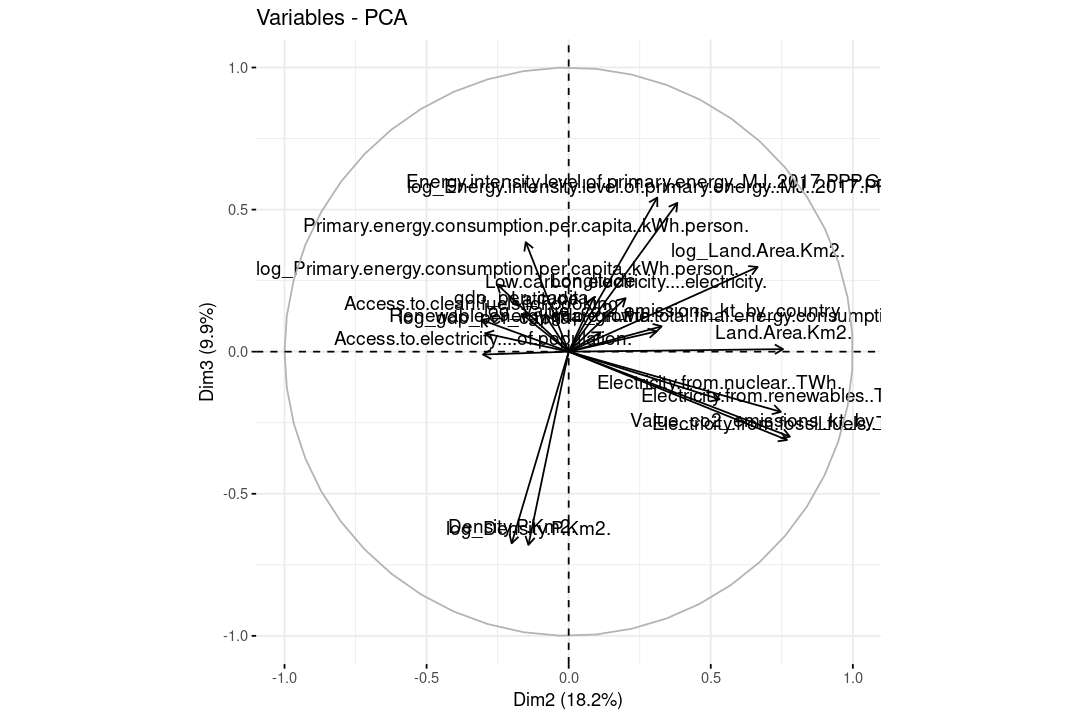

In [26]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_pca_var(df_pca)
fviz_pca_var(df_pca, axes=c(1,3))
fviz_pca_var(df_pca, axes=c(2,3))
# à voir

#fviz_pca(df_PCA, axes=c(1,2), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(1,3), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(2,3), geom = c("point"), col.ind="grey")

In [27]:
library(viridis)

Le chargement a nécessité le package : viridisLite



8. Montrer la corrélation entre la variable 'Year' et la variable à prédire

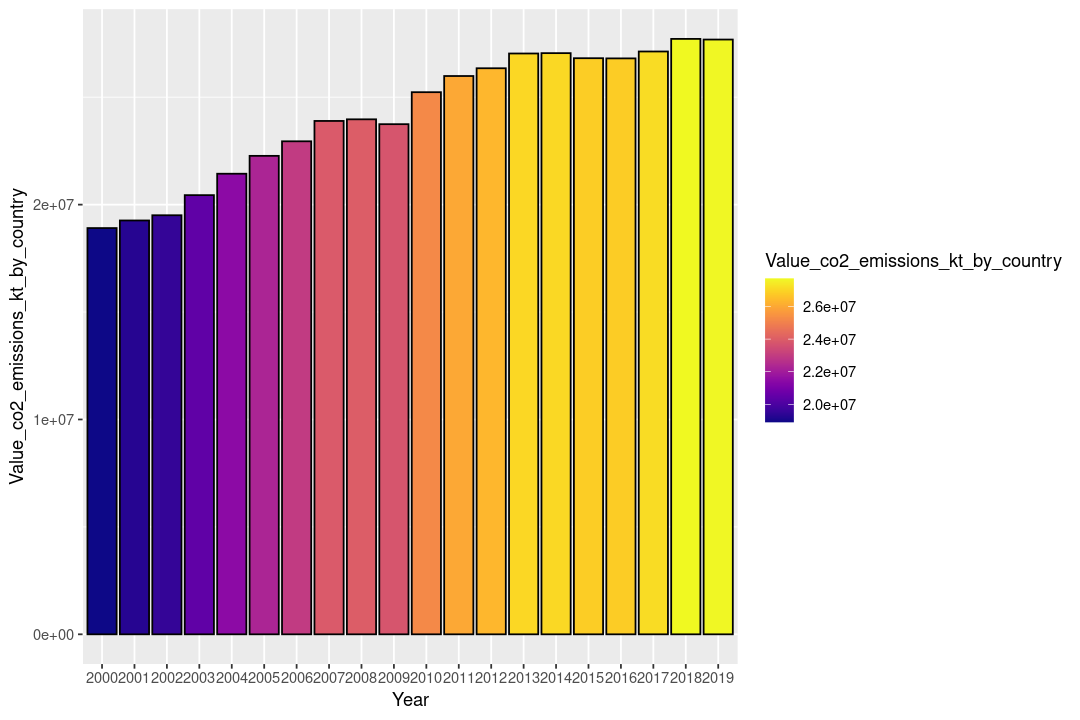

In [28]:
df_somme_annee <- select(df, c(Year, Value_co2_emissions_kt_by_country))
df_somme_annee <- df_somme_annee %>%
    group_by(Year) %>% 
    summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

ggplot(df_somme_annee, aes(x = Year, y = Value_co2_emissions_kt_by_country, fill = Value_co2_emissions_kt_by_country))+
    geom_bar(stat = "identity", color = "black")+
    scale_fill_viridis(option="plasma")

On remarque que les émissions de CO2 sont corrélées avec l'année observée. En effet, ces dernières semblent malheureusement augmenter avec le temps.

# Modélisation

1. Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon
test. Vous prendrez un pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire
lorsque nous nous concentrons sur les performances des algorithmes ?

Cette étape est cruciale pour évaluer les performances des algorithmes car deux jeux de données différents nous permettent d'évaluer différentes erreurs des modèles. Par exemple, le training set, nous servira d'entraînement et permettra d'évaluer l'erreur d'ajustement, tandis que le test set nous permettra de calculer l'erreur de généralisation.

Aussi, nous allons tester nos modèles sur 'Value_co2_emissions_kt_by_country' ainsi que sa transformation logarithmique, ce qui nous demande de créer deux jeux d'échantillons train/test.

In [29]:
#df_norm <- data.frame(df_norm)

set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(df) # nombre de lignes dans les données
nvar <- ncol(df) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

# construction de l'échantillon d'apprentissage
train <- df[appri, -c(1,2,6,22)]
# construction de l'échantillon test
test <- df[testi, -c(1,2,6,22)]

# construction de l'échantillon d'apprentissage avec la variable à expliquer transformée
train_log <- df[appri, -c(1,2,6,12)]
# construction de l'échantillon test
test_log <- df[testi, -c(1,2,6,12)]

# en R, à la différence de python, on ne différencie pas x_train et y_train

# vérification du contenu des échantillons
str(train)
str(test)

'data.frame':	2294 obs. of  20 variables:
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 42.4 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 16.7 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 21.2 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.54 0.78 0.75 0.74 0.89 1 ...
 $ Low.carbon.electricity....electricity.                          : num  67 62.9 63.4 76.2 74 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  230 204 252 304 608 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.4 1.2 1.41 1.5 1.94 2.25 2.46 2.61 2.46 2.25 ...
 $ Value_co2_emissions_kt_by_country                               : num  1220 1030 1550 1760 3560 ...
 $

Conformément à la consigne, nous enlevons la variable Electricity.from.fossil.fuels..TWh., car cette dernière est trop fortement corrélée avec la variable à expliquer (variable 6).

# Entrainement des modèles

2. Comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables, avec/sans pénalisation, d’un SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting, et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVM), et ajustez soigneusement les paramètres (par validation croisée). Interprétez les résultats et quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

## Modèles de régression linéaire 

### Modèle de régression linéaire sans pénalisation

Pour un modèle de régression linéaire, seules les variables quantitatives interviennent. C'est pour cela que nous décidons de retirer les colonnes 'Entity' et 'Year' du jeu de données.

In [30]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

On standardise notre jeu de données pour la suite de nos analyses. En effet, pour certains modèles cette standardisation sera bénéfique, et pour d'autres cela n'aura pas d'impact (ex. arbre). On ne standardise cependant pas la variable à prédire !

In [31]:
CO2_train_log <- train_log$log_Value_co2_emissions_kt_by_country
CO2_test_log <- test_log$log_Value_co2_emissions_kt_by_country
#O2 <- train$Value_co2_emissions_kt_by_country

CO2_train <- train$Value_co2_emissions_kt_by_country
CO2_test <- test$Value_co2_emissions_kt_by_country

scaled_train <- data.frame(scale(train_log))
scaled_test <- data.frame(scale(test_log))

scaled_train$log_Value_co2_emissions_kt_by_country <- CO2_train_log
scaled_test$log_Value_co2_emissions_kt_by_country <- CO2_test_log

scaled_train_nolog <- data.frame(scale(train))
scaled_test_nolog <- data.frame(scale(test))

scaled_train_nolog$Value_co2_emissions_kt_by_country <- CO2_train
scaled_test_nolog$Value_co2_emissions_kt_by_country <- CO2_test

In [32]:
scaled_train_nolog$Value_co2_emissions_kt_by_country[1:10]
scaled_train$log_Value_co2_emissions_kt_by_country[1:10]

[1] 1220 1030 1550 1760 3560 4880 7110 8080 5990 4880

[1] 7.106606 6.937314 7.346010 7.473069 8.177516 8.492901 8.869258 8.997147
 [9] 8.697847 8.492901

On observe ici que nos variables à expliquer ne sont pas standardisées

On créé un modèle de régression linéaire afin de prédire, dans un premier temps, 'Value_co2_emissions_kt_by_country'.

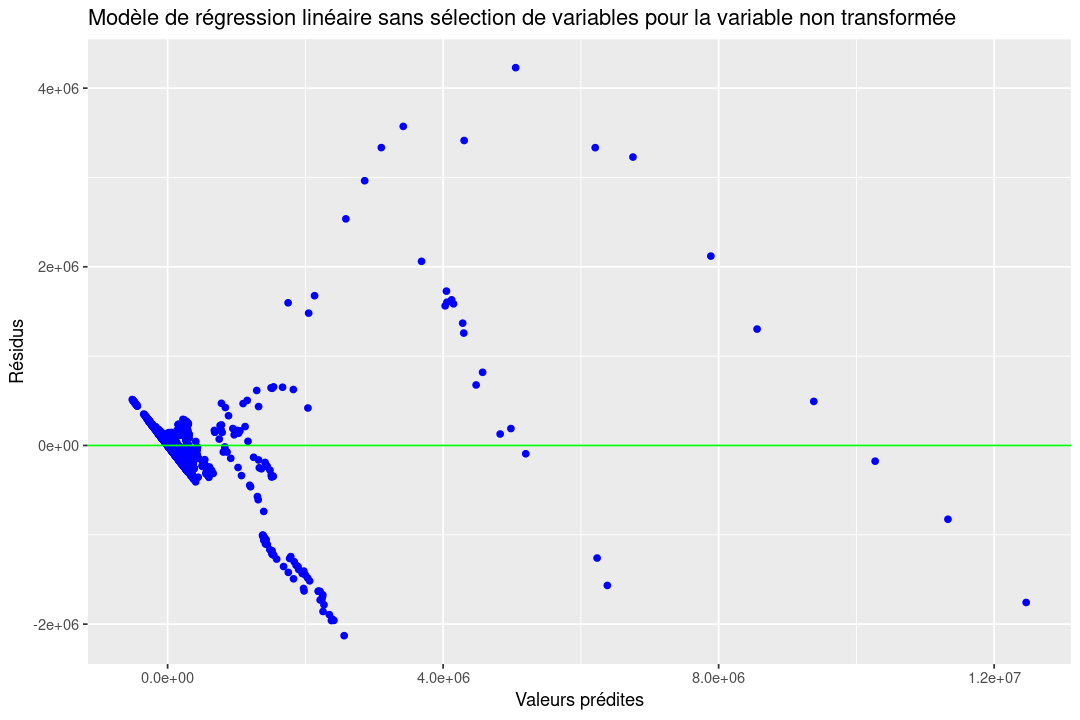

In [33]:
# estimation du modèle sans interaction
reg <- lm(Value_co2_emissions_kt_by_country ~ . , data = scaled_train_nolog)
# Extraction des résidus et des valeurs ajustées de ce modèle
res <- reg$residuals
fit<- reg$fitted.values

#graphe des résidus

gplot.res(fit,res,"Modèle de régression linéaire sans sélection de variables pour la variable non transformée")

Sur ce graphe, on observe que notre modèle corrèle positivement les émissions en co2 des pays avec le leur montant d'électricité venant de sources d'énergies renouvelables, ainsi que de nucléaire.

In [34]:
ss_total <- sum((scaled_train_nolog$Value_co2_emissions_kt_by_country - mean(scaled_train_nolog$Value_co2_emissions_kt_by_country ))^2)
ss_residual <- sum(residuals(reg)^2)
ss_regression <- ss_total - ss_residual
r_squared <- ss_regression / ss_total
paste ("Score ajustement modèle simple: " , r_squared)

[1] "Score ajustement modèle simple:  0.826898015815229"

De la même manière, on créé un modèle pour prédire la transformée logarithmique de 'Value_co2_emissions_kt_by_country'.

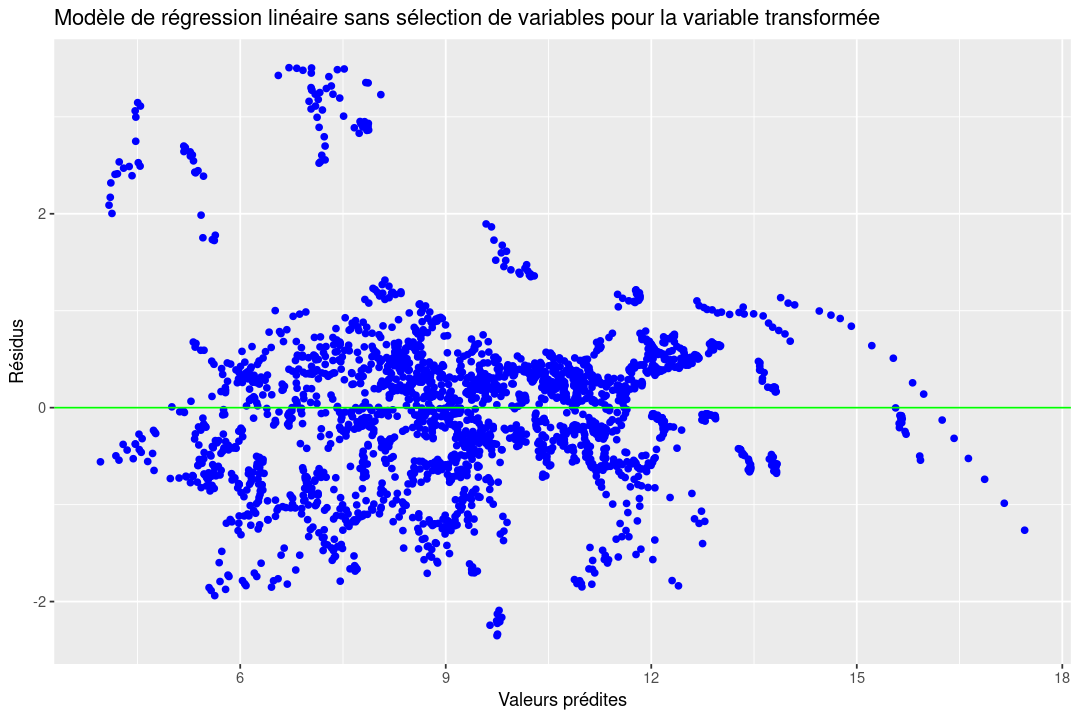

In [35]:
# estimation du modèle sans interaction
reg.log <- lm(log_Value_co2_emissions_kt_by_country ~ . , data = scaled_train)

# Extraction des résidus et des valeurs ajustées de ce modèle
res2 <- reg.log$residuals
fit2 <- reg.log$fitted.values

# Graphe des résidus. 
gplot.res(fit2,res2,"Modèle de régression linéaire sans sélection de variables pour la variable transformée")


In [36]:
ss_total <- sum((scaled_train$log_Value_co2_emissions_kt_by_country - mean(scaled_train$log_Value_co2_emissions_kt_by_country ))^2)
ss_residual <- sum(residuals(reg.log)^2)
ss_regression <- ss_total - ss_residual
r_squared <- ss_regression / ss_total
paste ("Score ajustement modèle simple: " , r_squared)

[1] "Score ajustement modèle simple:  0.875772154565032"

On peut voir que le graphe des résidus est plus interprétable en utilisant la variable à prédire transformée, et de plus pour ce modèle le score d'ajustement est meilleur. Ainsi, pour la suite on utilisera toujours cette même variable transformée.

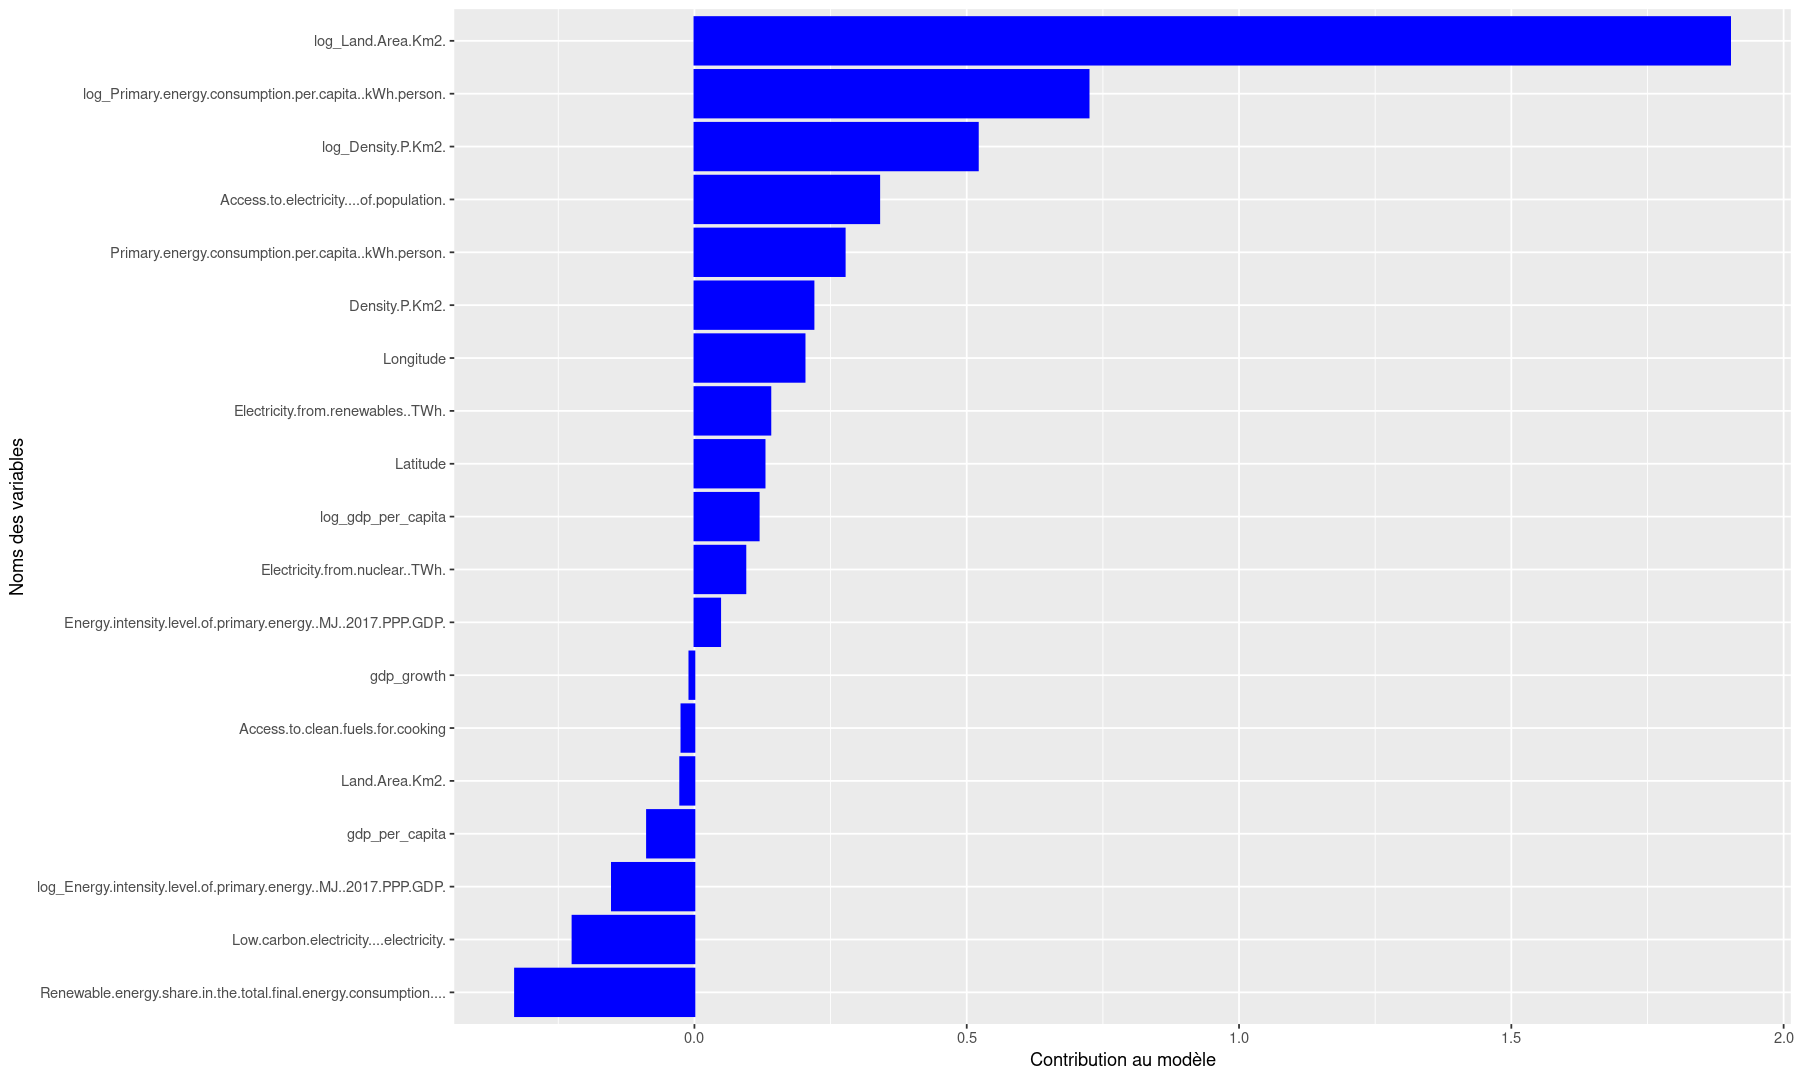

In [37]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.res = 100)
coefs <- data.frame(sort(coef(reg.log)[2:20]))
coefs$name <- row.names(coefs)
ggplot(coefs, aes(x=reorder(name, sort.coef.reg.log..2.20..), y=sort.coef.reg.log..2.20..)) + 
    geom_bar(stat = "identity", width = .9, color = "blue", fill = "blue") +
    xlab("Noms des variables") +
    ylab("Contribution au modèle") +
    coord_flip()

#barplot(sort(coef(reg.log)[2:20]), horiz=T, col="blue", las = 1)

On remarque ensuite que les variables ayant le plus d'importance sont : 
- log_Land_Area.Km2,
- log_Primary.energy.consumption.per.capita, 
- log_density.Km2. 

Les varaibles qui semblent corrélées avec des valeurs plus faibles d'émissions sont : 
- "Renewable_energy_share_in_the_total_final_energy_consumption" 
- "Low_carbon_electricity".

### Modèle linaire avec pénalisation LASSO 

In [38]:
library(glmnet)

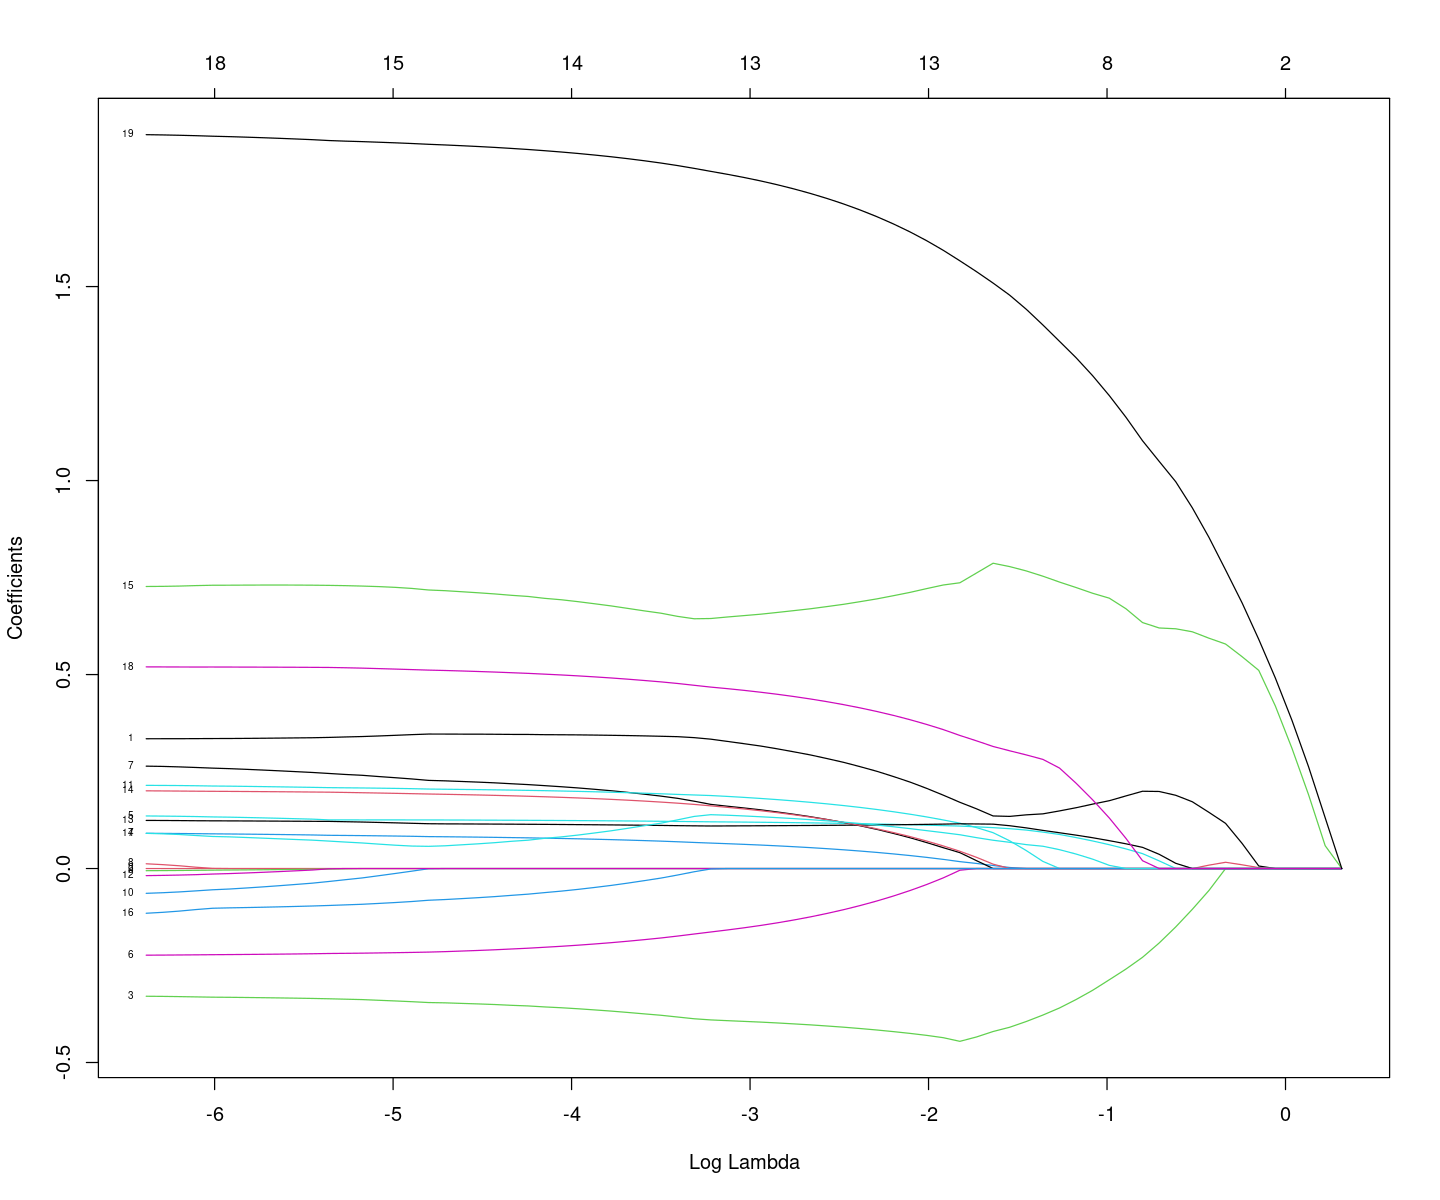

In [39]:
train_log.mat <- model.matrix(log_Value_co2_emissions_kt_by_country ~ . - 1, data = scaled_train) #on retire l'intercept du modèle 
test_log.mat <- model.matrix(log_Value_co2_emissions_kt_by_country ~ . - 1, data = scaled_test) #on retire l'intercept du modèle 
# avec des variables quantitatives seulement
regLasso <- glmnet(y = scaled_train$log_Value_co2_emissions_kt_by_country ,
                           x = train_log.mat )

options(repr.plot.width = 12, repr.plot.height = 10)
plot(regLasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(df.mat), " - ", colnames(df.mat)))


Les chemins de régularisation permettent de comprendre comment les coefficients évoluent en fonction du paramètre de régularisation (lambda). Si les coefficients sont gardés non nul pour une valeur de lambda élévée alors c'est qu'ils sont importants. Ici 3 coefficients semblent sortir du lot : les 15e, 18e et 19e variables. A l'inverse, la variable n°16 est amenée à 0 assez rapidement.

Nous allons choisir le lambda optimal par validation croisée

[1] 0.7330968 0.7747769

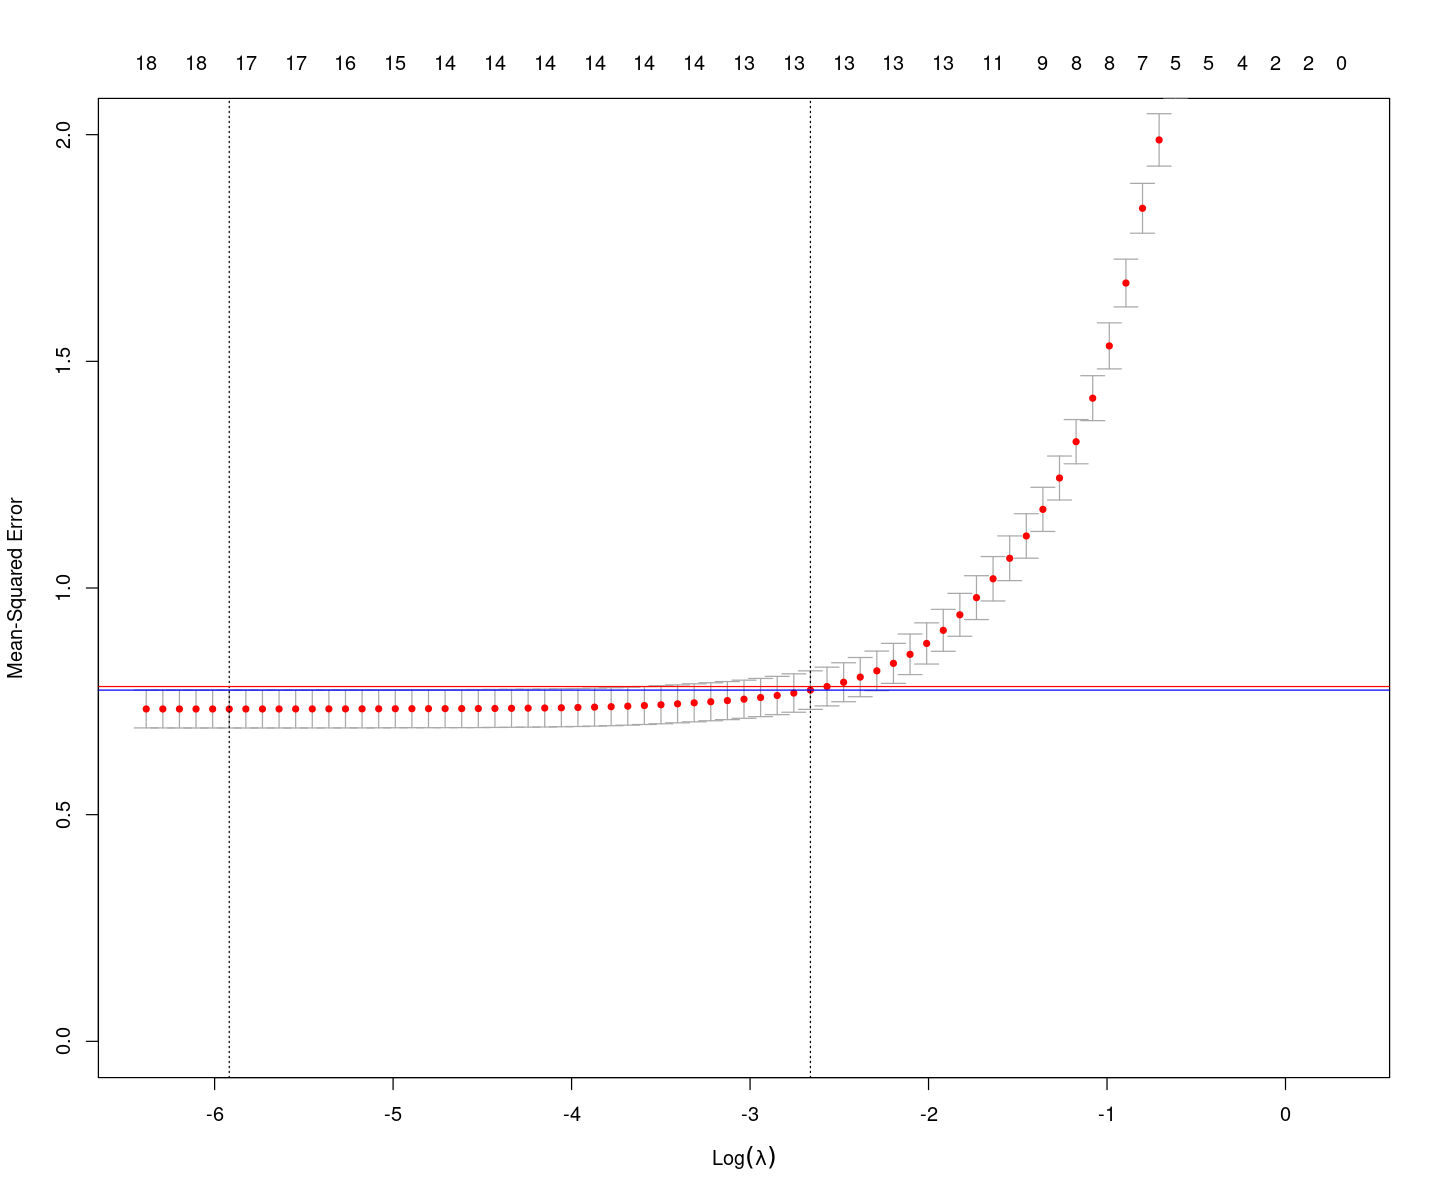

In [40]:
regLassOpt <- cv.glmnet(y = scaled_train$log_Value_co2_emissions_kt_by_country , x = train_log.mat)
regLassOpt$cvm[c(regLassOpt$index)]

plot(regLassOpt, ylim=c(0,2))
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]-1], col='red');
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]], col='blue');


In [41]:
# valeur estimée
paste("1er lambda sélectionné pour modèle optimal:", round(regLassOpt$lambda.1se, 5))
# modèle correspondant
coef(regLassOpt, s = "lambda.1se")

[1] "1er lambda sélectionné pour modèle optimal: 0.06982"

20 x 1 sparse Matrix of class "dgCMatrix"
                                                                          s1
(Intercept)                                                       9.30584088
Access.to.electricity....of.population.                           0.29278688
Access.to.clean.fuels.for.cooking                                 .         
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.40294558
Electricity.from.nuclear..TWh.                                    0.05386708
Electricity.from.renewables..TWh.                                 0.11769195
Low.carbon.electricity....electricity.                           -0.12459702
Primary.energy.consumption.per.capita..kWh.person.                0.13356628
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       .         
gdp_growth                                                        .         
gdp_per_capita                                                    .         
Density.P.Km2.                    

Pour le modèle optimal, le critère Lasso annule certaines variables : gdp_growth, gdp_per_capita, Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP., Access.to.clean.fuels.for.cooking, et Land.Area.Km2.

On récupère les résidus et les valeurs ajustées pour pouvoir afficher par la suite le graphe des résidus

In [42]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(regLassOpt, s = "lambda.min", newx = train_log.mat)
res.lasso <- scaled_train$log_Value_co2_emissions_kt_by_country - fit.lasso

fit.lasso.1se <- predict(regLassOpt, s = "lambda.1se", newx = train_log.mat)
res.lasso.1se <- scaled_train$log_Value_co2_emissions_kt_by_country - fit.lasso.1se 

### Sélection de variables par critère AIC

Arbitrairement la fonction step calcule le critère AIC du modèle linéaire 'reg' et met par défaut le facteur de pénalité égal à 2.

De plus, le paramètre 'trace=0' contrôle le niveau de détail des informations de sortie

On va tenter d'optimiser le modèle de regression linéaire précédent grâce à la fonction 'stepAIC'. Cette fonction retourne le modèle qui minimise l'AIC parmi tous les modèles candidats évalués.

In [43]:
reg.AIC <- step(reg.log, direction = "backward", trace=1)

Start:  AIC=-727.9
log_Value_co2_emissions_kt_by_country ~ Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude + log_Primary.energy.consumption.per.capita..kWh.person. + 
    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    log_gdp_per_capita + log_Density.P.Km2. + log_Land.Area.Km2.

                                                                   Df Sum of Sq
- Access.to.clean.fuels.for.cooking                                 1       0.2
- gdp_growth                                                        1       0.2
- Land.Area.Km2.   

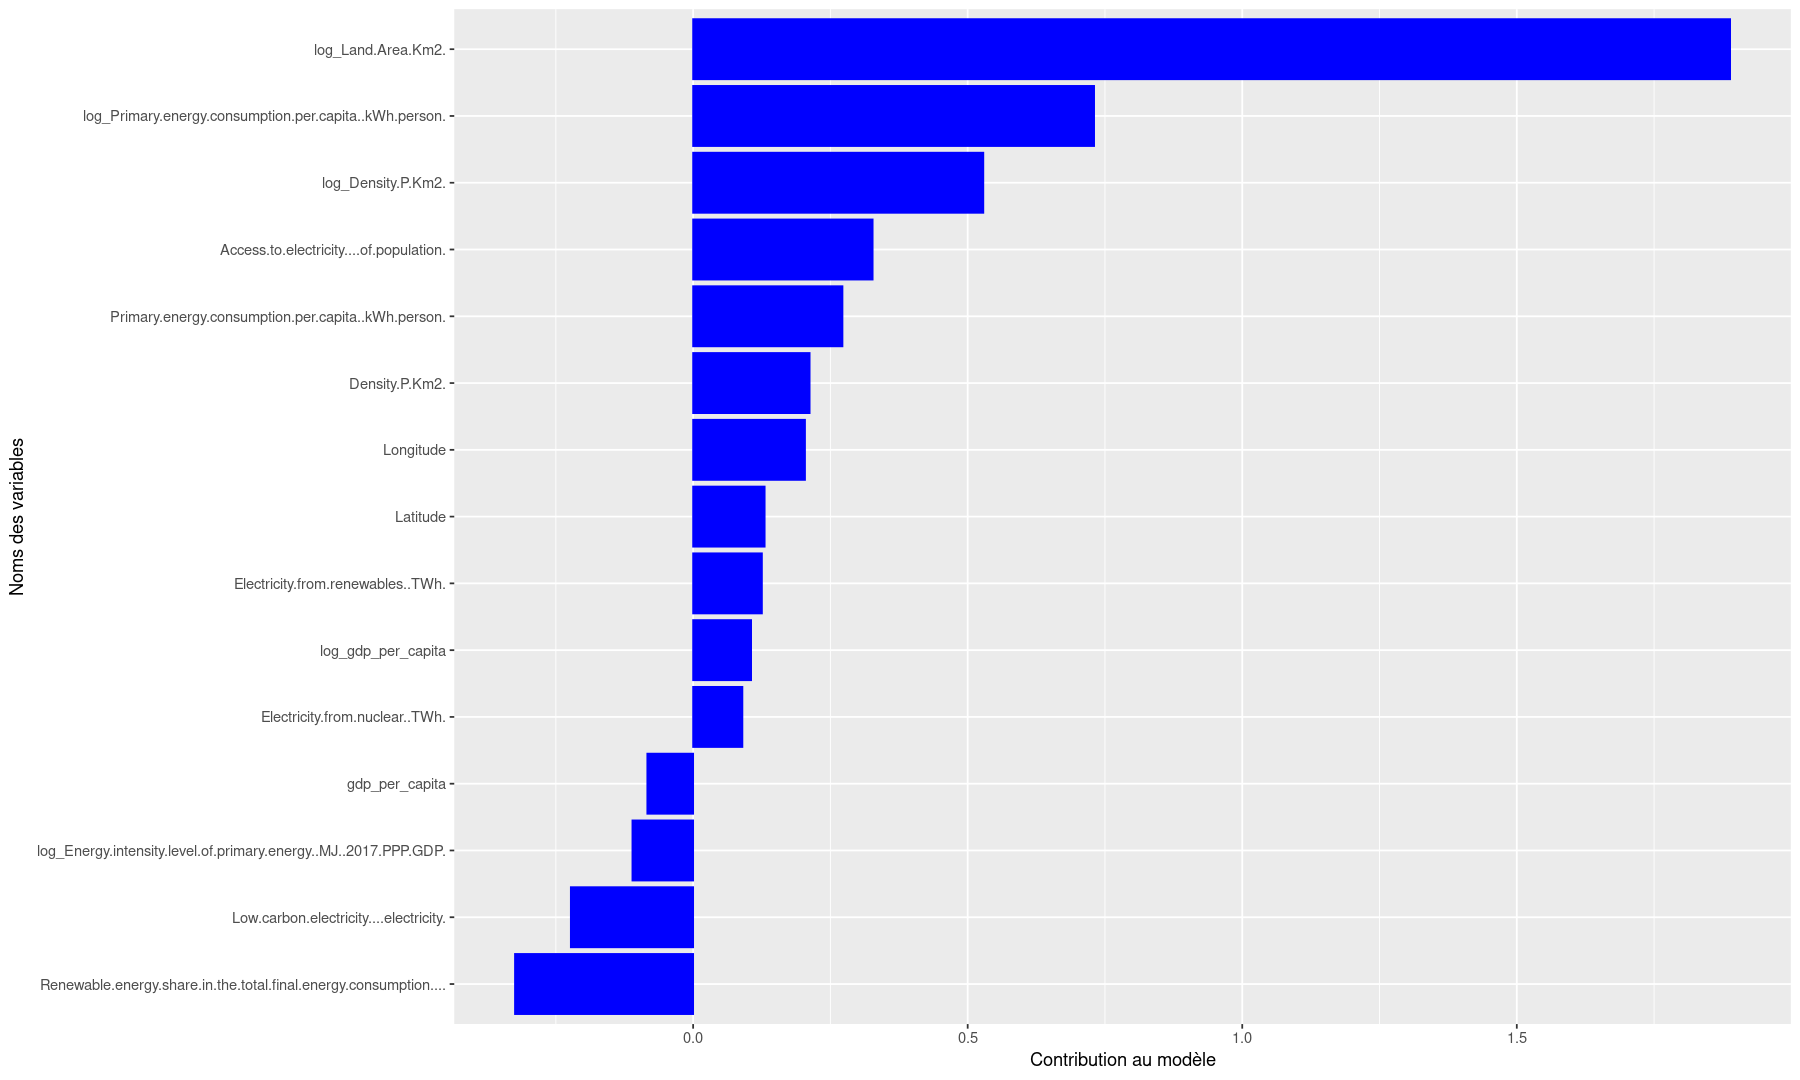

In [44]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.res = 100)
coefs <- data.frame(sort(coef(reg.AIC)[2:20]))
coefs$name <- row.names(coefs)
ggplot(coefs, aes(x=reorder(name, sort.coef.reg.AIC..2.20..), y=sort.coef.reg.AIC..2.20..)) + 
    geom_bar(stat = "identity", width = .9, color = "blue", fill = "blue") +
    xlab("Noms des variables") +
    ylab("Contribution au modèle") +
    coord_flip()

#barplot(sort(coef(reg)[2:20]), horiz=T, col="blue", las = 1)

On retrouve quasiment les mêmes contribution des variables que dans le cas du modèle linéaire sans sélection de variables, ce qui est logique, car il s'agit simplement d'un modèle linéaire avec moins de variables.

In [45]:
summary(reg.AIC)


Call:
lm(formula = log_Value_co2_emissions_kt_by_country ~ Access.to.electricity....of.population. + 
    Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    gdp_per_capita + Density.P.Km2. + Latitude + Longitude + 
    log_Primary.energy.consumption.per.capita..kWh.person. + 
    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    log_gdp_per_capita + log_Density.P.Km2. + log_Land.Area.Km2., 
    data = scaled_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3352 -0.5220  0.0309  0.4059  3.5346 

Coefficients:
                                                                 Estimate
(Intercept)                                                       9.30584
Access.to.electricity....of.population.                           0.32690
Renewable.energy.share.in.the.tota

In [46]:
# Extraction des résidus et des valeurs ajustées de ce modèle
res.AIC <- reg.AIC$residuals
fit.AIC<- reg.AIC$fitted.values

## Support Vector Machine (SVM)

Nous souhaitons étudier la méthode de la SVM sur nos données. Il faut être attentif ici au fait que la méthode SVM s'applique sur des données standardisées, car elle met en jeu des notions de distances entre les points, qui peuvent être faussées par les diverses unités de nos variables.

L'optimisation des paramètres étant extrêmement longue, on a réalisé cette dernière une fois, puis gardé la sortie obtenue, en fonction des codes lancés.


Dans cette partie, on va réaliser trois modèles SVM différents, pour chaque noyau testé : Linéaire, Radial (Gaussien), et Polynomial.

In [47]:
library(e1071)

In [170]:
#svm.reg.tune_lin <- tune.svm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train,  
#                             cost = c(0.1, 1, 10), eps=seq(0.05, 0.2, by = 0.05), kernel = "linear")

#summary(svm.reg.tune_lin$best.model)
#svm_lin = svm.reg.tune_lin$best.model

svm_lin = svm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, cost = 1, epsilon = 0.1, kernel = "linear")

Call:
best.svm(x = log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, 
    cost = c(0.1, 1, 10), eps=seq(0.05, 0.2, by = 0.05), 
    kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.005 
    epsilon:  0.1 


Number of Support Vectors:  341

In [49]:
#svm.reg.tune_rad <- tune.svm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train,  
                             #cost = c(100, 500,1000), gamma = seq(0.005, 0.035, by = 0.01),
                             #kernel = "radial")

#summary(svm.reg.tune_rad$best.model)
#svm_rad = svm.reg.tune_rad$best.model

svm_rad = svm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, cost = 500, gamma = 0.005, epsilon = 0.1, kernel = "radial")

Call:
best.svm(x = log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, 
    gamma = seq(0.005, 0.035, by = 0.01), cost = c(10, 100, 500), 
    kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  500 
      gamma:  0.005 
    epsilon:  0.1 


Number of Support Vectors:  367

In [50]:
#svm.reg.tune_poly <- tune.svm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train,  
                             #cost = c(1, 10, 100), gamma = seq(0.015, 0.035, by = 0.01), coef0 = c(1, 2, 3),
                             #degree = c(2, 3, 4), kernel = "polynomial")

#summary(svm.reg.tune_poly$best.model)
#svm_poly = svm.reg.tune_poly$best.model

svm_poly = svm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train,  cost = 10, gamma = 0.025, coef0 = 2, degree = 3, kernel = "polynomial")

Call:
best.svm(x = log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, 
    degree = c(2, 3, 4), gamma = seq(0.005, 0.025, by = 0.01), coef0 = c(0, 
        1, 2), cost = c(10, 100, 1000), kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
      gamma:  0.025 
     coef.0:  2 
    epsilon:  0.1 


Number of Support Vectors:  343


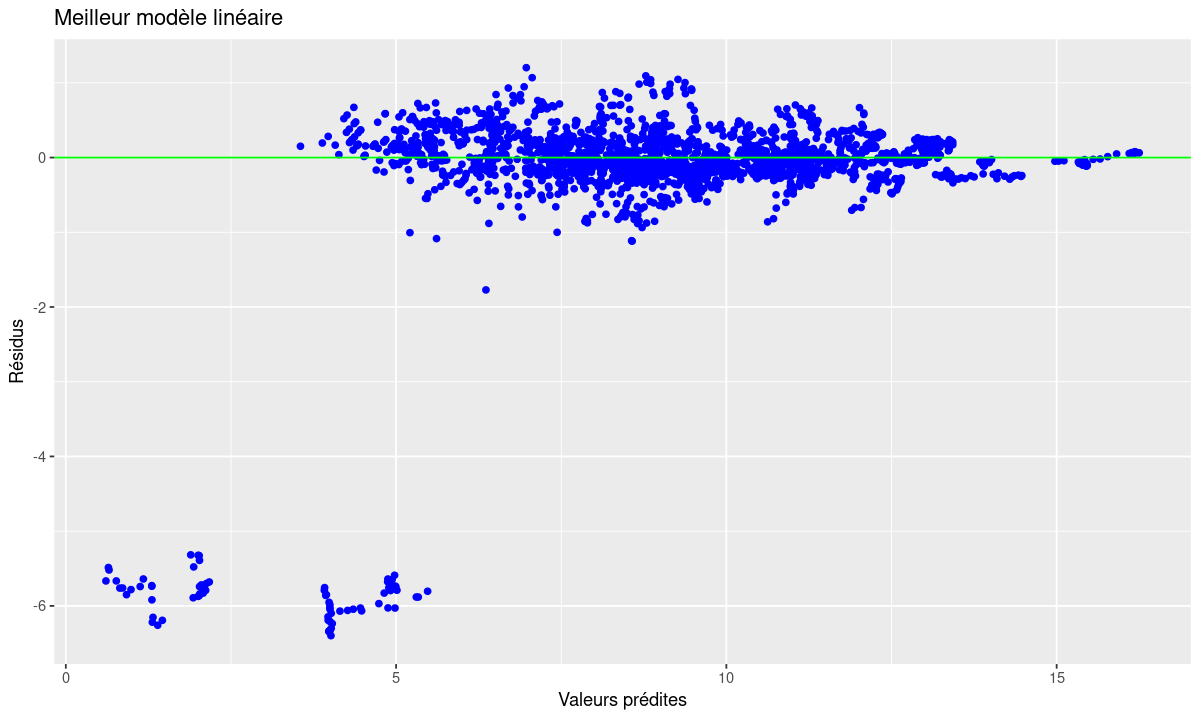

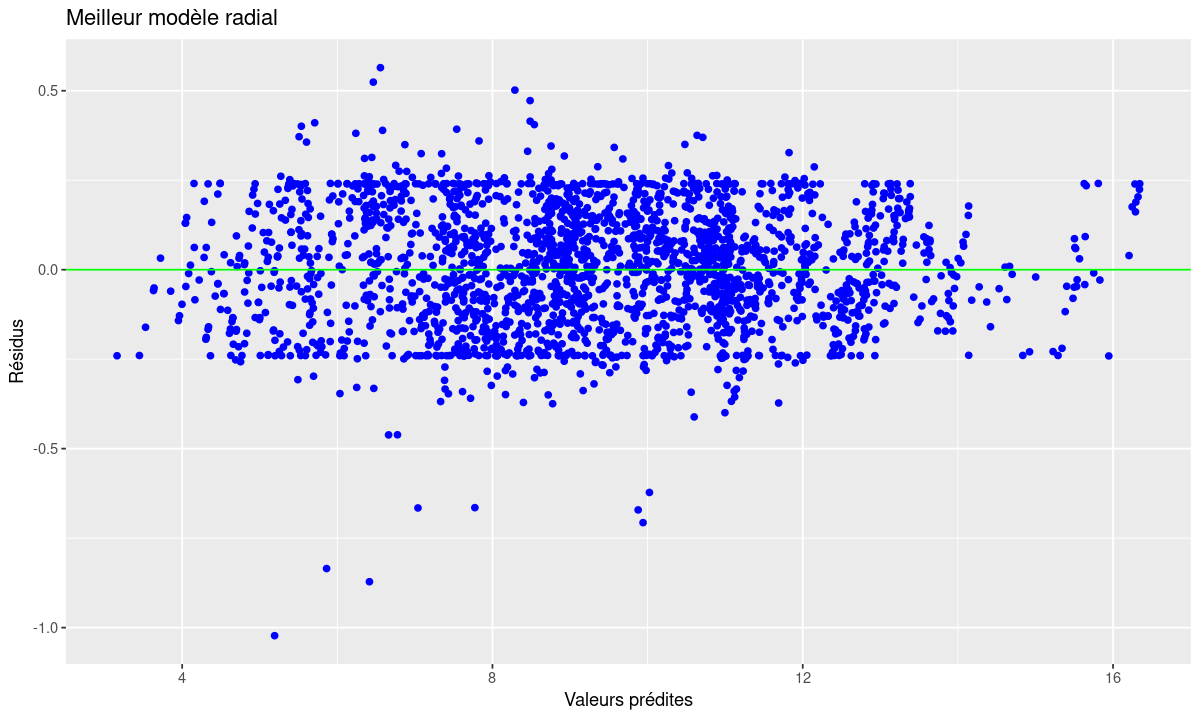

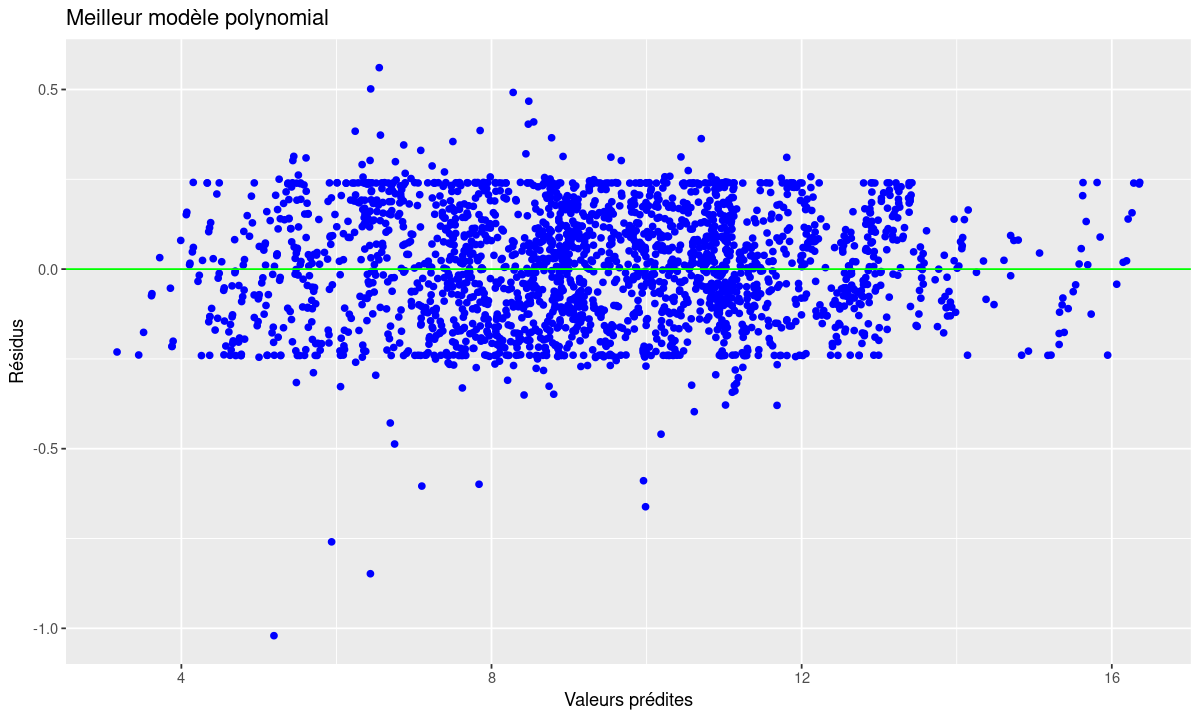

In [173]:
options(repr.plot.height = 6, repr.plot.width = 10)
fit_lin = predict(svm_lin, scaled_train)
res_lin = fit_lin - scaled_train$log_Value_co2_emissions_kt_by_country

gplot.res(fit_lin, res_lin, titre = "Meilleur modèle linéaire")

fit_rad = predict(svm_rad, scaled_train)
res_rad = fit_rad - scaled_train$log_Value_co2_emissions_kt_by_country

gplot.res(fit_rad, res_rad, titre = "Meilleur modèle radial")

fit_poly = predict(svm_poly, scaled_train)
res_poly = fit_poly - scaled_train$log_Value_co2_emissions_kt_by_country

gplot.res(fit_poly, res_poly, titre = "Meilleur modèle polynomial")

## Arbre de régression


In [52]:
library(rpart)
library(rpart.plot)

Il n'est pas nécessaire de standardiser nos données ici. En effet, cette méthode n'est pas sensible aux unités des variables, ne se basant pas sur des notions de distances.

Je renomme mes variables pour que l'affichage soit plus joli.

In [53]:
Train_log_renom <- scaled_train
Test_log_renom <- scaled_test

Nouveaux_noms <- c("Access_electricity", "Access_clean_fuels", "Electricity_fossil", "Electricity_nuclear",
                "Electricity_renewables", "Low_carbon_electricity", "Primary_energy_consumption_per_capita",
                "Energy_intensity", "GDP_growth", "GDP_per_capita", "Density", "Land_area", "Latitude",
                "Longitude", "Log_primary_energy_consumption_per_capita", "Log_energy_intensity",
                "Log_gdp_per_capita", "Log_CO2_emissions", "Log_density", "Log_land_area")

names(Train_log_renom) <- Nouveaux_noms
names(Test_log_renom) <- Nouveaux_noms

On génère ici l'arbre de régression basé sur l'ensemble de données 'Train_log_renom'

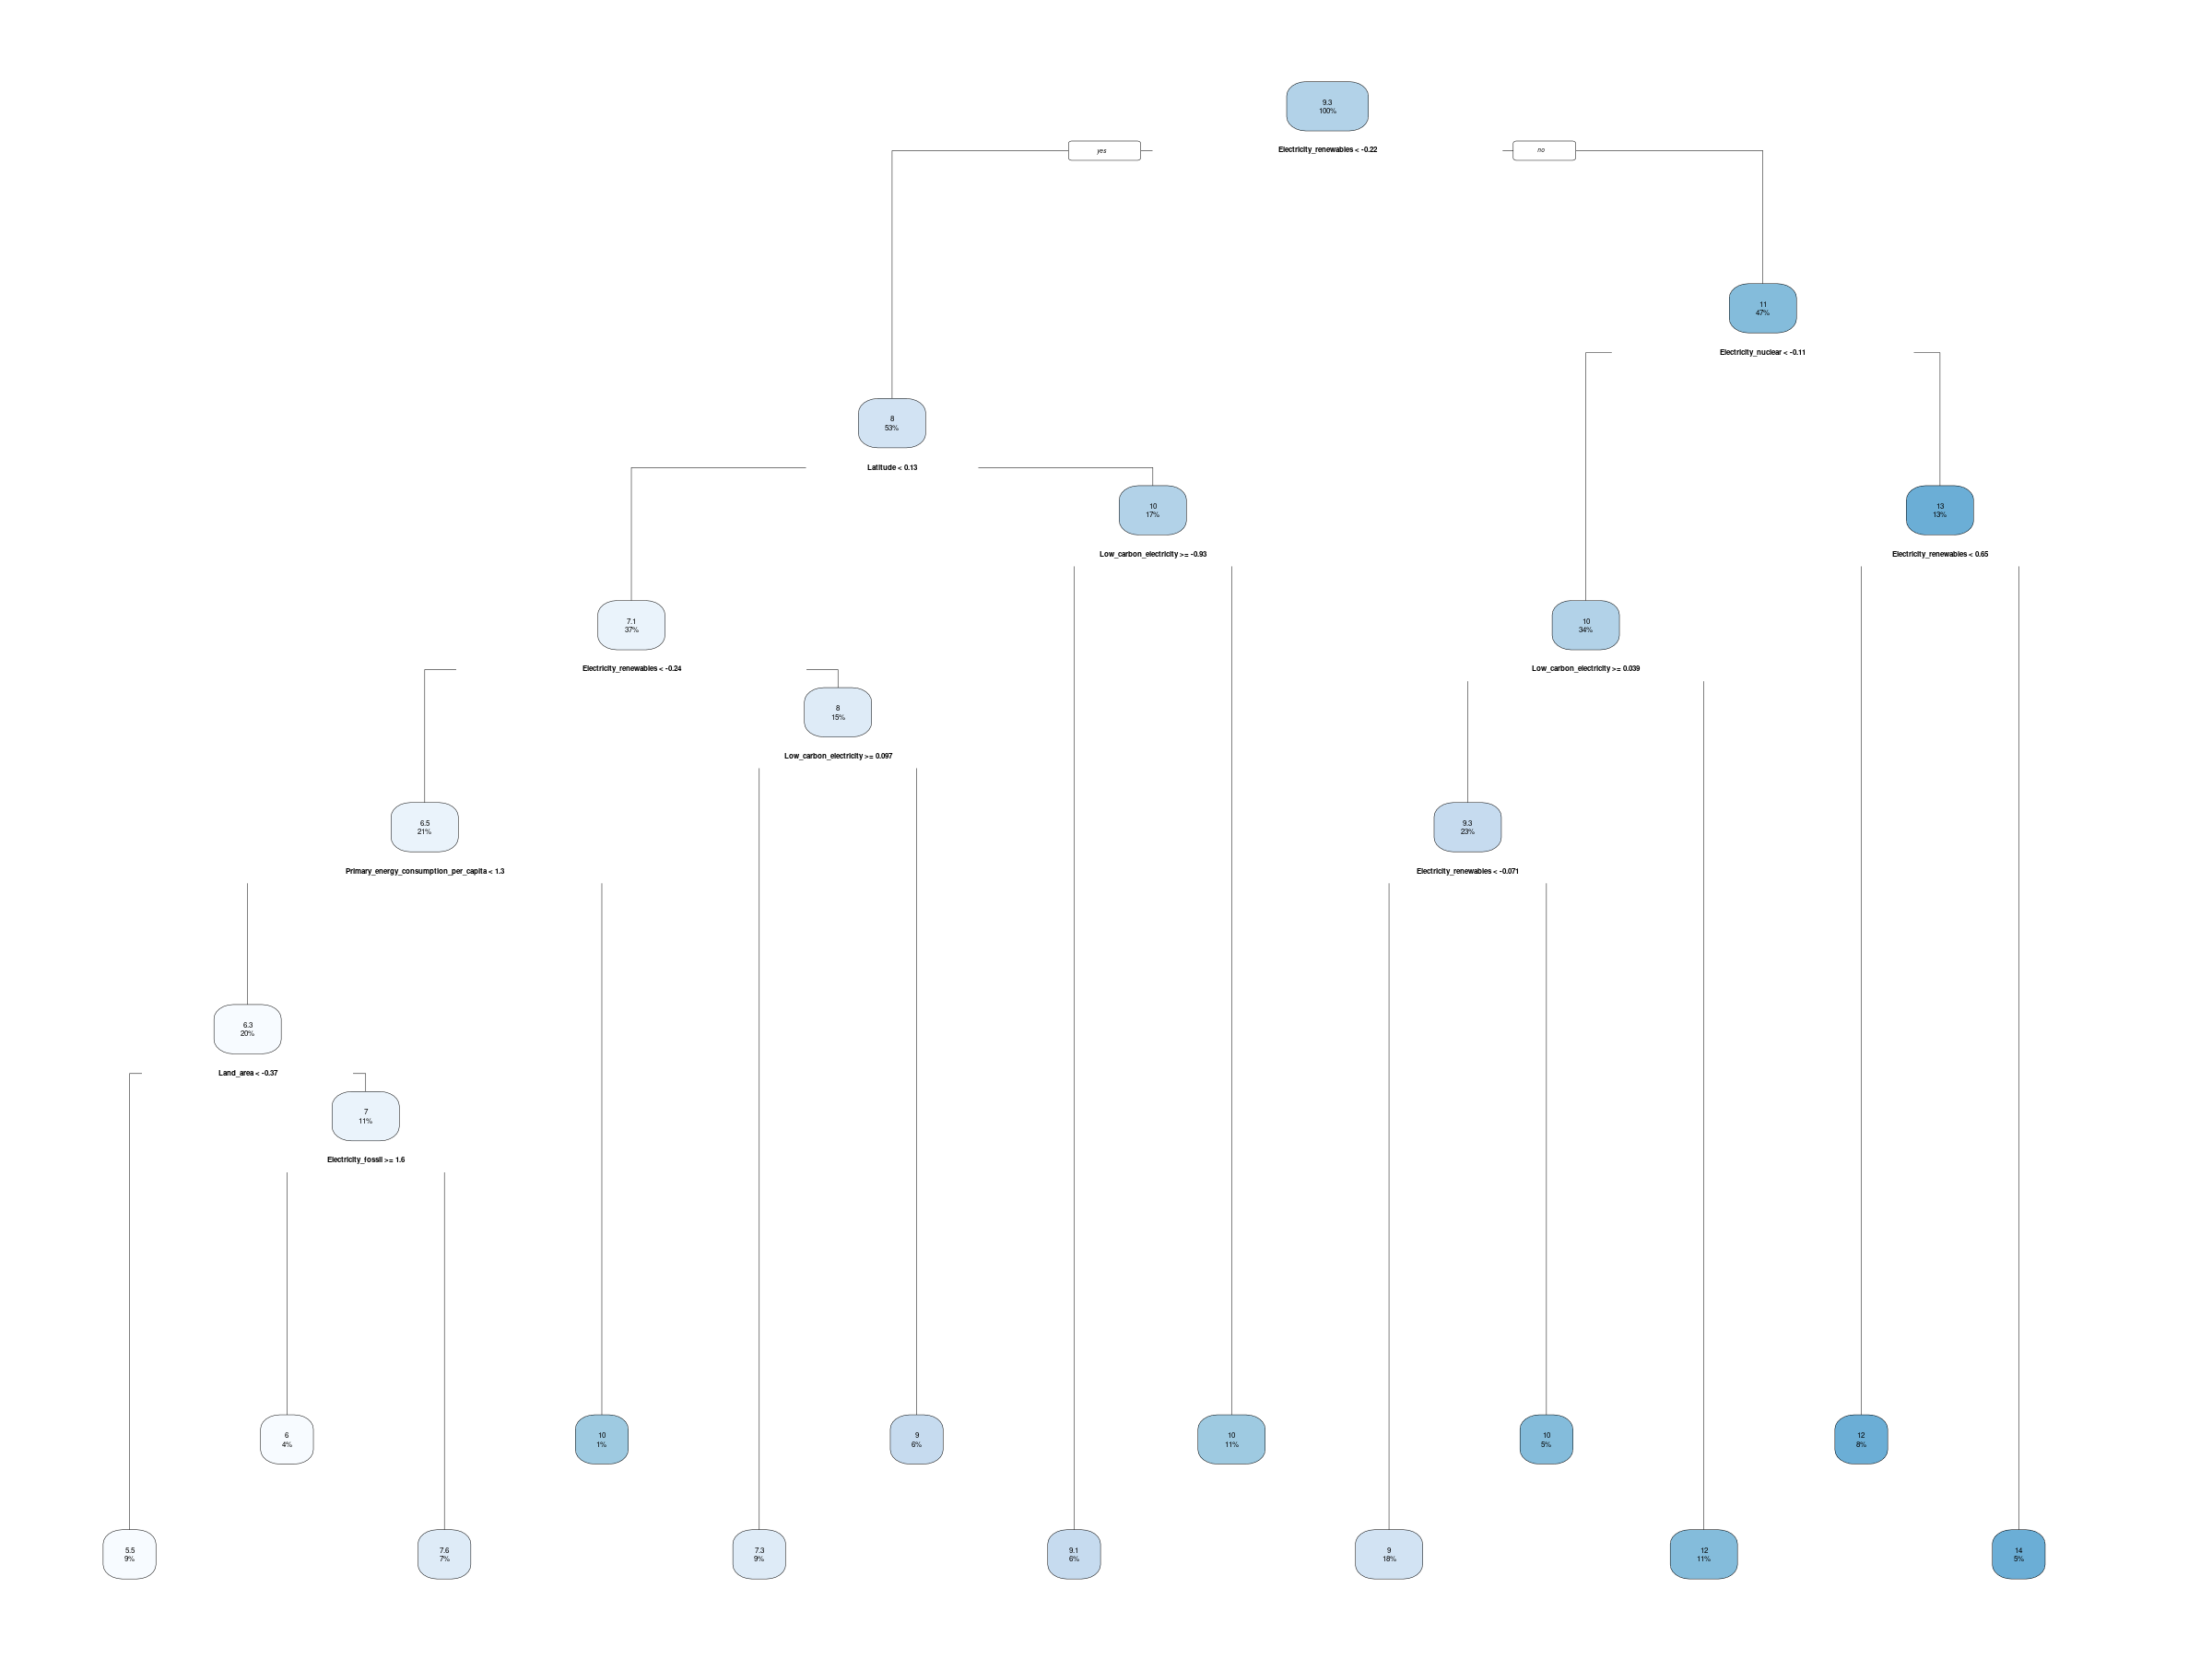

In [54]:
tree=rpart(Log_CO2_emissions~.,data=Train_log_renom) #control=rpart.control(cp=0.001)
#Affichage du graphe de l'arbre
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree)

On va tenter ici de réduire l'arbre de régression en cherchant le coefficiant 'cp' optimal par validation croisée

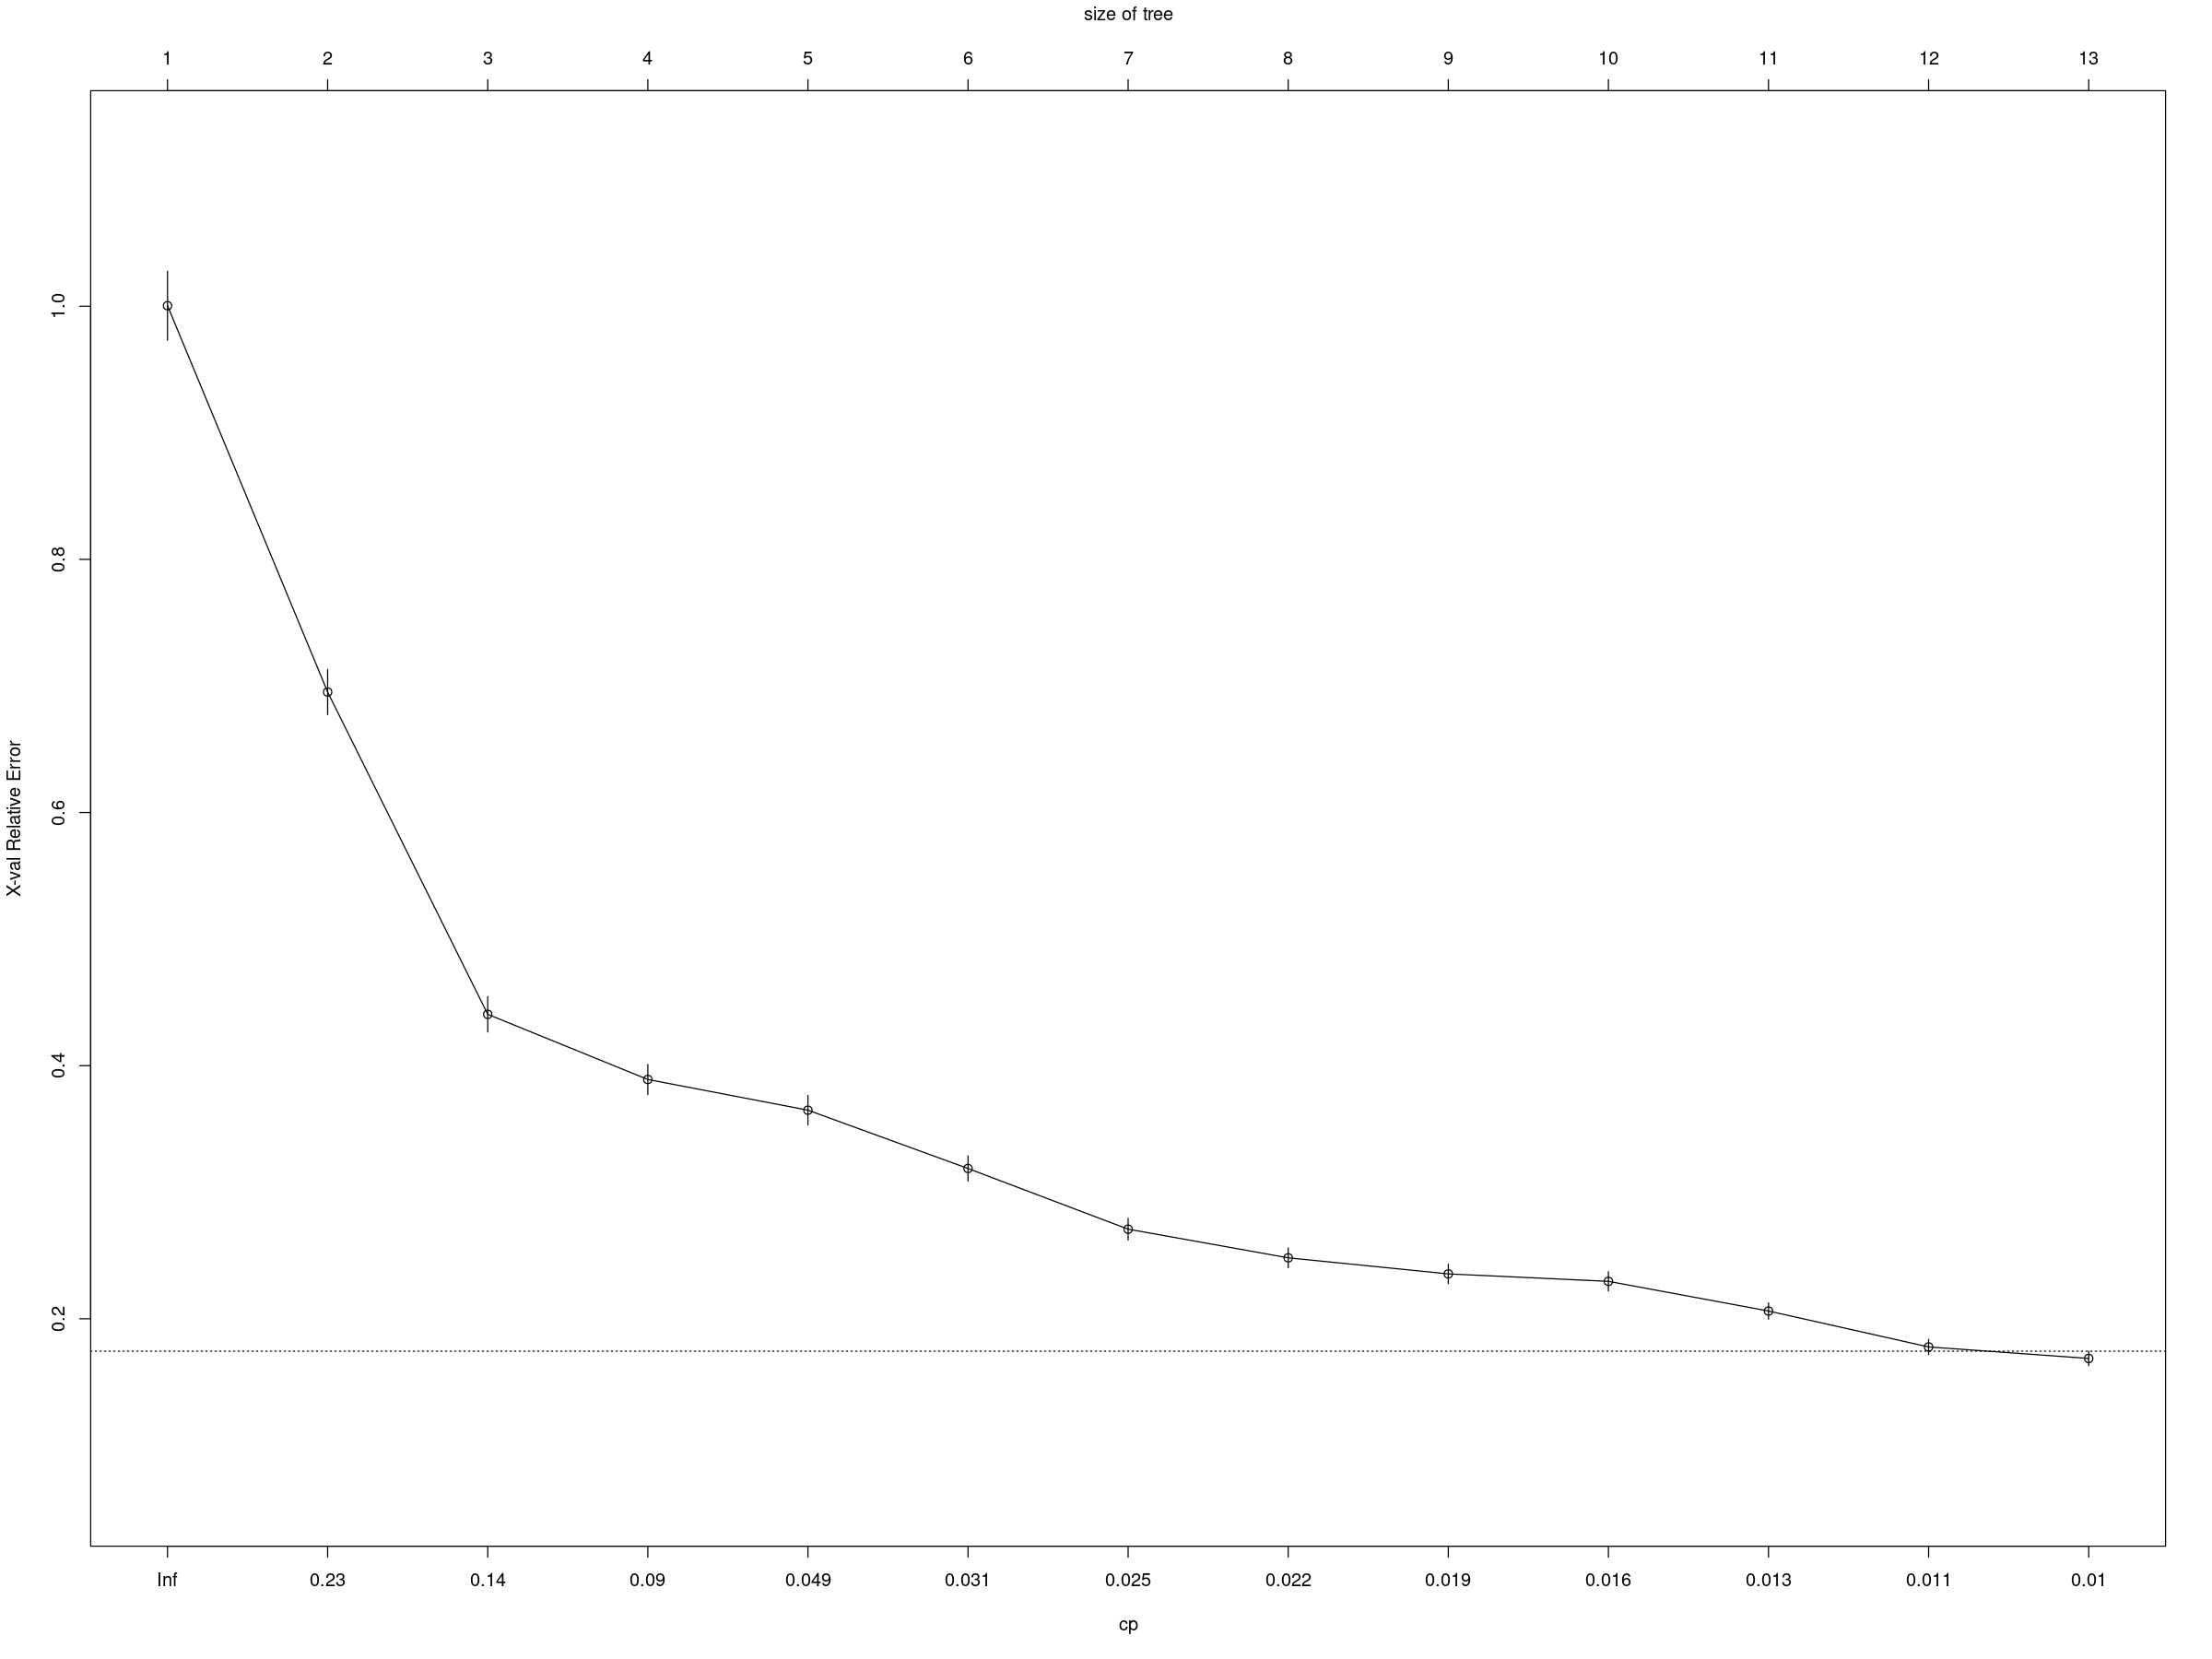

In [55]:
xdf<-xpred.rpart(tree,xval=100) 

# Cross-validation error par valeur de CP
CVerr<-apply((xdf-Train_log_renom$Log_CO2_emissions)^2,2,sum)

plotcp(tree)

On veut la valeur du cp qui correspond à la plus petite erreur.

Une fois que cette valeur est déterminée on affiche l'arbre de régression associé

[1] "cp optimisé: 0.010353"


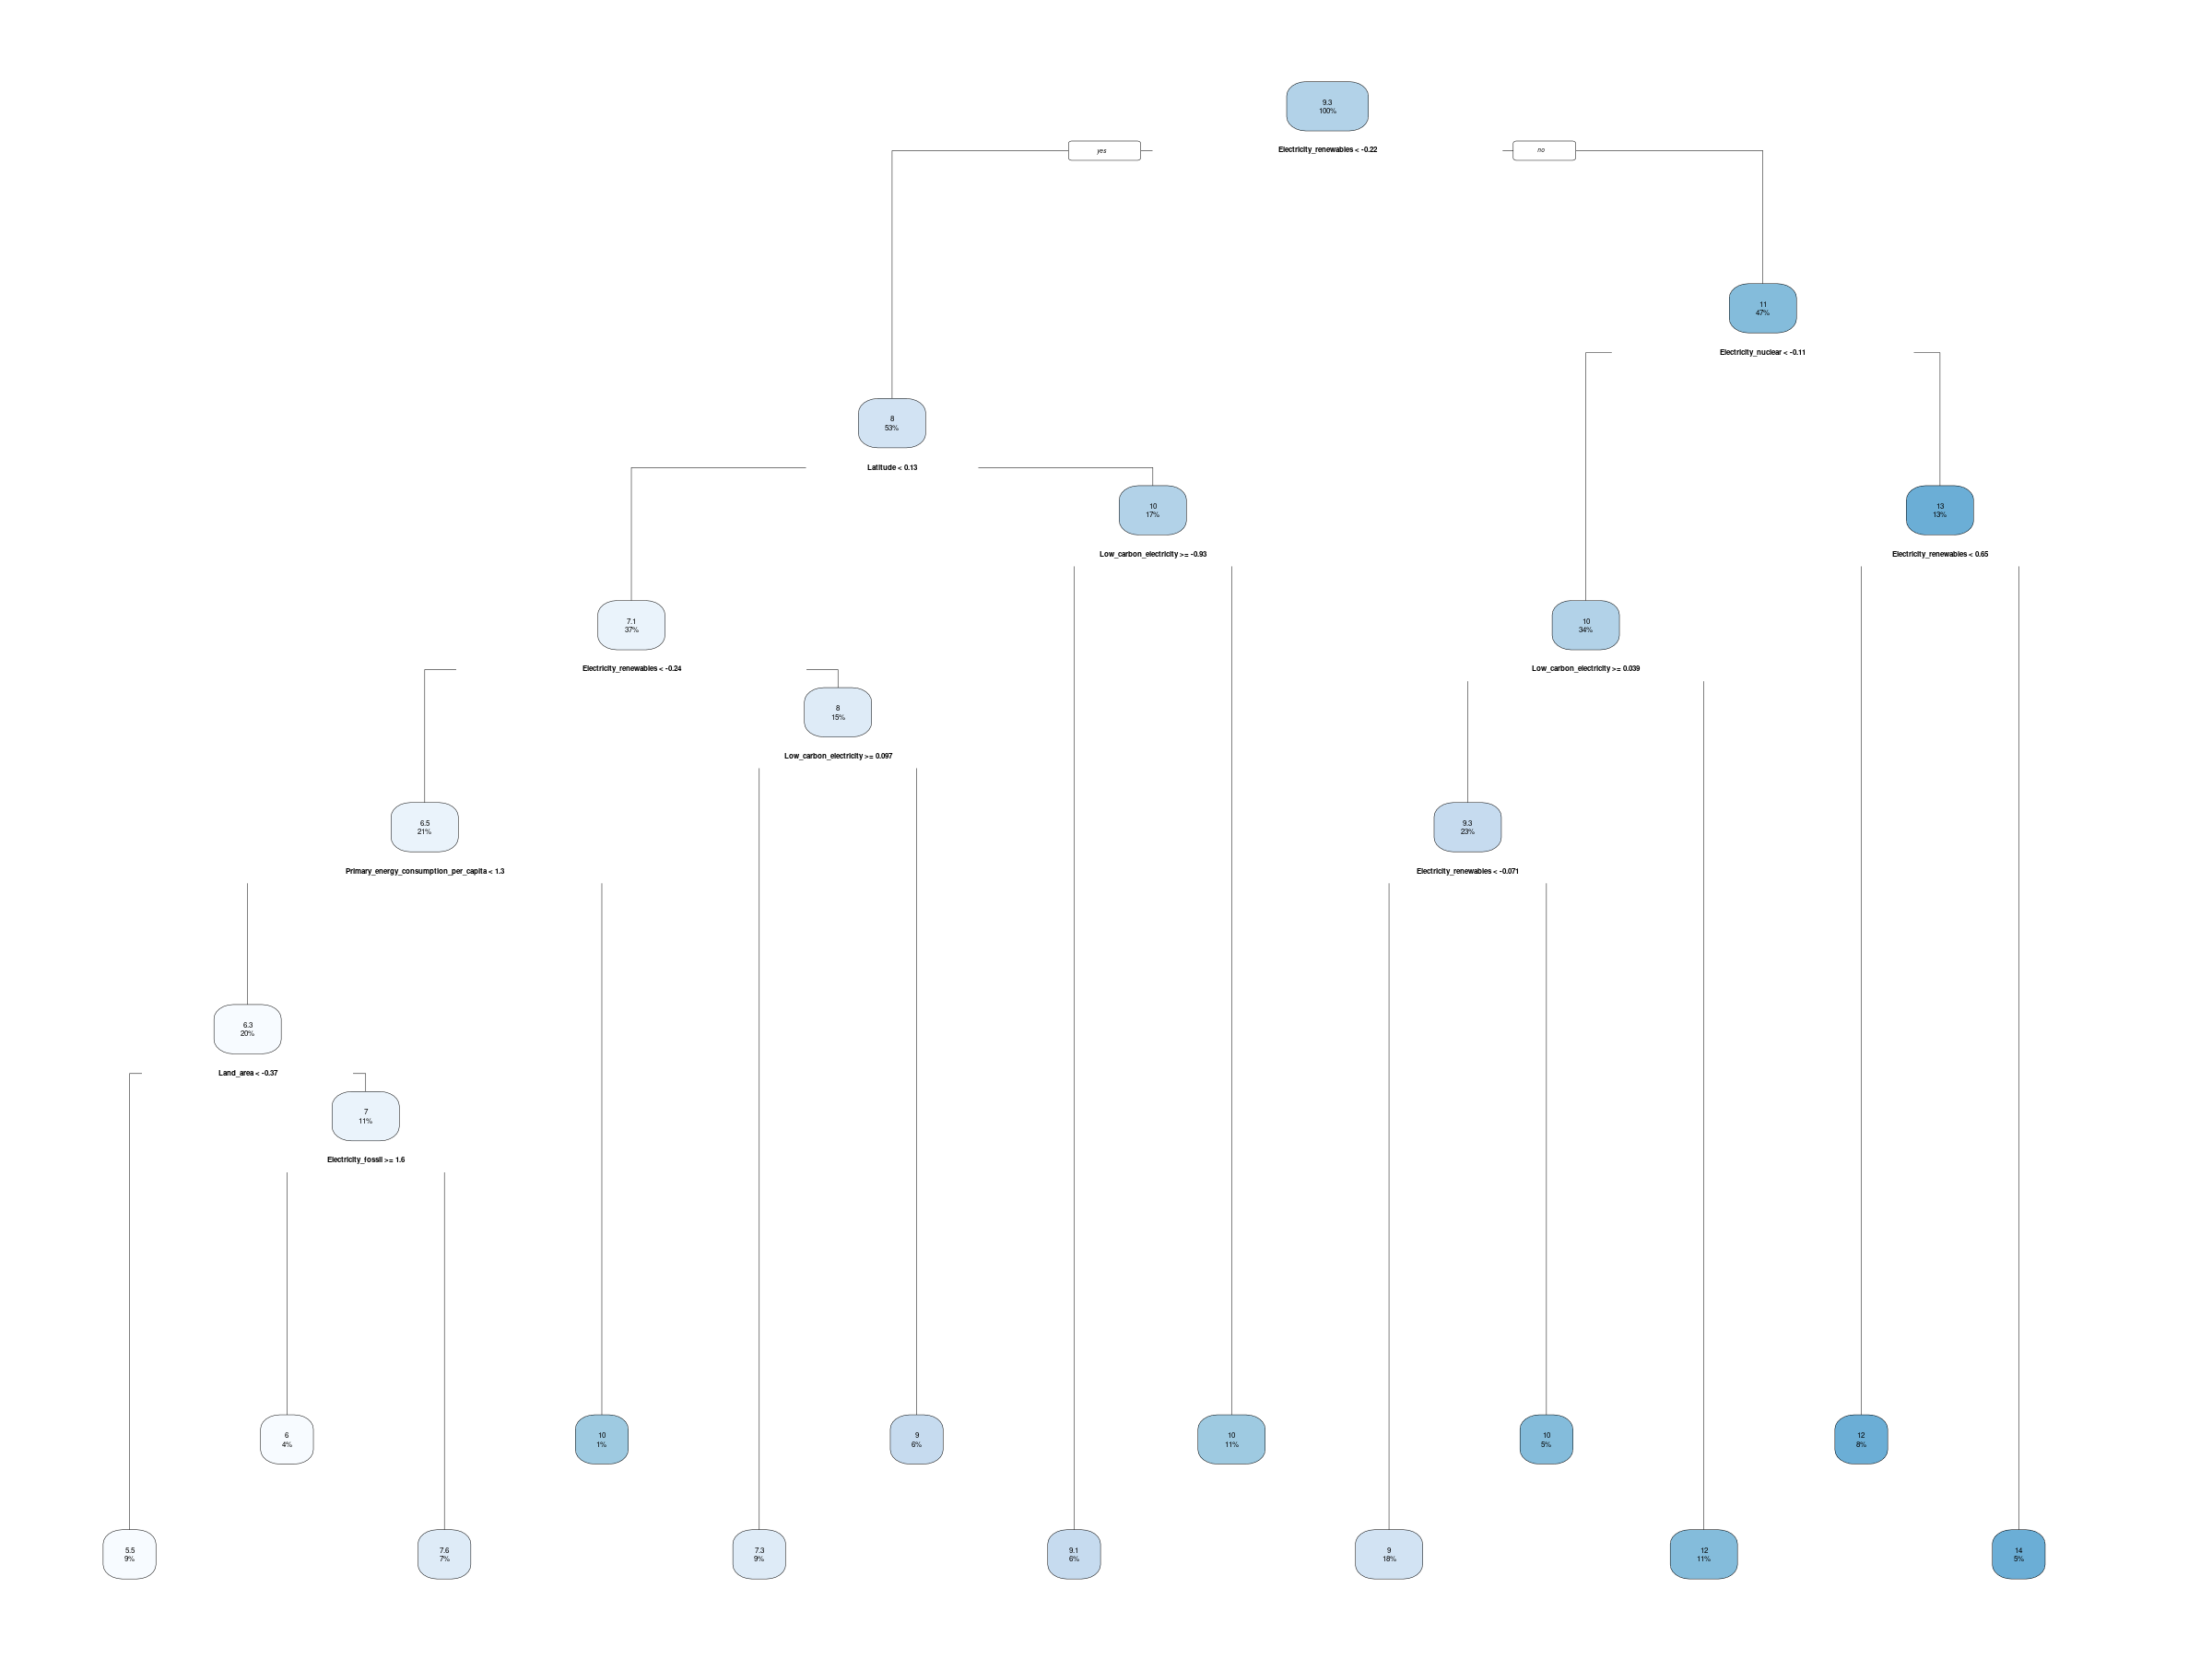

In [56]:
print(paste("cp optimisé:",as.numeric(attributes(which.min(CVerr))$names)))
treeOpt=rpart(Log_CO2_emissions~.,data=Train_log_renom,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(treeOpt,type=2,extra="auto")

Voici un autre affichage qui permet de mieux visualiser les variables dans l'arbre

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



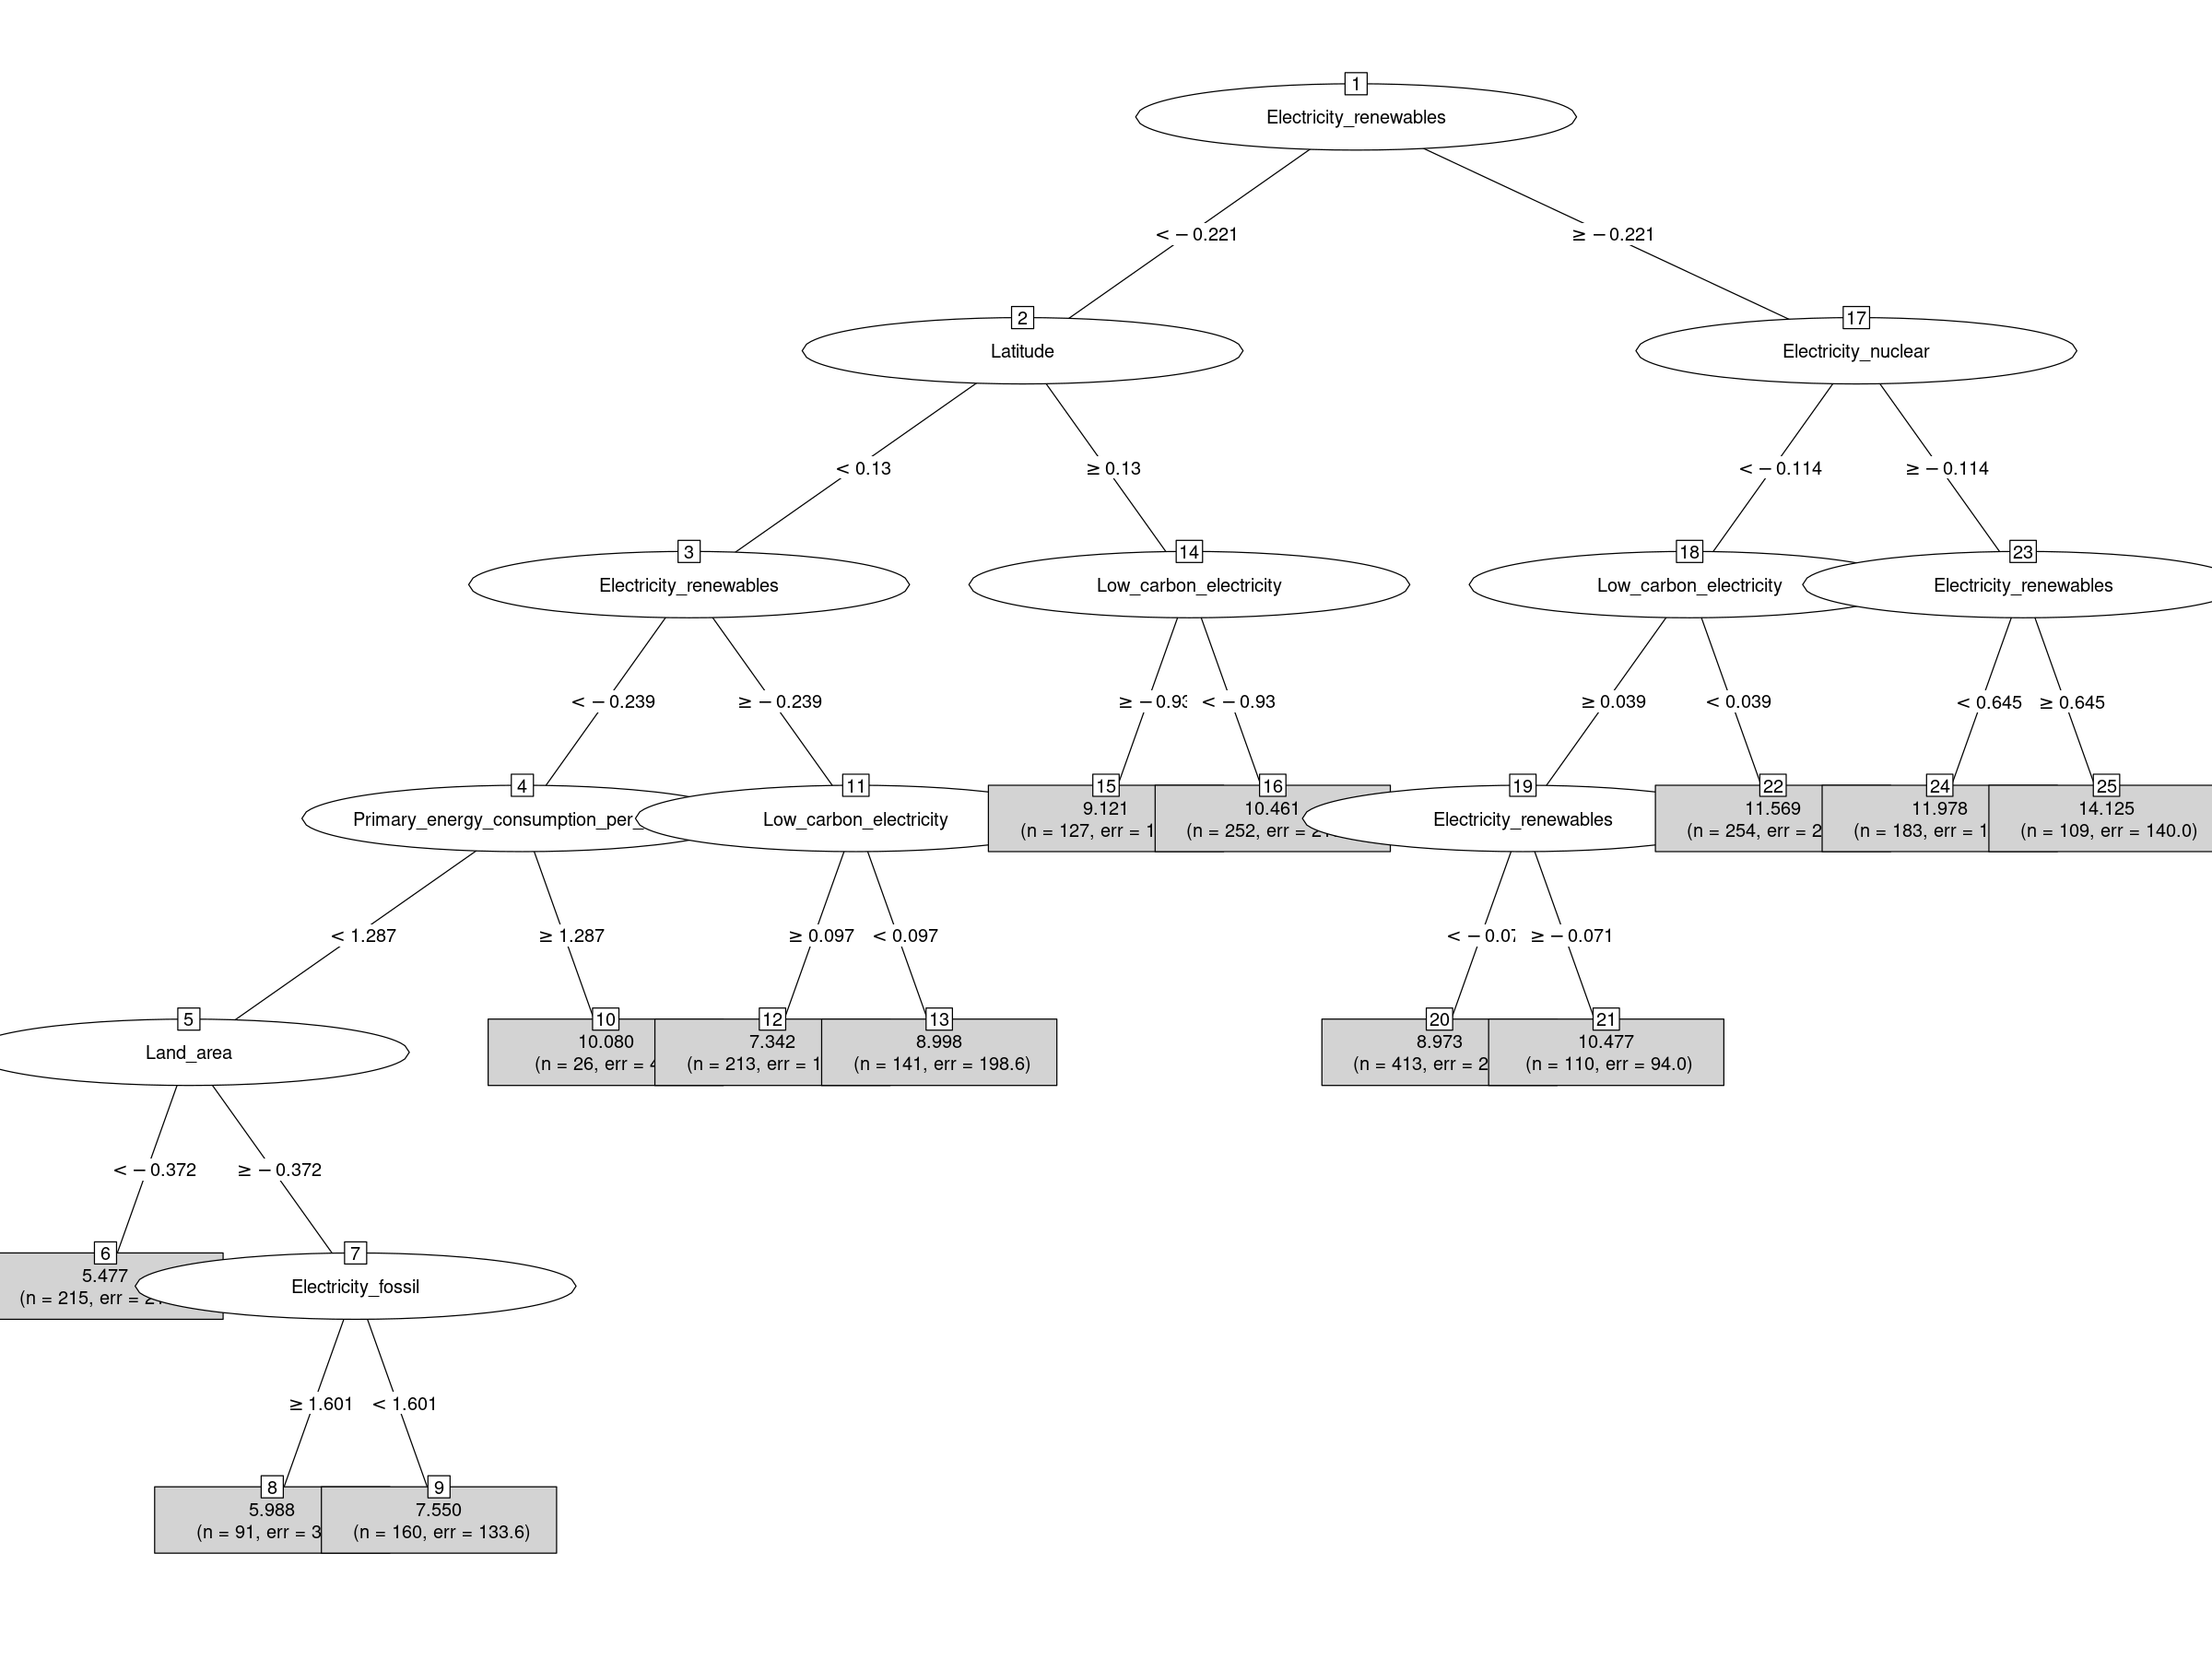

In [57]:
library(partykit)
plot(as.party(treeOpt), type="simple",cex=0.1)

On récupère ici les résidus et les valeurs prédites pour pouvoir par la suite afficher le graphe des résidus

In [58]:
fit.tree=predict(treeOpt)
res.tree=fit.tree-Train_log_renom$Log_CO2_emissions

## Forêts aléatoires

L'algorithme random forest est un algorithme d'apprentissage. Il contruit un grand nombre d'arbres de décision où chaque arbre est formé à l'aide d'un échantillon bootstrap des données et en sélectionnant un sous-ensemble aléatoire de variables à chaque nœud de décision. Les prédictions finales sont obtenues en agrégeant les prédictions de tous les arbres, généralement par une moyenne pour les problèmes de régression
 

In [59]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




Dans la commande suivante nous allons créer une foret aléatoire pour tenter d'expliquer la variable 'Value_co2_log'. Les données d'entrainement sur lesquels le modèle va s'appuyer sont 'datappr'.

Le paramètre 'ntre' spécifie le nombre d'arbres à inclure dans la foret aléatoire.

Le paramètre 'mtry'donne le nombre de variables à sélectionner à chaque fractionnement de l'arbre (par défaut il est ici égal à floor(ncol(datappr)/3)=4 )

Le paramètre 'do.trace' signifie que l'on peut suivre les performances du processus jusqu'à ce que 50 arbres maximum soient construits.

In [60]:
random_forest = randomForest(x=scaled_train, y=scaled_train$log_Value_co2_emissions_kt_by_country,
                             xtest=scaled_test, ytest=scaled_test$log_Value_co2_emissions_kt_by_country,
                             ntree=1000,do.trace=50,importance=TRUE, mtry=3)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01311     0.23 |  0.08135     1.51 |
 100 |  0.01076     0.19 |  0.08258     1.53 |
 150 |  0.01016     0.18 |  0.07251     1.35 |
 200 | 0.009628     0.17 |  0.07154     1.33 |
 250 | 0.009621     0.17 |  0.07245     1.35 |
 300 | 0.009161     0.16 |  0.07314     1.36 |
 350 | 0.008962     0.16 |    0.074     1.38 |
 400 | 0.008872     0.15 |  0.07341     1.36 |
 450 | 0.008999     0.16 |   0.0729     1.35 |
 500 | 0.008798     0.15 |  0.07194     1.34 |
 550 | 0.008663     0.15 |  0.07159     1.33 |
 600 | 0.008555     0.15 |  0.07209     1.34 |
 650 |  0.00848     0.15 |  0.07101     1.32 |
 700 |  0.00834     0.14 |   0.0703     1.31 |
 750 | 0.008318     0.14 |  0.07024     1.31 |
 800 | 0.008344     0.14 |  0.07141     1.33 |
 850 | 0.008349     0.14 |  0.07107     1.32 |
 900 | 0.008357     0.15 |  0.07077     1.32 |
 950 |  0.00831     0.14 |  0.07075     1.32 |
1000 | 0.0082

On cherche à minimiser le critère Out-Of-Bag pour trouver le nombre d'arbre adéquat.

Validation croisée à l'aide de la fonction 'rfcv' dans le package random forest :

In [61]:
random_forestOpt=rfcv(scaled_train, scaled_train$log_Value_co2_emissions_kt_by_country, nfold=10)
#print(random_forestOpt)
nb_opt <- which.min(random_forestOpt$error.cv)
random_forestOpt=randomForest(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, mtry = nb_opt)

On récupère ici les résidus et les valeurs ajustées

In [62]:
random_forestOpt


Call:
 randomForest(formula = log_Value_co2_emissions_kt_by_country ~      ., data = scaled_train, mtry = nb_opt) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.01872577
                    % Var explained: 99.67

In [63]:
fit.rfr=random_forestOpt$predicted
res.rfr=fit.rfr-scaled_train$log_Value_co2_emissions_kt_by_country

Nous allons afficher l'importance de chaque variable dans la prédiction du résultat:

[1] "-----Classement des variables selon leur importance------"


Electricity.from.renewables..TWh. 
                                                         2448.87 
                                  Electricity.from.nuclear..TWh. 
                                                         1523.48 
                                              log_Land.Area.Km2. 
                                                         1519.53 
                                                        Latitude 
                                                         1346.50 
                                                  Land.Area.Km2. 
                                                         1296.48 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                          741.71 
          log_Primary.energy.consumption.per.capita..kWh.person. 
                                                          735.69 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                          627.29 
                         Access.to.electricity....of.population. 
                                                          546.73 
                          Low.carbon.electricity....electricity. 
                                                          534.99 
                               Access.to.clean.fuels.for.cooking 
                                                          324.20 
                                              log_Density.P.Km2. 
                                                          307.57 
                                                       Longitude 
                                                          287.43 
                                                  Density.P.Km2. 
                                                          287.01 
                                                  gdp_per_capita 
                                                          232.85 
                                              log_gdp_per_capita 
                                                          211.83 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          112.96 
 log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          102.21 
                                                      gdp_growth 
                                                           16.45

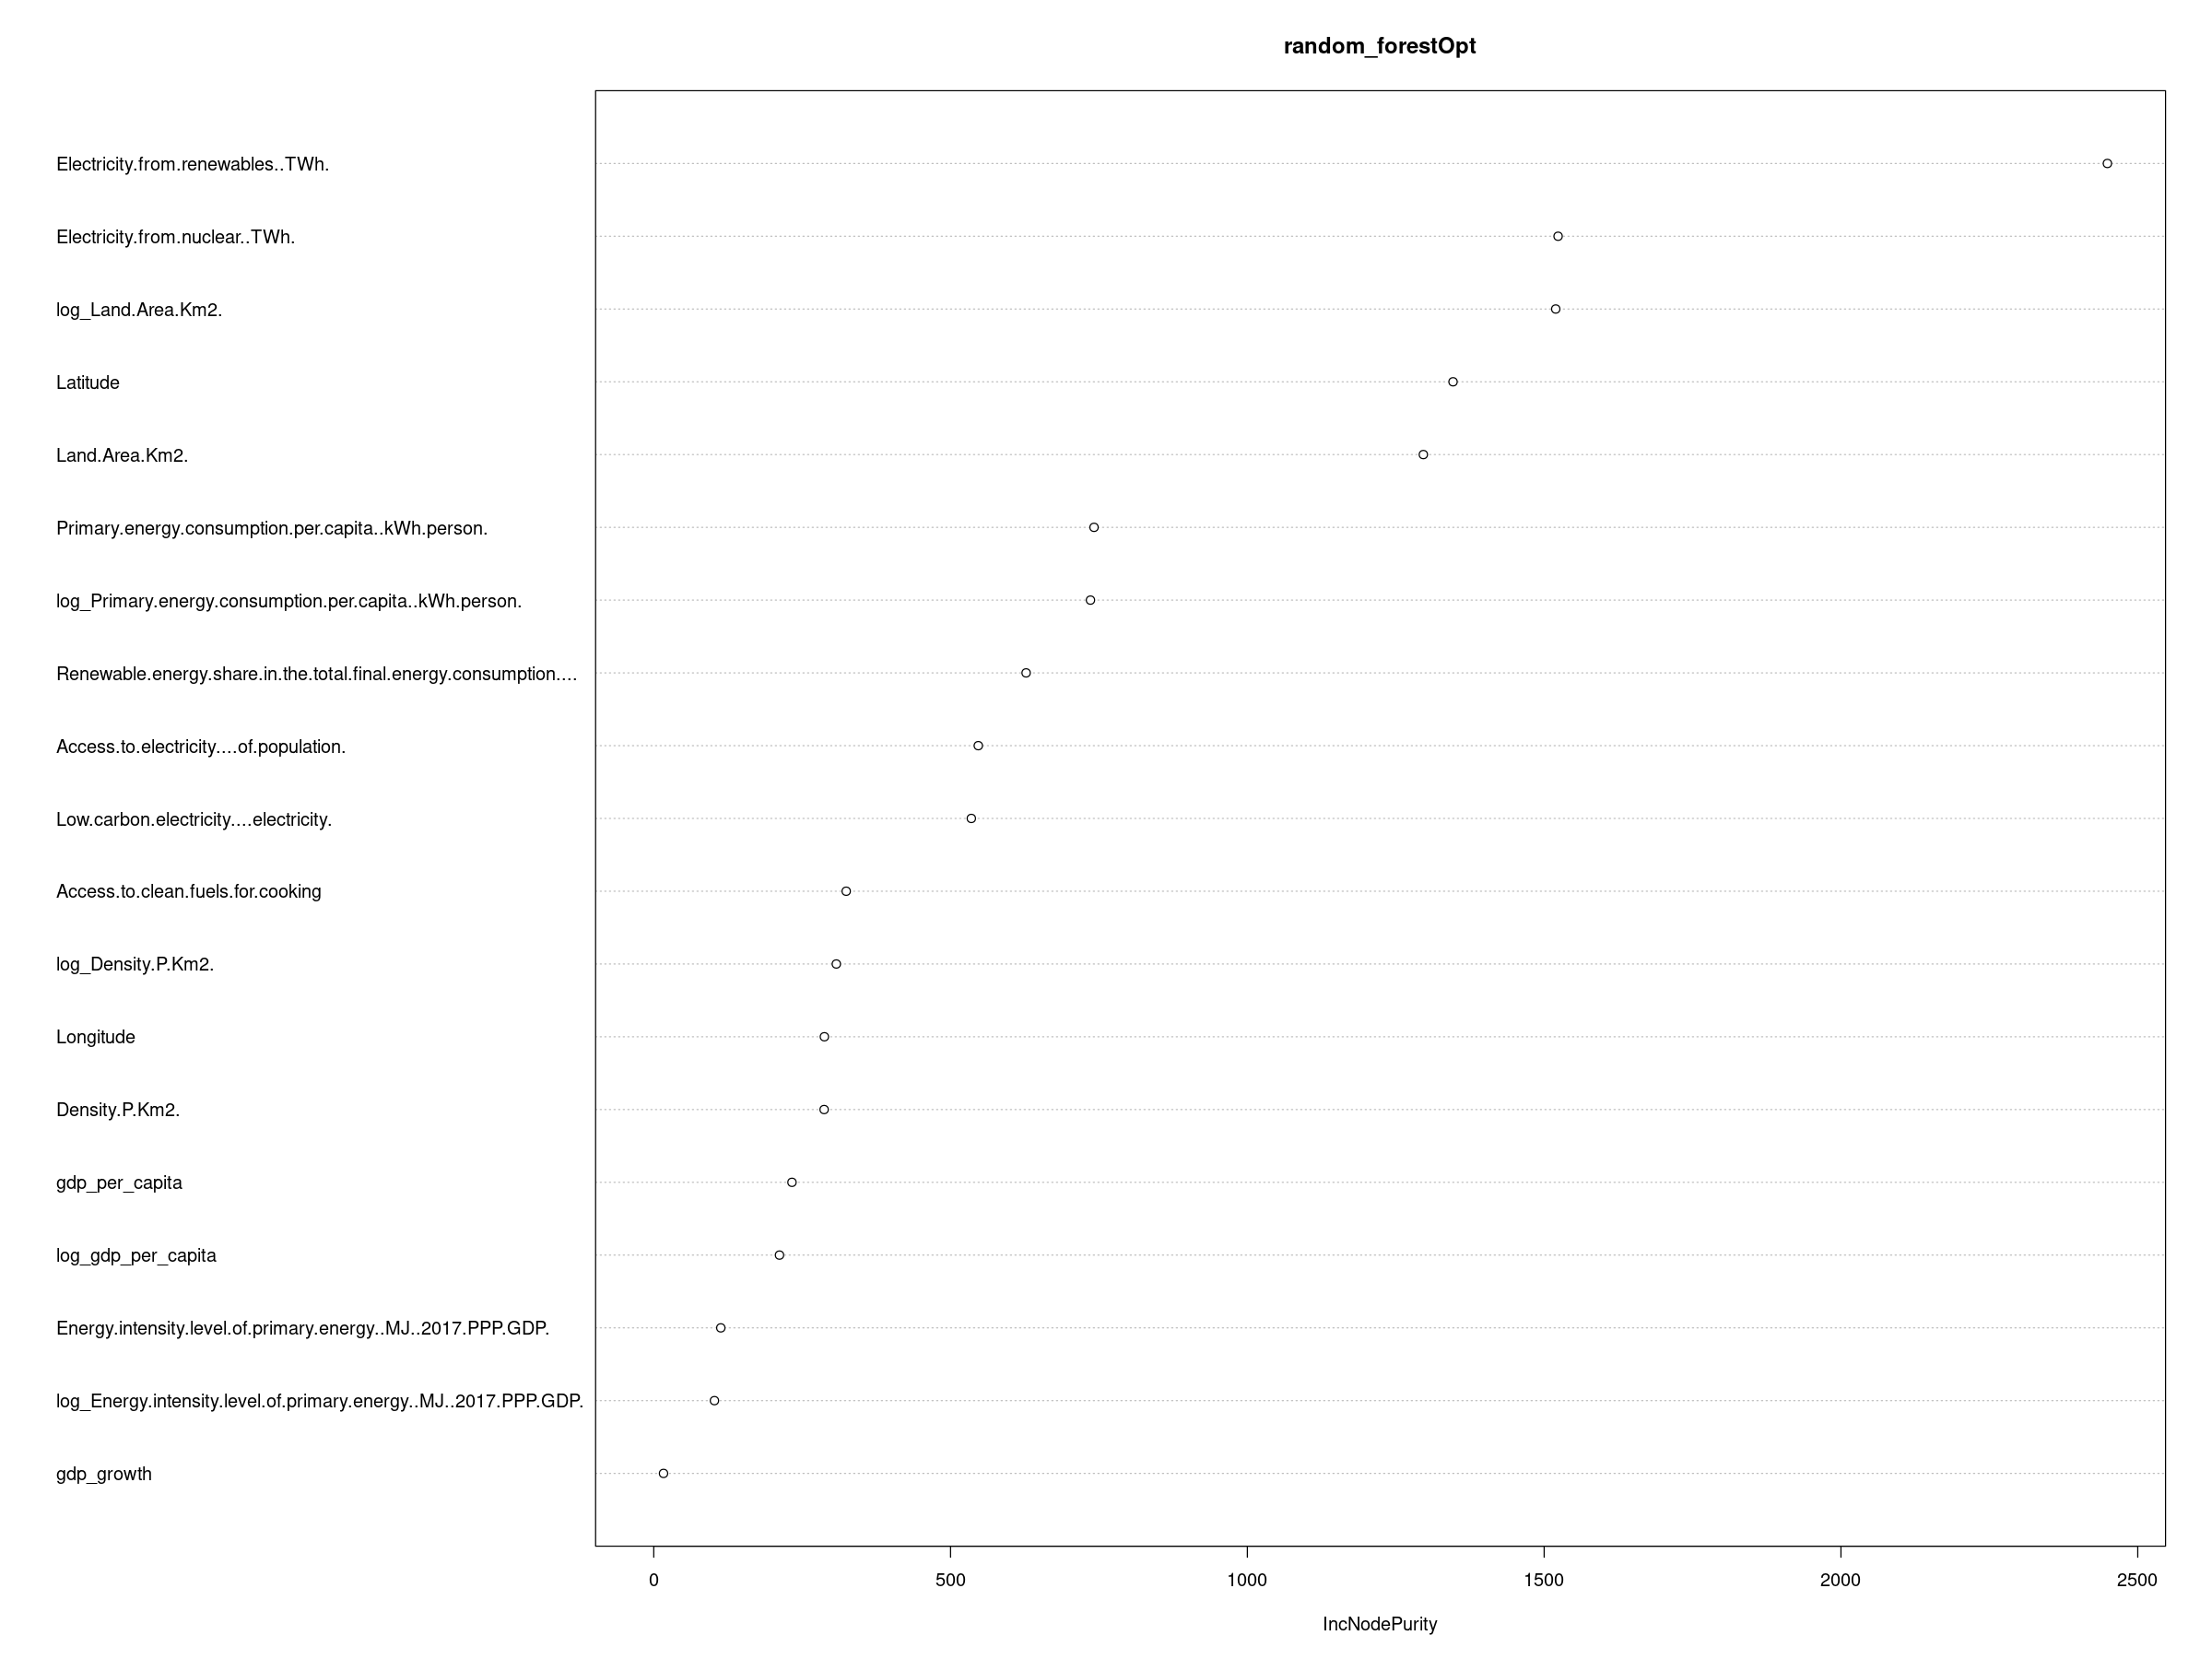

In [64]:
#attributes(rf.reg)
#random_forest$importance
print('-----Classement des variables selon leur importance------')
sort(round(importance(random_forestOpt), 2)[,1], decreasing=TRUE)
varImpPlot(random_forestOpt)

Les variables les plus influentes dans la prédiction de ce modèle sont 'Electricity.from.renewables..TWh.' et 'Electricity.from.nuclear..TWh.'

## Boosting

In [65]:
library(gbm)

Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [66]:
boost.reg = gbm(log_Value_co2_emissions_kt_by_country ~ ., data = scaled_train, distribution = "gaussian", 
                n.trees = 10000, cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.01, verbose = FALSE)

var                                                             
Electricity.from.renewables..TWh.                                Electricity.from.renewables..TWh.                               
Land.Area.Km2.                                                   Land.Area.Km2.                                                  
Latitude                                                         Latitude                                                        
Renewable.energy.share.in.the.total.final.energy.consumption.... Renewable.energy.share.in.the.total.final.energy.consumption....
Electricity.from.nuclear..TWh.                                   Electricity.from.nuclear..TWh.                                  
Primary.energy.consumption.per.capita..kWh.person.               Primary.energy.consumption.per.capita..kWh.person.              
Low.carbon.electricity....electricity.                           Low.carbon.electricity....electricity.                          
Density.P.Km2.                                                   Density.P.Km2.                                                  
Longitude                                                        Longitude                                                       
Access.to.clean.fuels.for.cooking                                Access.to.clean.fuels.for.cooking                               
Access.to.electricity....of.population.                          Access.to.electricity....of.population.                         
gdp_per_capita                                                   gdp_per_capita                                                  
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     
gdp_growth                                                       gdp_growth                                                      
log_Primary.energy.consumption.per.capita..kWh.person.           log_Primary.energy.consumption.per.capita..kWh.person.          
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.  log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
log_gdp_per_capita                                               log_gdp_per_capita                                              
log_Density.P.Km2.                                               log_Density.P.Km2.                                              
log_Land.Area.Km2.                                               log_Land.Area.Km2.                                              
                                                                 rel.inf    
Electricity.from.renewables..TWh.                                24.39505215
Land.Area.Km2.                                                   24.03083214
Latitude                                                         11.48606884
Renewable.energy.share.in.the.total.final.energy.consumption.... 11.19008453
Electricity.from.nuclear..TWh.                                    9.48617378
Primary.energy.consumption.per.capita..kWh.person.                6.38806924
Low.carbon.electricity....electricity.                            3.65897920
Density.P.Km2.                                                    3.61159943
Longitude                                                         2.37671696
Access.to.clean.fuels.for.cooking                                 1.37241615
Access.to.electricity....of.population.                           1.26039169
gdp_per_capita                                                    0.51888033
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.16096605
gdp_growth                                                        0.06376951
log_Primary.energy.consumption.per.capita..kWh.person.            0.00000000
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.   0.00000000
log_gdp_per_capita                                                0.00000000
log_Density.P.Km2.                                                0.00000000
lo

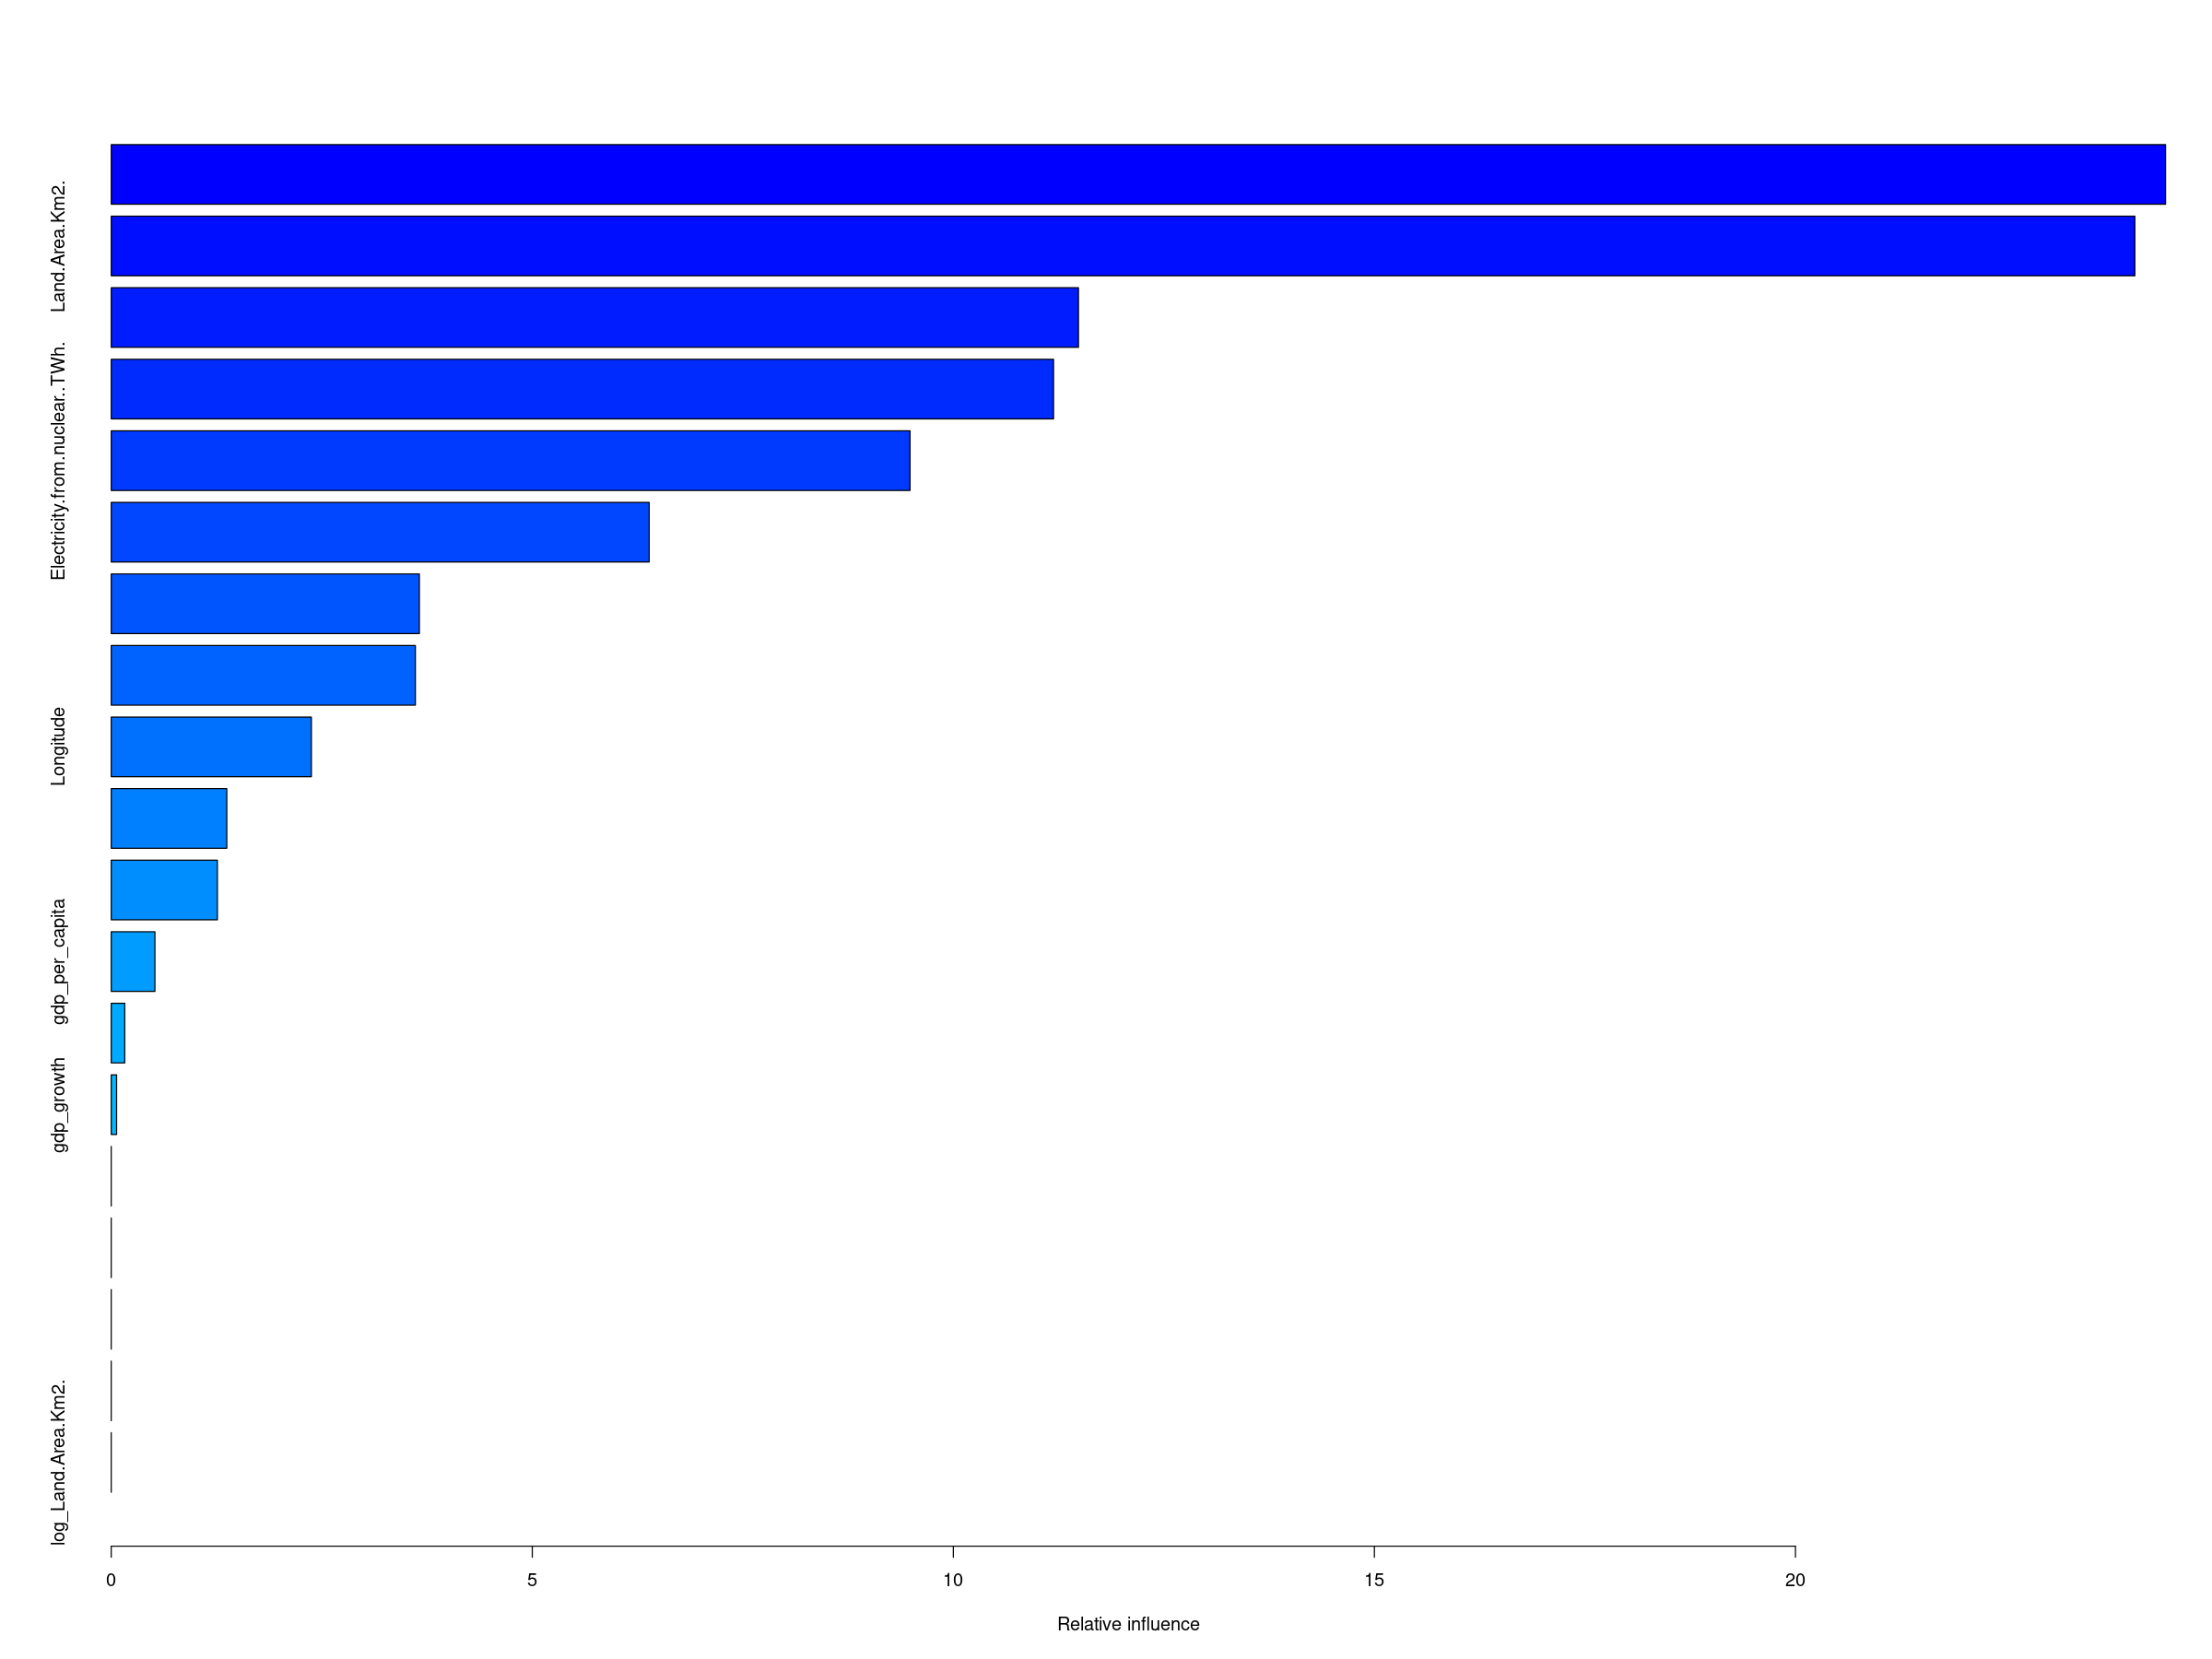

In [67]:
summary(boost.reg)

La méthode de gradient boosting nous renvoie l'influence relative des variables (en %) dans l'explication notre variable à expliquer : le logarithme des émissions en co2 de chaque pays.

[1] 10000


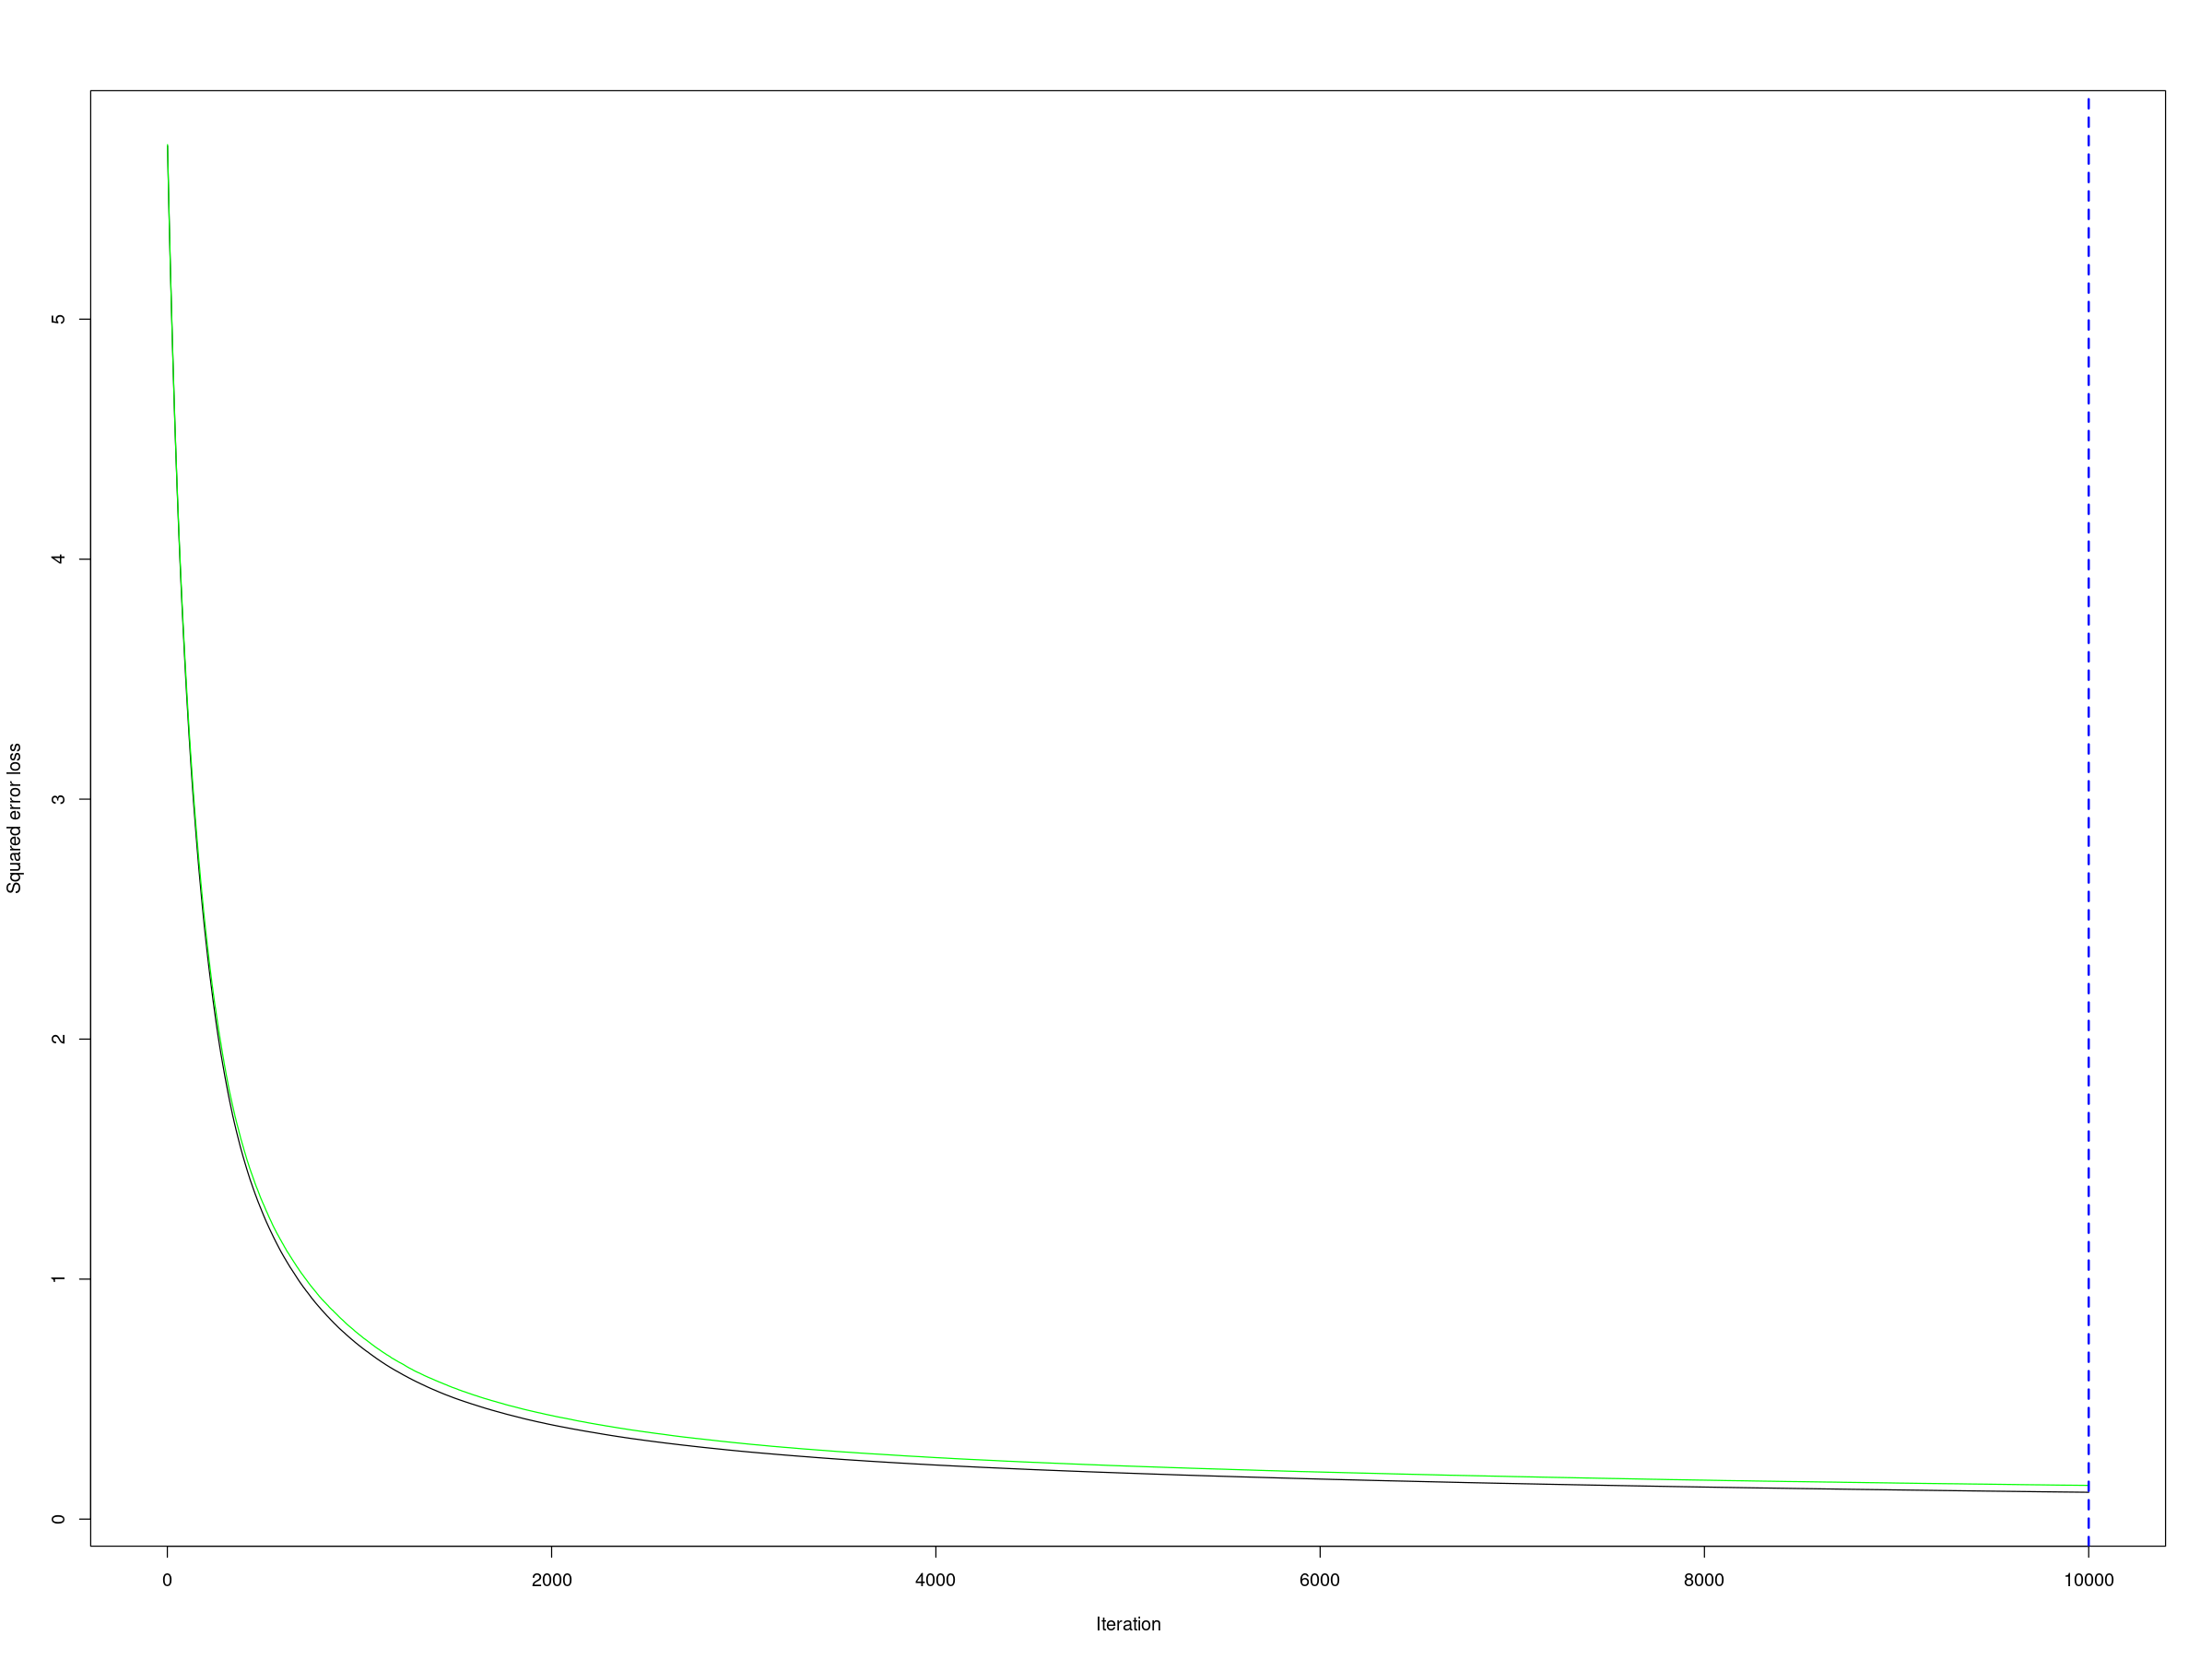

In [68]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost.reg,method="cv")
print(best.iter)

Remarque : en augmentant le nombre d'arbres, le modèle ne devient que meilleur. On ne réussit pas à observer le phénomène d'overfitting. Par souci de temps, on choisit n.trees = 10000, le maximum testé.

In [69]:
fit.boost = boost.reg$fit
res.boost = fit.boost - scaled_train$log_Value_co2_emissions_kt_by_country

Test de la fonction boost en faisant varier le coef de rétrecissement

## Réseaux de neurones

La librairie 'nnet' permet de créer des modèle de réseaux de neurone pour la régression. 
Ici, on crée un modèle où la cible à prédire est 'Value_co2_log' et où les variables explicatives seront 'datappr'.

Le paramètre 'size' spécifie le nimbre de neurones dans la couche cachée du réseau.
Le paramètre 'decay' permet de controler le taux de régularisation appliqué aux poids du modèle pour éviter le surajustement.
Le paramètre 'maxit' spécifie le nombre maximum d'itérations d'entraînement à effectuer.

Le paramètre 'linout = TRUE' indique que la sortie du réseau de neurones sera linéaire.

In [70]:
library(nnet)

Optimisation des paramètres par validation croisée :
<br> On recherche ici à ajuster les hyper-paramètres. On va chercher la meilleure combinaison de taille de la couche cachée ('size') et de taux de régularisation ('decay')

De même que pour SVM, on a beaucoup de problèmes de temps de compilation. On a compilé une fois le modèle, et on réutilisera ces paramètres par la suite. Cependant, on n'obtient pas du tout les mêmes résultats que sur python, qui semble bien plus adapté aux réseaux de neurones. On ne peut notamment pas aller à plus de 47 neurones, sous peine d'une erreur. En effet, la librairie semble produire une erreur "Trop de pondérations" dès que le nombre de pondérations excède 1000.

En python, on trouve que les paramètres optimaux sont : 1000 neurones, pour une couche cachée. Cependant, à cause de l'incapacité en R d'utiliser tous les GPUs pour accélérer le processus, il nous est pas possible de tester des réseaux de neurones à plus de 5 neurones.

In [71]:
#nnet_tuned <- tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=scaled_train, size=c(10,25,40),
                        #decay=1:2, maxit=500,linout=TRUE)

In [72]:
#plot(nnet_tuned)

Quelle combinaison de paramètres donne la meilleure performance ? 

In [73]:
optimal_size = 47                #paramètres trouvés précédemment
optimal_decay = 1

On genere ci-dessous le réseau de neurones résultant de notre choix de paramètres précédent.

In [74]:
nnetOpt = nnet(log_Value_co2_emissions_kt_by_country~.,
               data=scaled_train,size=optimal_size,decay=optimal_decay,linout=TRUE,maxit=5000)

# weights:  988
initial  value 334011.625794 
iter  10 value 1049.914356
iter  20 value 537.664843
iter  30 value 361.258771
iter  40 value 295.316909
iter  50 value 254.151254
iter  60 value 234.797024
iter  70 value 223.114855
iter  80 value 215.173304
iter  90 value 208.589001
iter 100 value 203.492828
iter 110 value 197.467180
iter 120 value 192.404879
iter 130 value 189.535096
iter 140 value 187.599646
iter 150 value 185.991757
iter 160 value 184.493845
iter 170 value 183.076769
iter 180 value 181.305610
iter 190 value 179.355323
iter 200 value 177.711457
iter 210 value 176.058932
iter 220 value 174.416283
iter 230 value 173.163719
iter 240 value 171.959914
iter 250 value 171.211197
iter 260 value 170.023842
iter 270 value 169.228024
iter 280 value 168.515915
iter 290 value 167.833986
iter 300 value 167.369634
iter 310 value 166.818159
iter 320 value 166.333229
iter 330 value 165.784212
iter 340 value 165.306844
iter 350 value 164.754638
iter 360 value 164.262644
iter 370 value 16

Récupération des résidus et des valeurs ajustée

In [75]:
fit.nnetOpt=predict(nnetOpt,data=scaled_train)
res.nnetOpt=fit.nnetOpt-scaled_train$log_Value_co2_emissions_kt_by_country

## COMPARAISON DES DIFFERENTS MODELES

Graphe des résidus des différents modèles

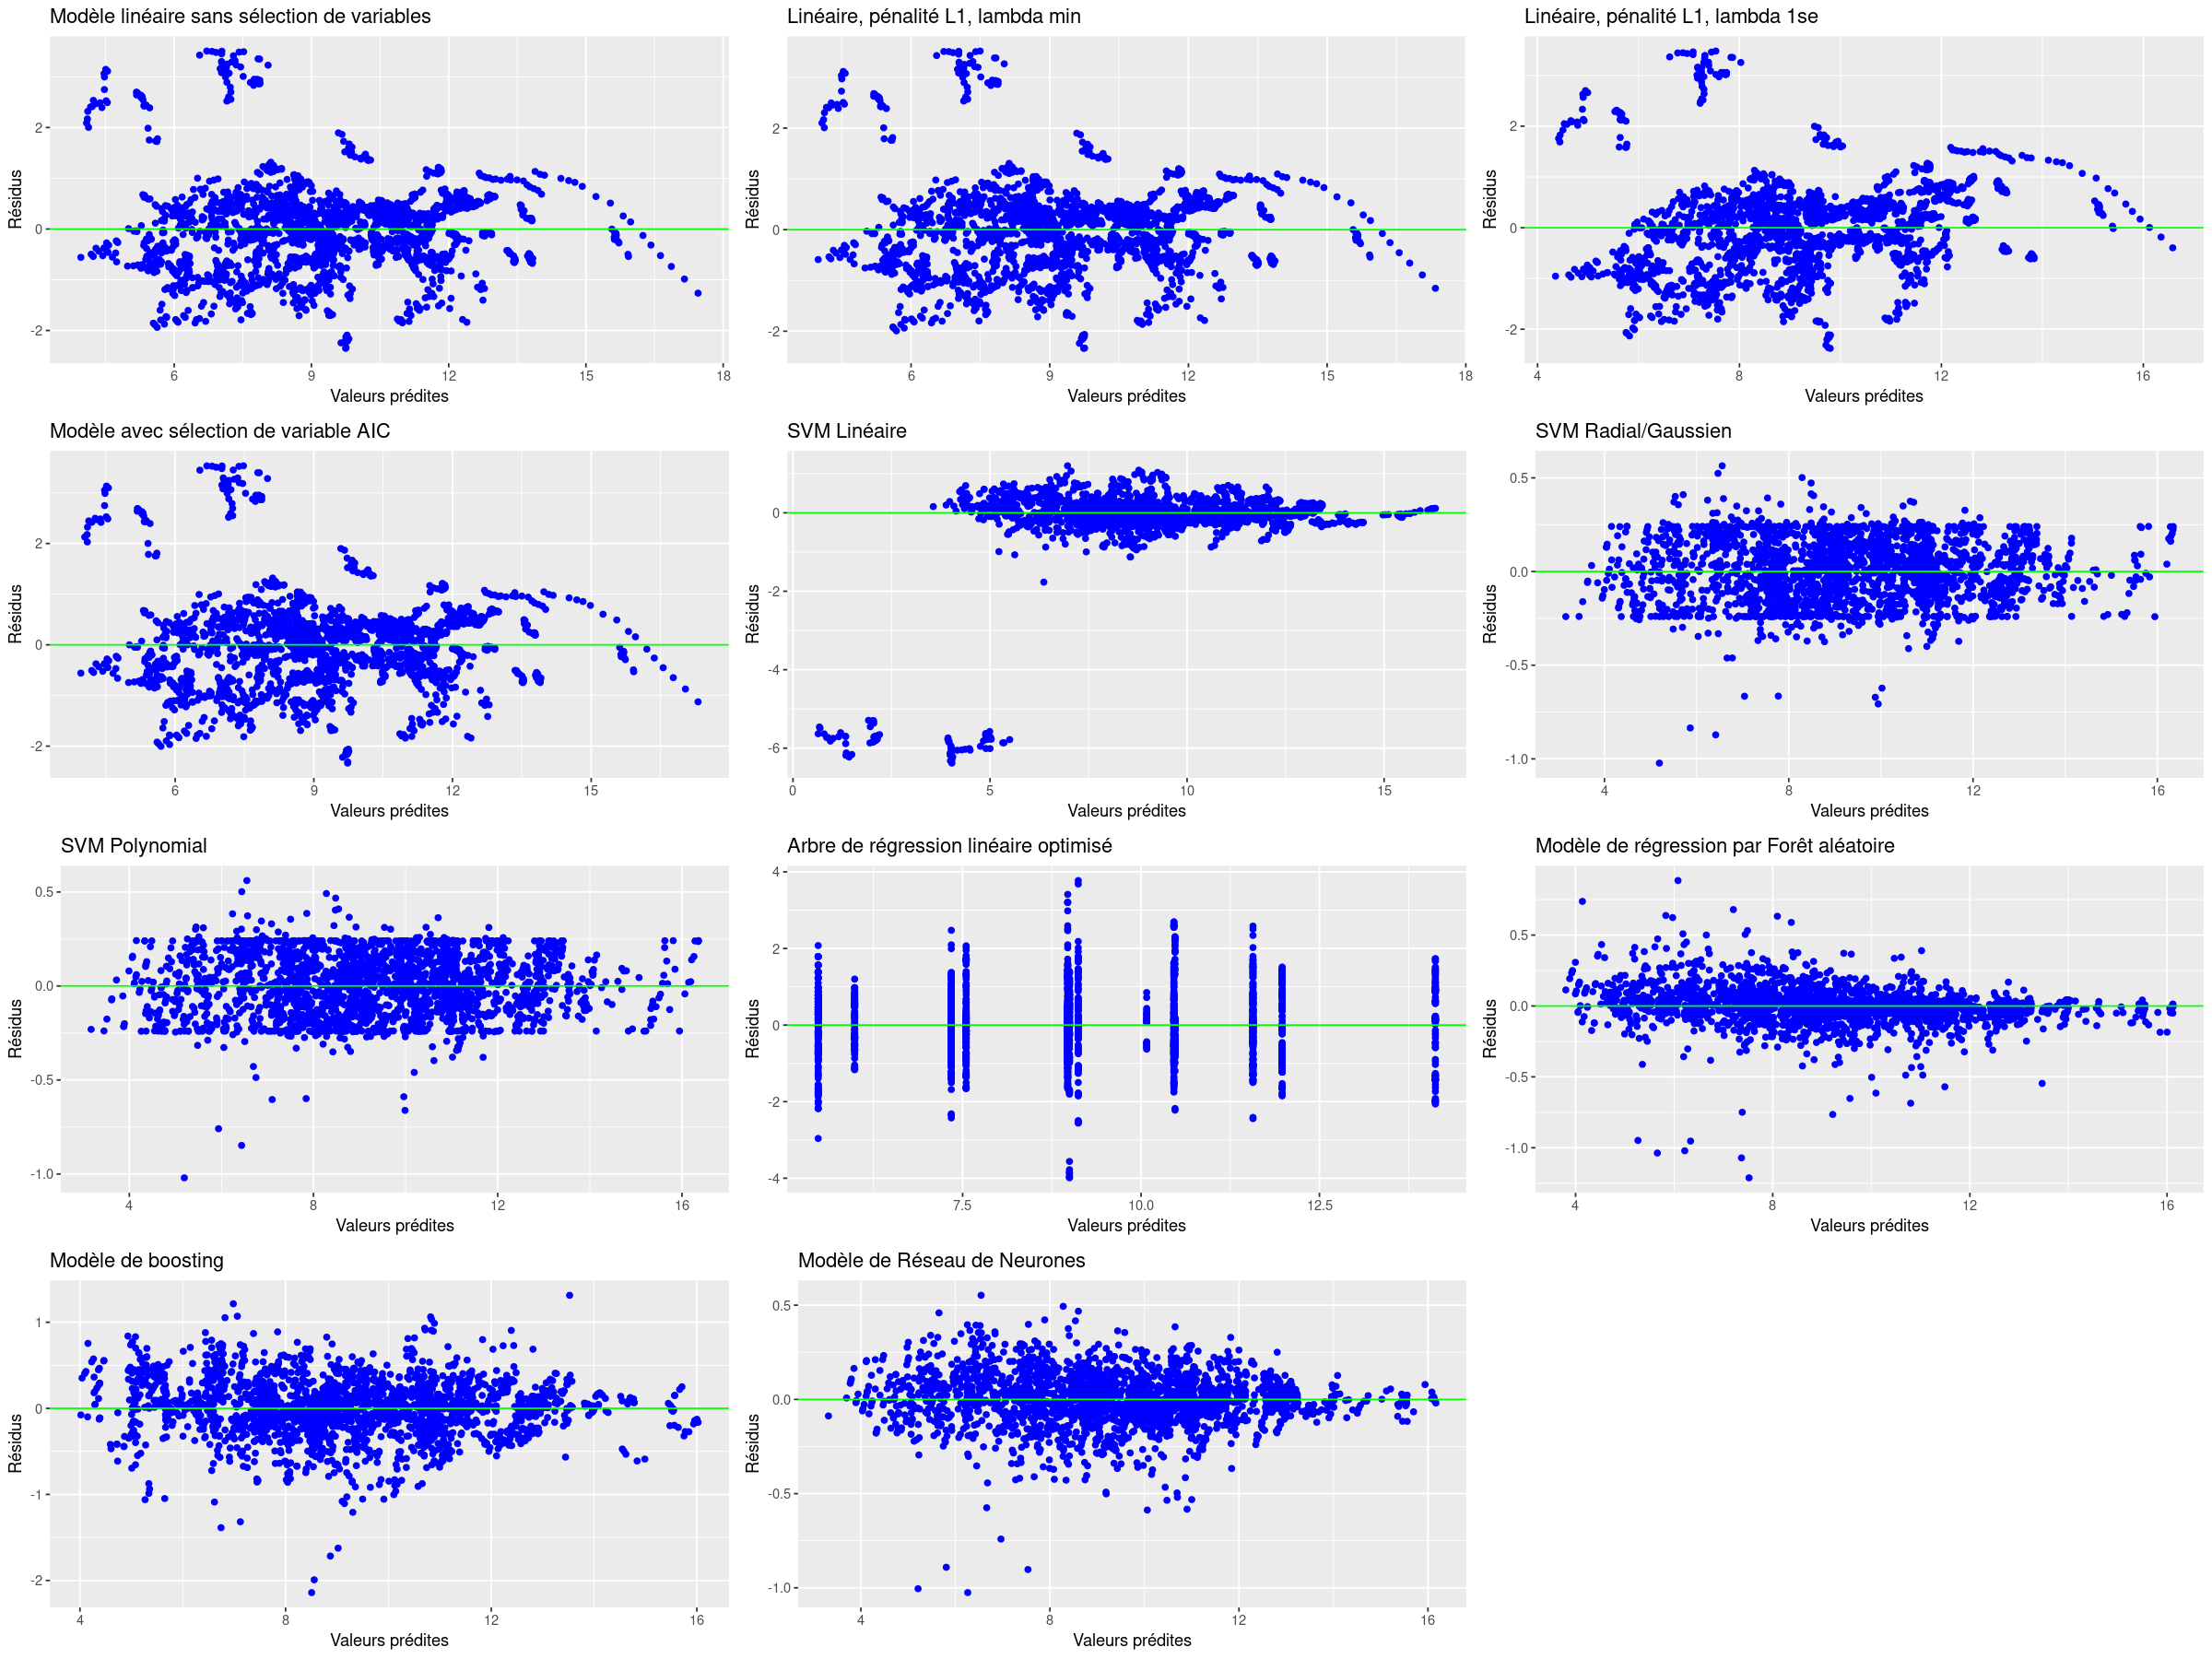

In [76]:
#modèle de régréssion linéaire simple
plot1 <- gplot.res(fit2,res2,"Modèle linéaire sans sélection de variables")
#modèle linéaire avec pénalisation Lasso
plot2 <-gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
plot3 <-gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 
# Modèle de régression linéaire par sélection de variables par critère AIC
plot4 <-gplot.res(fit.AIC,res.AIC,"Modèle avec sélection de variable AIC")
#SVM
plot5 <-gplot.res(fit_lin,res_lin,"SVM Linéaire")
plot5.1 <-gplot.res(fit_rad,res_rad,"SVM Radial/Gaussien")
plot5.2 <-gplot.res(fit_poly,res_poly,"SVM Polynomial")
#Arbre de régression : forme particulière car prédiction constante par morceaux
plot6 <-gplot.res(fit.tree,res.tree,"Arbre de régression linéaire optimisé")
#Forêt aléatoire
plot7 <-gplot.res(fit.rfr,res.rfr,titre="Modèle de régression par Forêt aléatoire")
#Boosting
plot8 <-gplot.res(fit.boost,res.boost,titre="Modèle de boosting")
#Réseau de neurones
plot9 <-gplot.res(fit.nnetOpt,res.nnetOpt,titre="Modèle de Réseau de Neurones")

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot5.1, plot5.2, plot6, plot7, plot8, plot9, ncol=3)

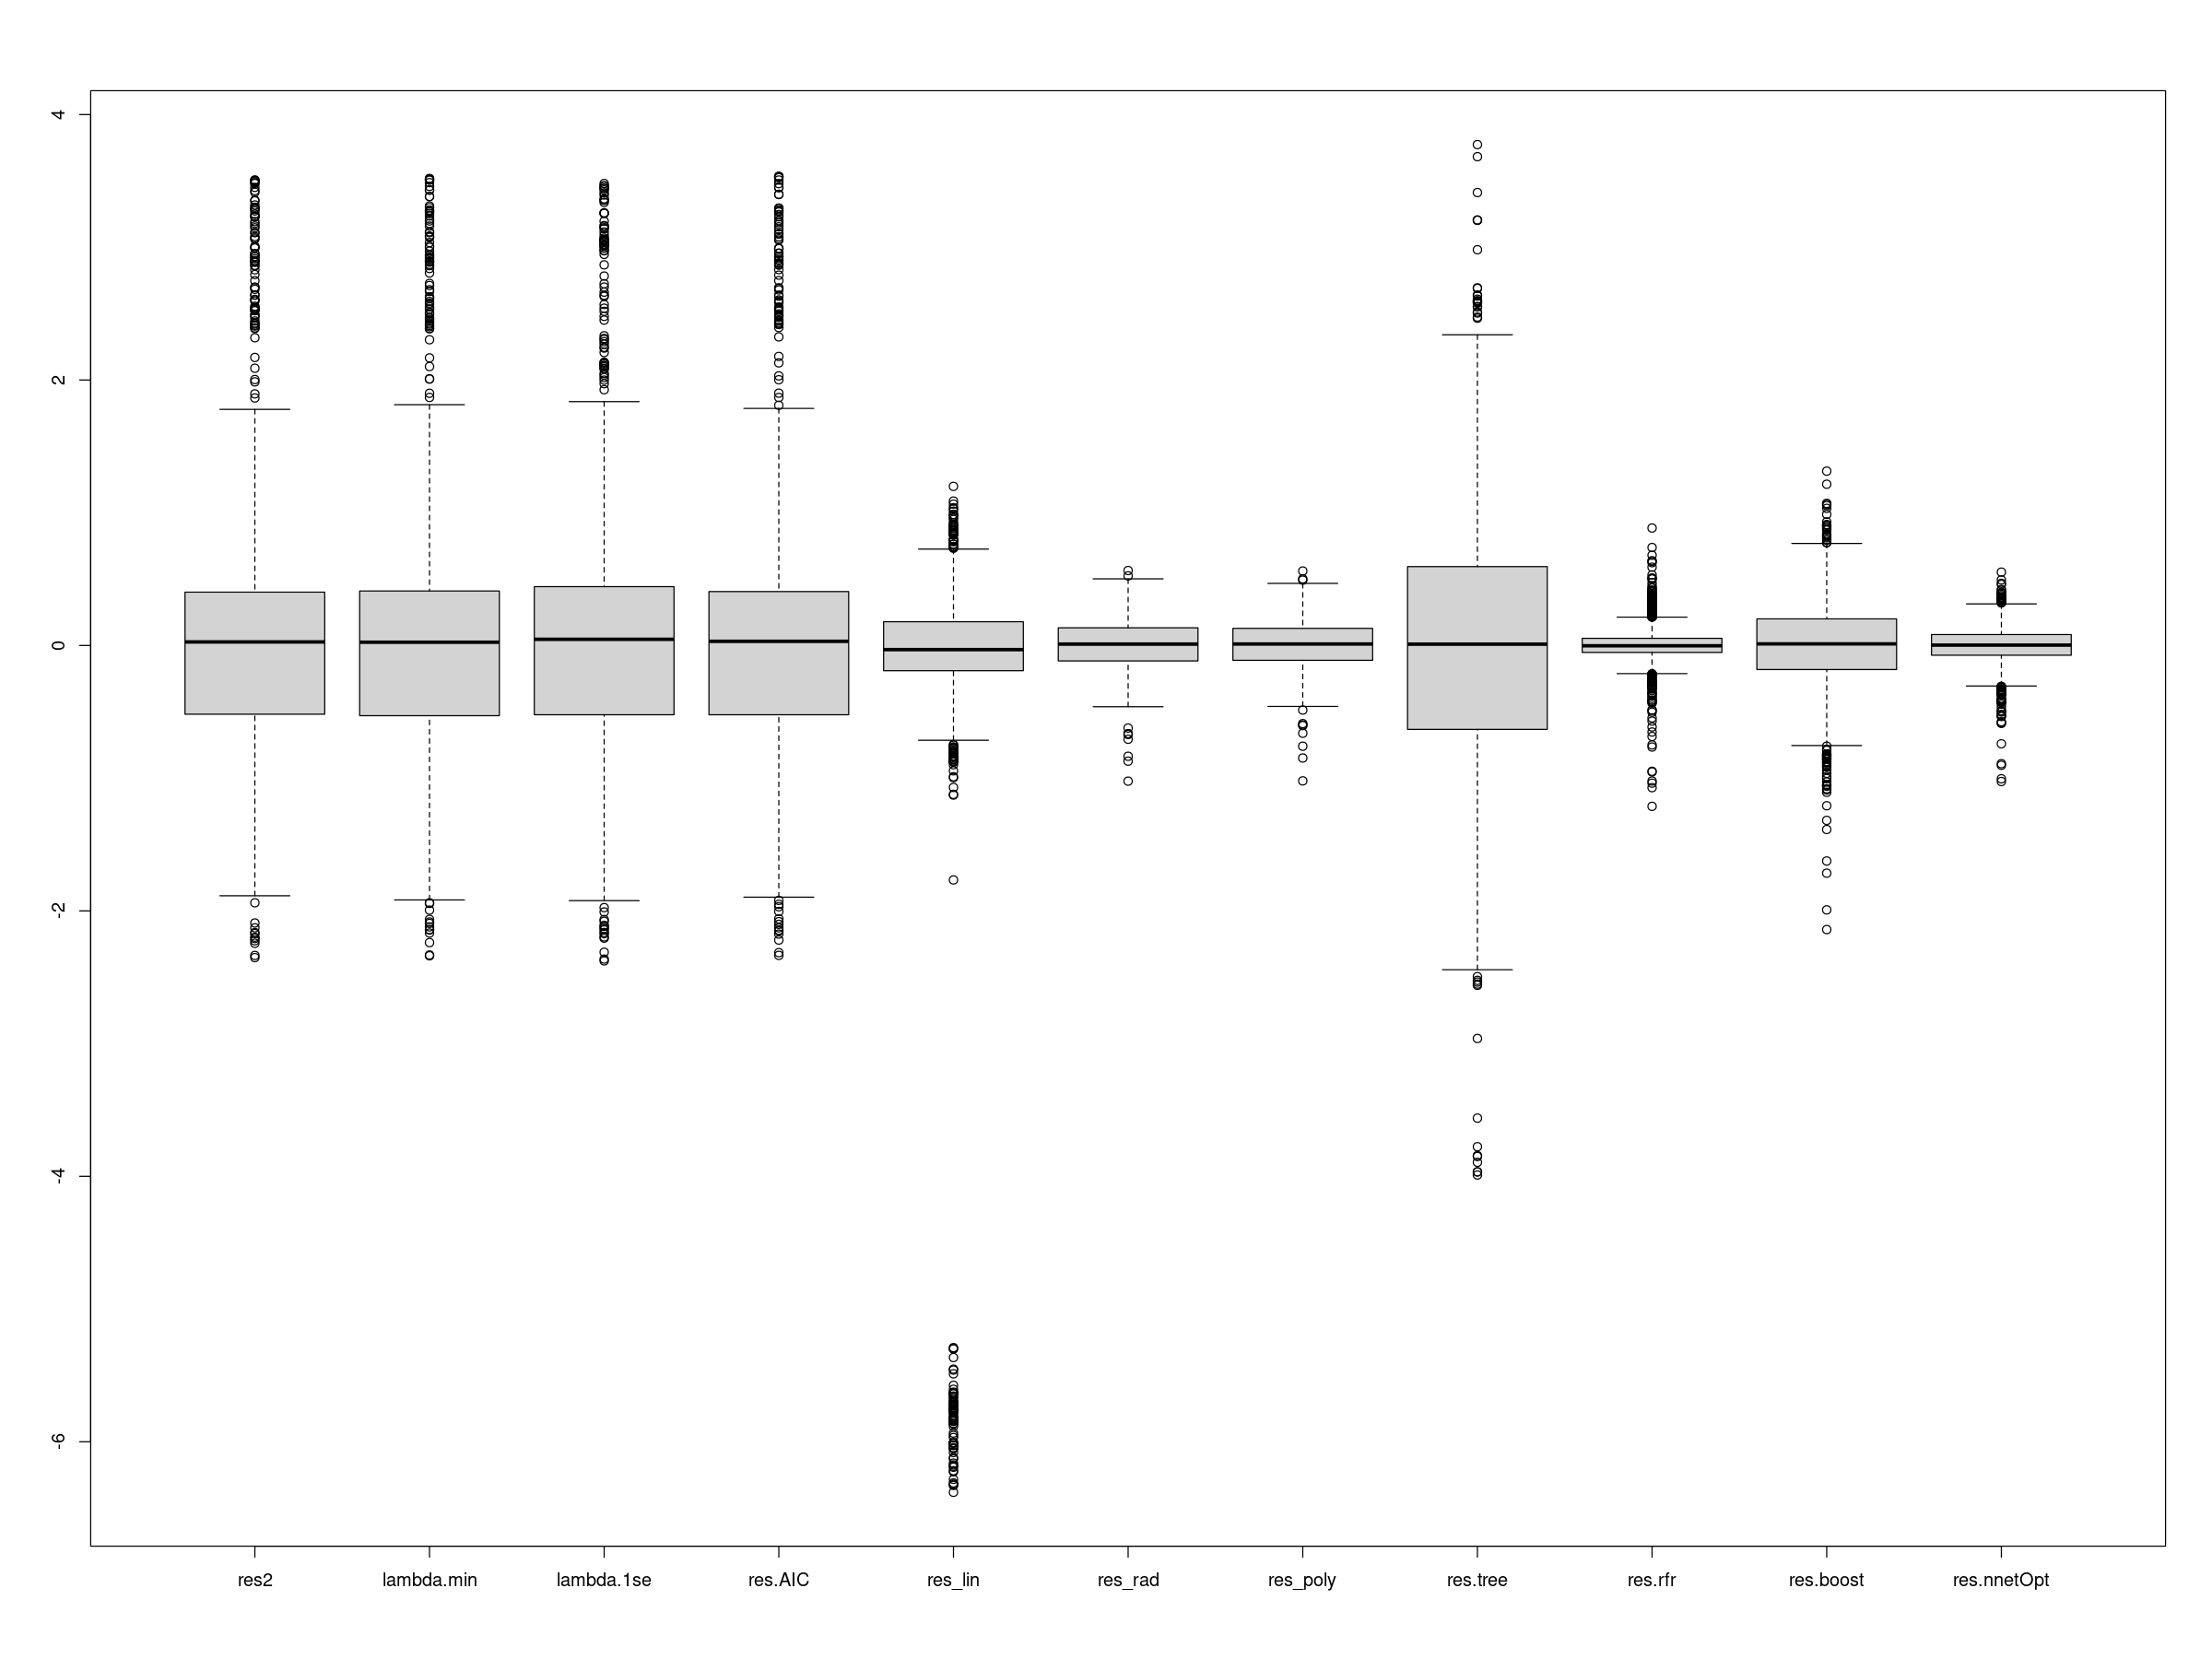

In [77]:
residus <- data.frame(res2, res.lasso, res.lasso.1se, res.AIC, res_lin, res_rad, res_poly,
                      res.tree, res.rfr, res.boost, res.nnetOpt)
boxplot(residus)

Ainsi, on observe que nos trois meilleurs modèles sont : Random Forest, suivi du réseau de neurones, et enfin SVM avec noyau polynomial (cf MSE)

Critère MSE des différents modèles

In [78]:
paste("Modèle linéaire sans sélection:",mean(res2^2))
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))
paste("Sélection de variables par critère AIC" , mean(res.AIC^2))
paste("SVM Linéaire:", mean(res_lin^2))
paste("SVM Radial/Gaussien:", mean(res_rad^2))
paste("SVM Polynomial:", mean(res_poly^2))
paste("Modèle par arbre de régression:", mean(res.tree^2))
paste("Modèle pour forêt aléatoire:", mean(res.rfr^2))
paste("Modèle de boosting:", mean(res.boost^2))
paste("Réseau de neurones:", mean(res.nnetOpt^2))

[1] "Modèle linéaire sans sélection: 0.715522110725379"

[1] "LASSO avec lambda.min: 0.716206608582131"

[1] "LASSO avec lambda.1se: 0.760723148121978"

[1] "Sélection de variables par critère AIC 0.716163339921715"

[1] "SVM Linéaire: 1.2654843585143"

[1] "SVM Radial/Gaussien: 0.0272531595982901"

[1] "SVM Polynomial: 0.0255761797798161"

[1] "Modèle par arbre de régression: 0.889151674161978"

[1] "Modèle pour forêt aléatoire: 0.0187257725295246"

[1] "Modèle de boosting: 0.11183368043573"

[1] "Réseau de neurones: 0.0199492242388929"

# Prédiction des modèles

## Modèle de régression linéaire

### Modèle de régression linéaire sans pénalisation

Prévision de l'échantillonage test

In [79]:
pred.reg <- predict(reg.log, newdata = scaled_test)

res.pred.reg <- pred.reg - scaled_test$log_Value_co2_emissions_kt_by_country

### Modèle de régression linéaire avec pénalisation LASSO

Prévision de l'échantillonage test

In [80]:
pred.regLasso <- predict(regLassOpt, s = "lambda.min", newx = test_log.mat)

res.pred.regLasso <- pred.regLasso - scaled_test$log_Value_co2_emissions_kt_by_country

pred.regLasso.1se <- predict(regLassOpt, s = "lambda.1se", newx = test_log.mat)

res.pred.regLasso.1se <- pred.regLasso.1se - scaled_test$log_Value_co2_emissions_kt_by_country

### Sélection de variables par critère AIC

Prévision de l'échantillonage test

In [81]:
pred.regAIC <- predict(reg.AIC, newdata = scaled_test)

res.pred.regAIC <- pred.regAIC - scaled_test$log_Value_co2_emissions_kt_by_country

## Support Vector Machine

Prévision de l'échantillonage test

In [82]:
pred.svm_lin = predict(svm_lin, newdata = scaled_test)

res.pred.svm_lin <- pred.svm_lin - scaled_test$log_Value_co2_emissions_kt_by_country

pred.svm_rad = predict(svm_rad, newdata = scaled_test)

res.pred.svm_rad <- pred.svm_rad - scaled_test$log_Value_co2_emissions_kt_by_country

pred.svm_poly = predict(svm_poly, newdata = scaled_test)

res.pred.svm_poly <- pred.svm_poly - scaled_test$log_Value_co2_emissions_kt_by_country

## Arbre de régression

Prévision de l'échantillonage test

In [83]:
pred.treer=predict(treeOpt, newdata=Test_log_renom)

res.pred.treer <- pred.treer - scaled_test$log_Value_co2_emissions_kt_by_country

## Forêt aléatoire

Prédiction du modèle

In [84]:
pred.rf = predict(random_forestOpt , newdata=scaled_test)
#random_forestOpt$test$predicted

res.pred.rf <- pred.rf - scaled_test$log_Value_co2_emissions_kt_by_country

## Boosting

Prédiction du modèle

In [85]:
pred.boostr=predict(boost.reg, newdata=scaled_test, n.trees=best.iter)

res.pred.boostr <- pred.boostr - scaled_test$log_Value_co2_emissions_kt_by_country

## Réseaux de neurones

Prédiction du modèle

In [86]:
pred.nnetOpt=predict(nnetOpt,newdata=scaled_test)

res.pred.nnetOpt <- pred.nnetOpt - scaled_test$log_Value_co2_emissions_kt_by_country

## COMPARAISON DES MODELES

On affiche ci-dessous les erreurs de prévision moyenne

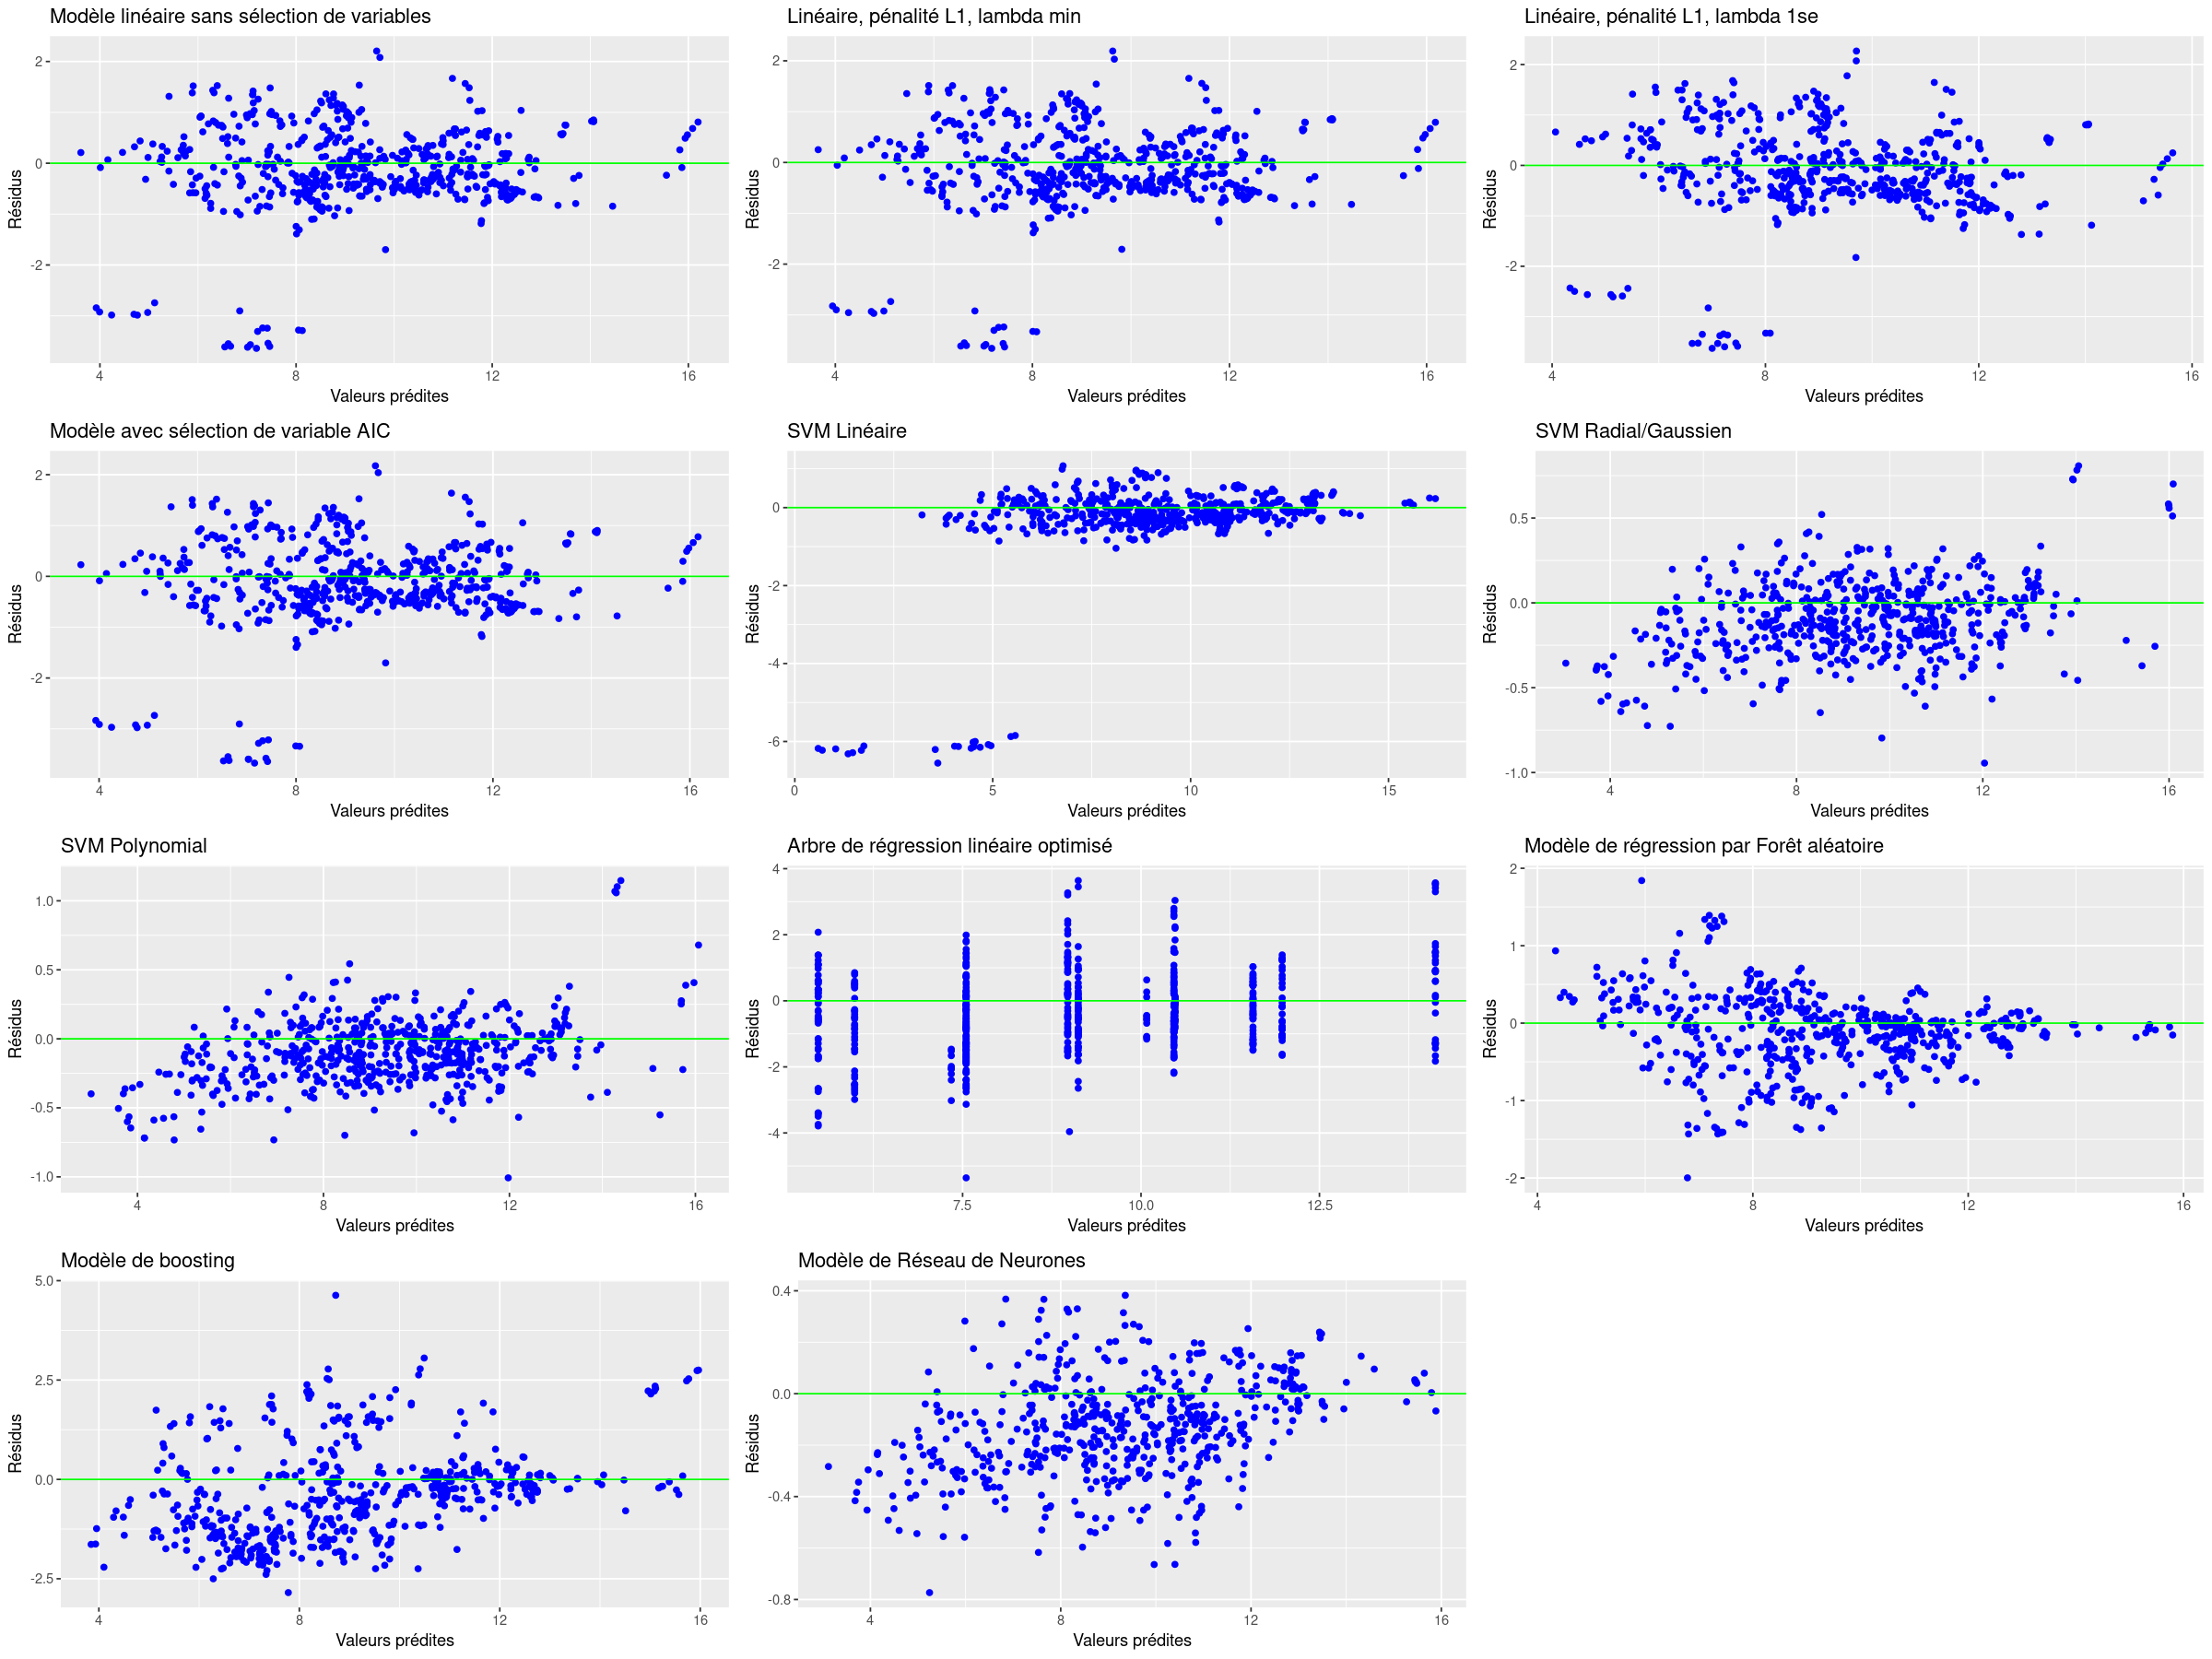

In [87]:
#modèle de régréssion linéaire simple
plot1 <- gplot.res(pred.reg,res.pred.reg,"Modèle linéaire sans sélection de variables")
#modèle linéaire avec pénalisation Lasso
plot2 <-gplot.res(pred.regLasso, res.pred.regLasso, "Linéaire, pénalité L1, lambda min")
plot3 <-gplot.res(pred.regLasso.1se, res.pred.regLasso.1se, "Linéaire, pénalité L1, lambda 1se") 
# Modèle de régression linéaire par sélection de variables par critère AIC
plot4 <-gplot.res(pred.regAIC,res.pred.regAIC,"Modèle avec sélection de variable AIC")
#SVM
plot5 <-gplot.res(pred.svm_lin,res.pred.svm_lin,"SVM Linéaire")
plot5.1 <-gplot.res(pred.svm_rad,res.pred.svm_rad,"SVM Radial/Gaussien")
plot5.2 <-gplot.res(pred.svm_poly,res.pred.svm_poly,"SVM Polynomial")
#Arbre de régression : forme particulière car prédiction constante par morceaux
plot6 <-gplot.res(pred.treer,res.pred.treer,"Arbre de régression linéaire optimisé")
#Forêt aléatoire
plot7 <-gplot.res(pred.rf,res.pred.rf,titre="Modèle de régression par Forêt aléatoire")
#Boosting
plot8 <-gplot.res(pred.boostr,res.pred.boostr,titre="Modèle de boosting")
#Réseau de neurones
plot9 <-gplot.res(pred.nnetOpt,res.pred.nnetOpt,titre="Modèle de Réseau de Neurones")

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot5.1, plot5.2, plot6, plot7, plot8, plot9, ncol=3)

Voici les remarques que l'on peut faire sur les graphiques de résidus ci-dessous :

- Pour le modèle linéaire, le modèle avec pénalisation LASSO et le modèle linéaire séléctionné par critère AIC, les 4 graphiques de résidus ont la même forme et la même échelle.
- Les résultats obtenus avec le SVM linéaire sont surprenants. On obtient beaucoup d'individus qui semblent mal classés, avec un groupement d'individus en -6.
- Pour le SVM polynomial ainsi que gaussien, l'échelle des résidus n'est plus la même. En effet, le maximum de résidus atteint 1 et se produit pour des valeurs à prédire entre 6 et 8. Les résidus sont globalement plus ressérés autour de 0.
- Pour les 3 méthodes basées sur SVM, on ne voit pas clairement le phénomène du tube apparaître. Cela est un bon signe, nos modèles sont, à priori, pas sur-ajustés.
- Pour l'arbre de régression, on reconnait son graphe de résidus caractéristique. En effet, les résidus sont représentés sur des lignes verticales car pour une entrée X, un arbre ne peut prédire qu'un nombre fini de sorti Y, correspondant à la moyenne des données d'entraînement sur la feuille finale. Dans notre cas, l'arbre de prédiction ne semble pas performant, avec des résidus allant jusqu'à 4.
- Pour Random Forest, les résidus ressemblent de près à ceux du modèle SVM polynomial, avec des résidus concentrés entre -0.25 et 0.25, et un pic montant jusqu'à 2.
- Les résultats du boosting semblent aller dans le sens d'un modèle sur-ajusté. En effet, son ajustement était particulièrement bon mais sa généralisation se rapproche des autres modèles.
- Pour le réseau de neurones, on obtient ce qui semble être le meilleur graphe des résidus. L'échelle va de -0.8 à 0.4, avec des valeurs relativement ressérées en 0.

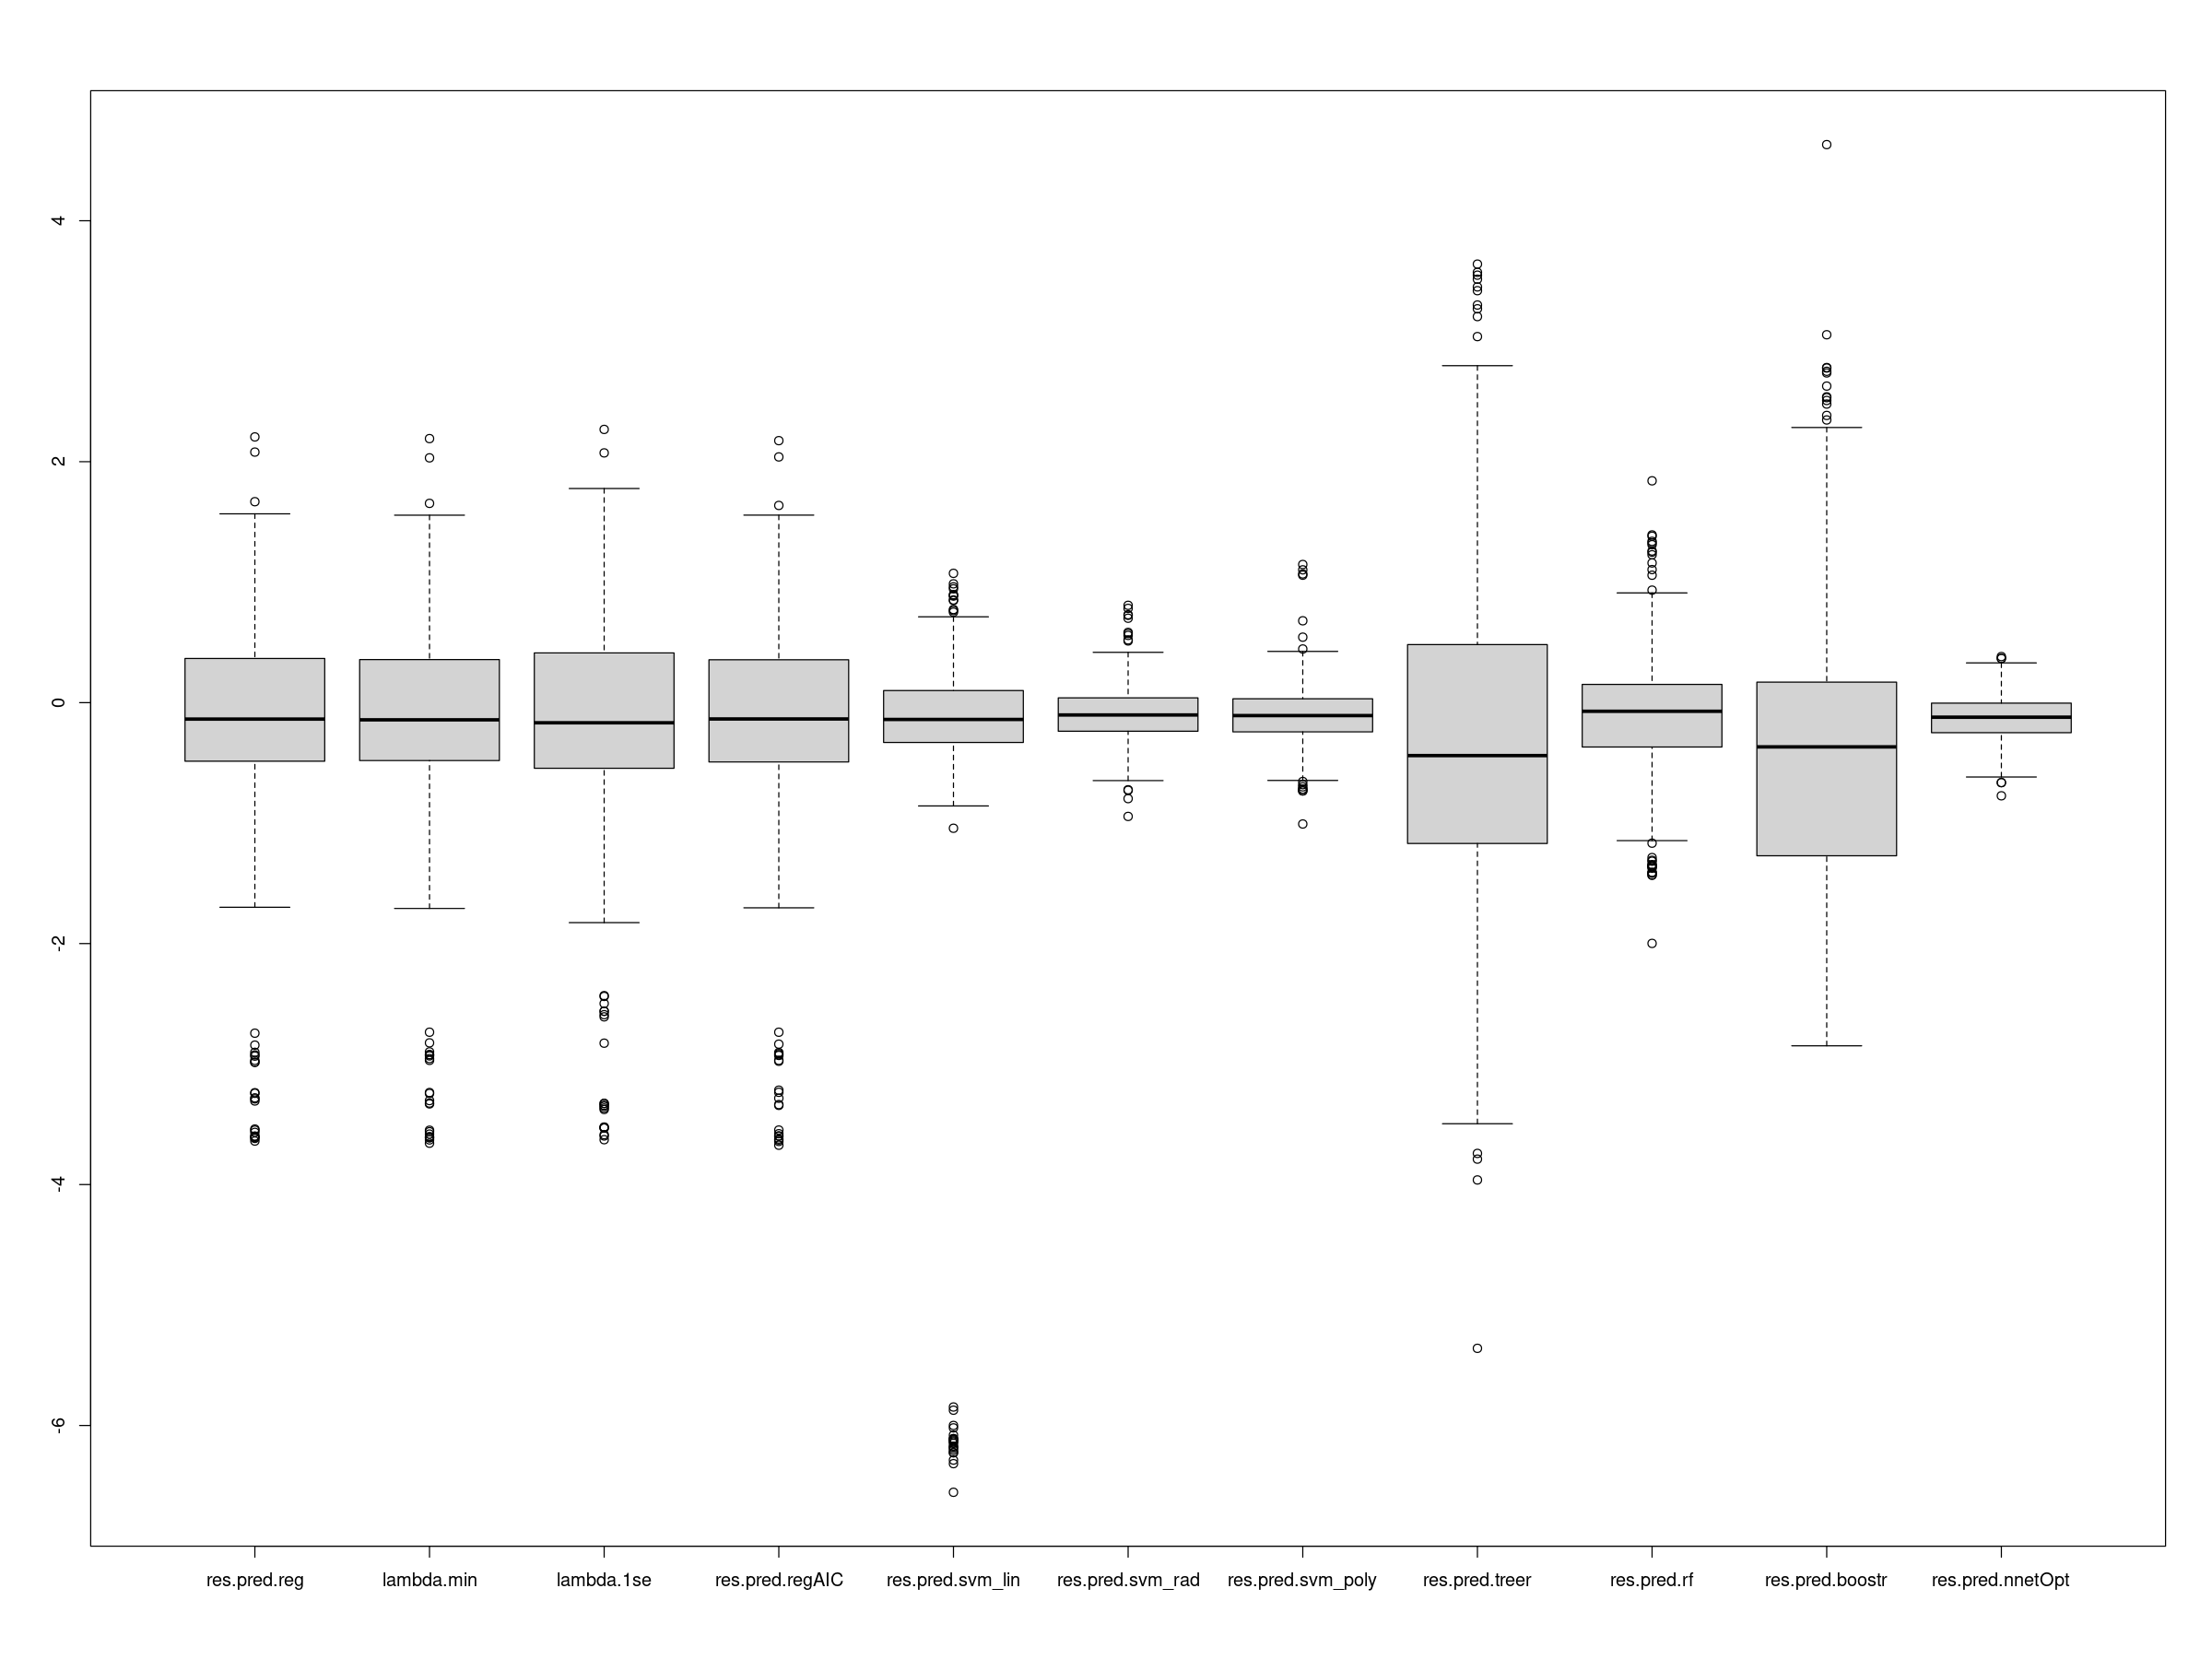

In [88]:
residus_generalisation <- data.frame(res.pred.reg, res.pred.regLasso, res.pred.regLasso.1se, 
                                     res.pred.regAIC, res.pred.svm_lin, res.pred.svm_rad, res.pred.svm_poly,
                                     res.pred.treer, res.pred.rf, res.pred.boostr, res.pred.nnetOpt)

boxplot(residus_generalisation)

Pour conclure, à la vue des erreurs de généralisation et des graphiques de résidus, les modèles qui semblent les plus performants semblent être le SVM polynomial/gaussien, le Random Forest et le Réseau de Neurones. Par souci de cohérence avec le notebook python, on étudiera le SVM polynomial.

In [89]:
#Modèle de régression linéaire
print("----- Modèle de régression linéaire -----")
sum((pred.reg - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
#Modèle de régression linéaire avec pénalisation LASSO
print("----- Modèle de régression linéaire avec pénalisation LASSO, lambda min et lambda 1se -----")
sum((pred.regLasso - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
sum((pred.regLasso.1se - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
#Modèle de régression linéaire avec sélection de variable par critère AIC
print("----- Modèle de régression linéaire avec sélection de variables par critère AIC-----")
sum((pred.regAIC - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
#SVM
print("----- Modèles SVM : Linéaire, Radial, puis Polynomial -----")
sum((pred.svm_lin - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
sum((pred.svm_rad - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
sum((pred.svm_poly - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)
#Modèle de l'arbre de régression
print("----- Arbre de régression -----")
sum((pred.treer-Test_log_renom$Log_CO2_emissions)^2)/nrow(Test_log_renom)
#Modèle de forêt aléatoire
print("----- Modèle random forest -----")
sum((pred.rf-scaled_test$log_Value_co2_emissions_kt_by_country)^2)/nrow(scaled_test)
#Boosting
print("----- Gradient Boosting -----")
sum((pred.boostr-scaled_test$log_Value_co2_emissions_kt_by_country)^2)/nrow(scaled_test)
#Réseau de neurones
print("----- Réseau de neurones -----")
sum((pred.nnetOpt-scaled_test$log_Value_co2_emissions_kt_by_country)^2)/nrow(scaled_test)

[1] "----- Modèle de régression linéaire -----"


[1] 0.7544695

[1] "----- Modèle de régression linéaire avec pénalisation LASSO, lambda min et lambda 1se -----"


[1] 0.7586174

[1] 0.7874609

[1] "----- Modèle de régression linéaire avec sélection de variables par critère AIC-----"


[1] 0.7590295

[1] "----- Modèles SVM : Linéaire, Radial, puis Polynomial -----"


[1] 1.495159

[1] 0.06120323

[1] 0.06545546

[1] "----- Arbre de régression -----"


[1] 1.747899

[1] "----- Modèle random forest -----"


[1] 0.2451424

[1] "----- Gradient Boosting -----"


[1] 1.463299

[1] "----- Réseau de neurones -----"


[1] 0.05321228

De même que précédemment, on observe que les meilleurs modèles sont le réseau de neurones, SVM (noyau Gaussien puis Polynomial), et enfin random forest. 

# Complétion des données manquantes :

In [90]:
path <- ""
df_na <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", dec="." ,header = TRUE)

df_na[,"Year"] <- as.factor(df_na[,"Year"])
df_na[,"Entity"] <- as.factor(df_na[,"Entity"])
df_na[,"Density.P.Km2."] <- as.numeric(gsub(",",".",(df_na[,"Density.P.Km2."])))

df_na <- df_na %>% mutate(log_Primary.energy.consumption.per.capita..kWh.person. = log(Primary.energy.consumption.per.capita..kWh.person.),
                    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.),
                    log_gdp_per_capita = log(gdp_per_capita),
                    log_Value_co2_emissions_kt_by_country = log(Value_co2_emissions_kt_by_country),
                    log_Density.P.Km2. = log(Density.P.Km2.),
                    log_Land.Area.Km2. = log(Land.Area.Km2.))

df_na

Entity      Year Access.to.electricity....of.population.
1    Afghanistan 2000   1.613591                             
2    Afghanistan 2001   4.074574                             
3    Afghanistan 2002   9.409158                             
4    Afghanistan 2003  14.738506                             
5    Afghanistan 2004  20.064968                             
6    Afghanistan 2005  25.390894                             
7    Afghanistan 2006  30.718690                             
8    Afghanistan 2007  36.051010                             
9    Afghanistan 2008  42.400000                             
10   Afghanistan 2009  46.740050                             
11   Afghanistan 2010  42.700000                             
12   Afghanistan 2011  43.222020                             
13   Afghanistan 2012  69.100000                             
14   Afghanistan 2013  68.290650                             
15   Afghanistan 2014  89.500000                             
16   Afghanistan 2015  71.500000                             
17   Afghanistan 2016  97.700000                             
18   Afghanistan 2017  97.700000                             
19   Afghanistan 2018  96.616135                             
20   Afghanistan 2019  97.700000                             
21   Afghanistan 2020  97.700000                             
22   Albania     2000 100.000000                             
23   Albania     2001 100.000000                             
24   Albania     2002 100.000000                             
25   Albania     2003 100.000000                             
26   Albania     2004 100.000000                             
27   Albania     2005 100.000000                             
28   Albania     2006 100.000000                             
29   Albania     2007 100.000000                             
30   Albania     2008 100.000000                             
⋮    ⋮           ⋮    ⋮                                      
3620 Zambia      2012 29.01273                               
3621 Zambia      2013 29.88627                               
3622 Zambia      2014 27.90000                               
3623 Zambia      2015 31.10000                               
3624 Zambia      2016 35.42545                               
3625 Zambia      2017 40.30000                               
3626 Zambia      2018 40.31789                               
3627 Zambia      2019 43.00000                               
3628 Zambia      2020 44.52448                               
3629 Zimbabwe    2000 33.65489                               
3630 Zimbabwe    2001 34.17284                               
3631 Zimbabwe    2002 34.20000                               
3632 Zimbabwe    2003 35.18835                               
3633 Zimbabwe    2004 35.69060                               
3634 Zimbabwe    2005 36.19231                               
3635 Zimbabwe    2006 37.20000                               
3636 Zimbabwe    2007 37.20401                               
3637 Zimbabwe    2008 37.71934                               
3638 Zimbabwe    2009 43.36908                               
3639 Zimbabwe    2010 38.78255                               
3640 Zimbabwe    2011 36.90000                               
3641 Zimbabwe    2012 44.00000                               
3642 Zimbabwe    2013 40.49838                               
3643 Zimbabwe    2014 32.30000                               
3644 Zimbabwe    2015 33.70000                               
3645 Zimbabwe    2016 42.56173                               
3646 Zimbabwe    2017 44.17863                               
3647 Zimbabwe    2018 45.57265                               
3648 Zimbabwe    2019 46.78148                               
3649 Zimbabwe    2020 52.74767                               
     Access.to.clean.fuels.for.cooking
1     6.20                            
2     7.20                            
3     8.20                            
4    

Avant de commencer, il faut enlever les individus qui ont des valeurs NA dans la variable à prédire. Ensuite on peut diviser nos données en train et test et emchainer sur la complétion des données manquantes 

In [91]:
sum(is.na(df_na$log_Value_co2_emissions_kt_by_country))
df_na <- subset(df_na, !is.na(log_Value_co2_emissions_kt_by_country))
sum(is.na(df_na$log_Value_co2_emissions_kt_by_country))

[1] 428

[1] 0

In [92]:
summary(df_na)

                 Entity          Year     
 Afghanistan        :  20   2013   : 163  
 Albania            :  20   2014   : 163  
 Algeria            :  20   2015   : 163  
 Angola             :  20   2016   : 163  
 Antigua and Barbuda:  20   2007   : 162  
 Argentina          :  20   2008   : 162  
 (Other)            :3101   (Other):2245  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 56.592                         1st Qu.: 21.70                   
 Median : 97.900                         Median : 81.50                   
 Mean   : 78.009                         Mean   : 62.17                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
 NA's   :9                               NA's   :128                      
 Renewable.electricity.generating.capacity.per.capita
 M

On garde seulement les variables quantitatives pour comparer les différentes méthodes de complétion 

In [93]:
Xnaquanti=df_na[,-c(1,2)] #avec valeurs NA

Rappel de la proportion de valeur manquante dans notre dataframe df 

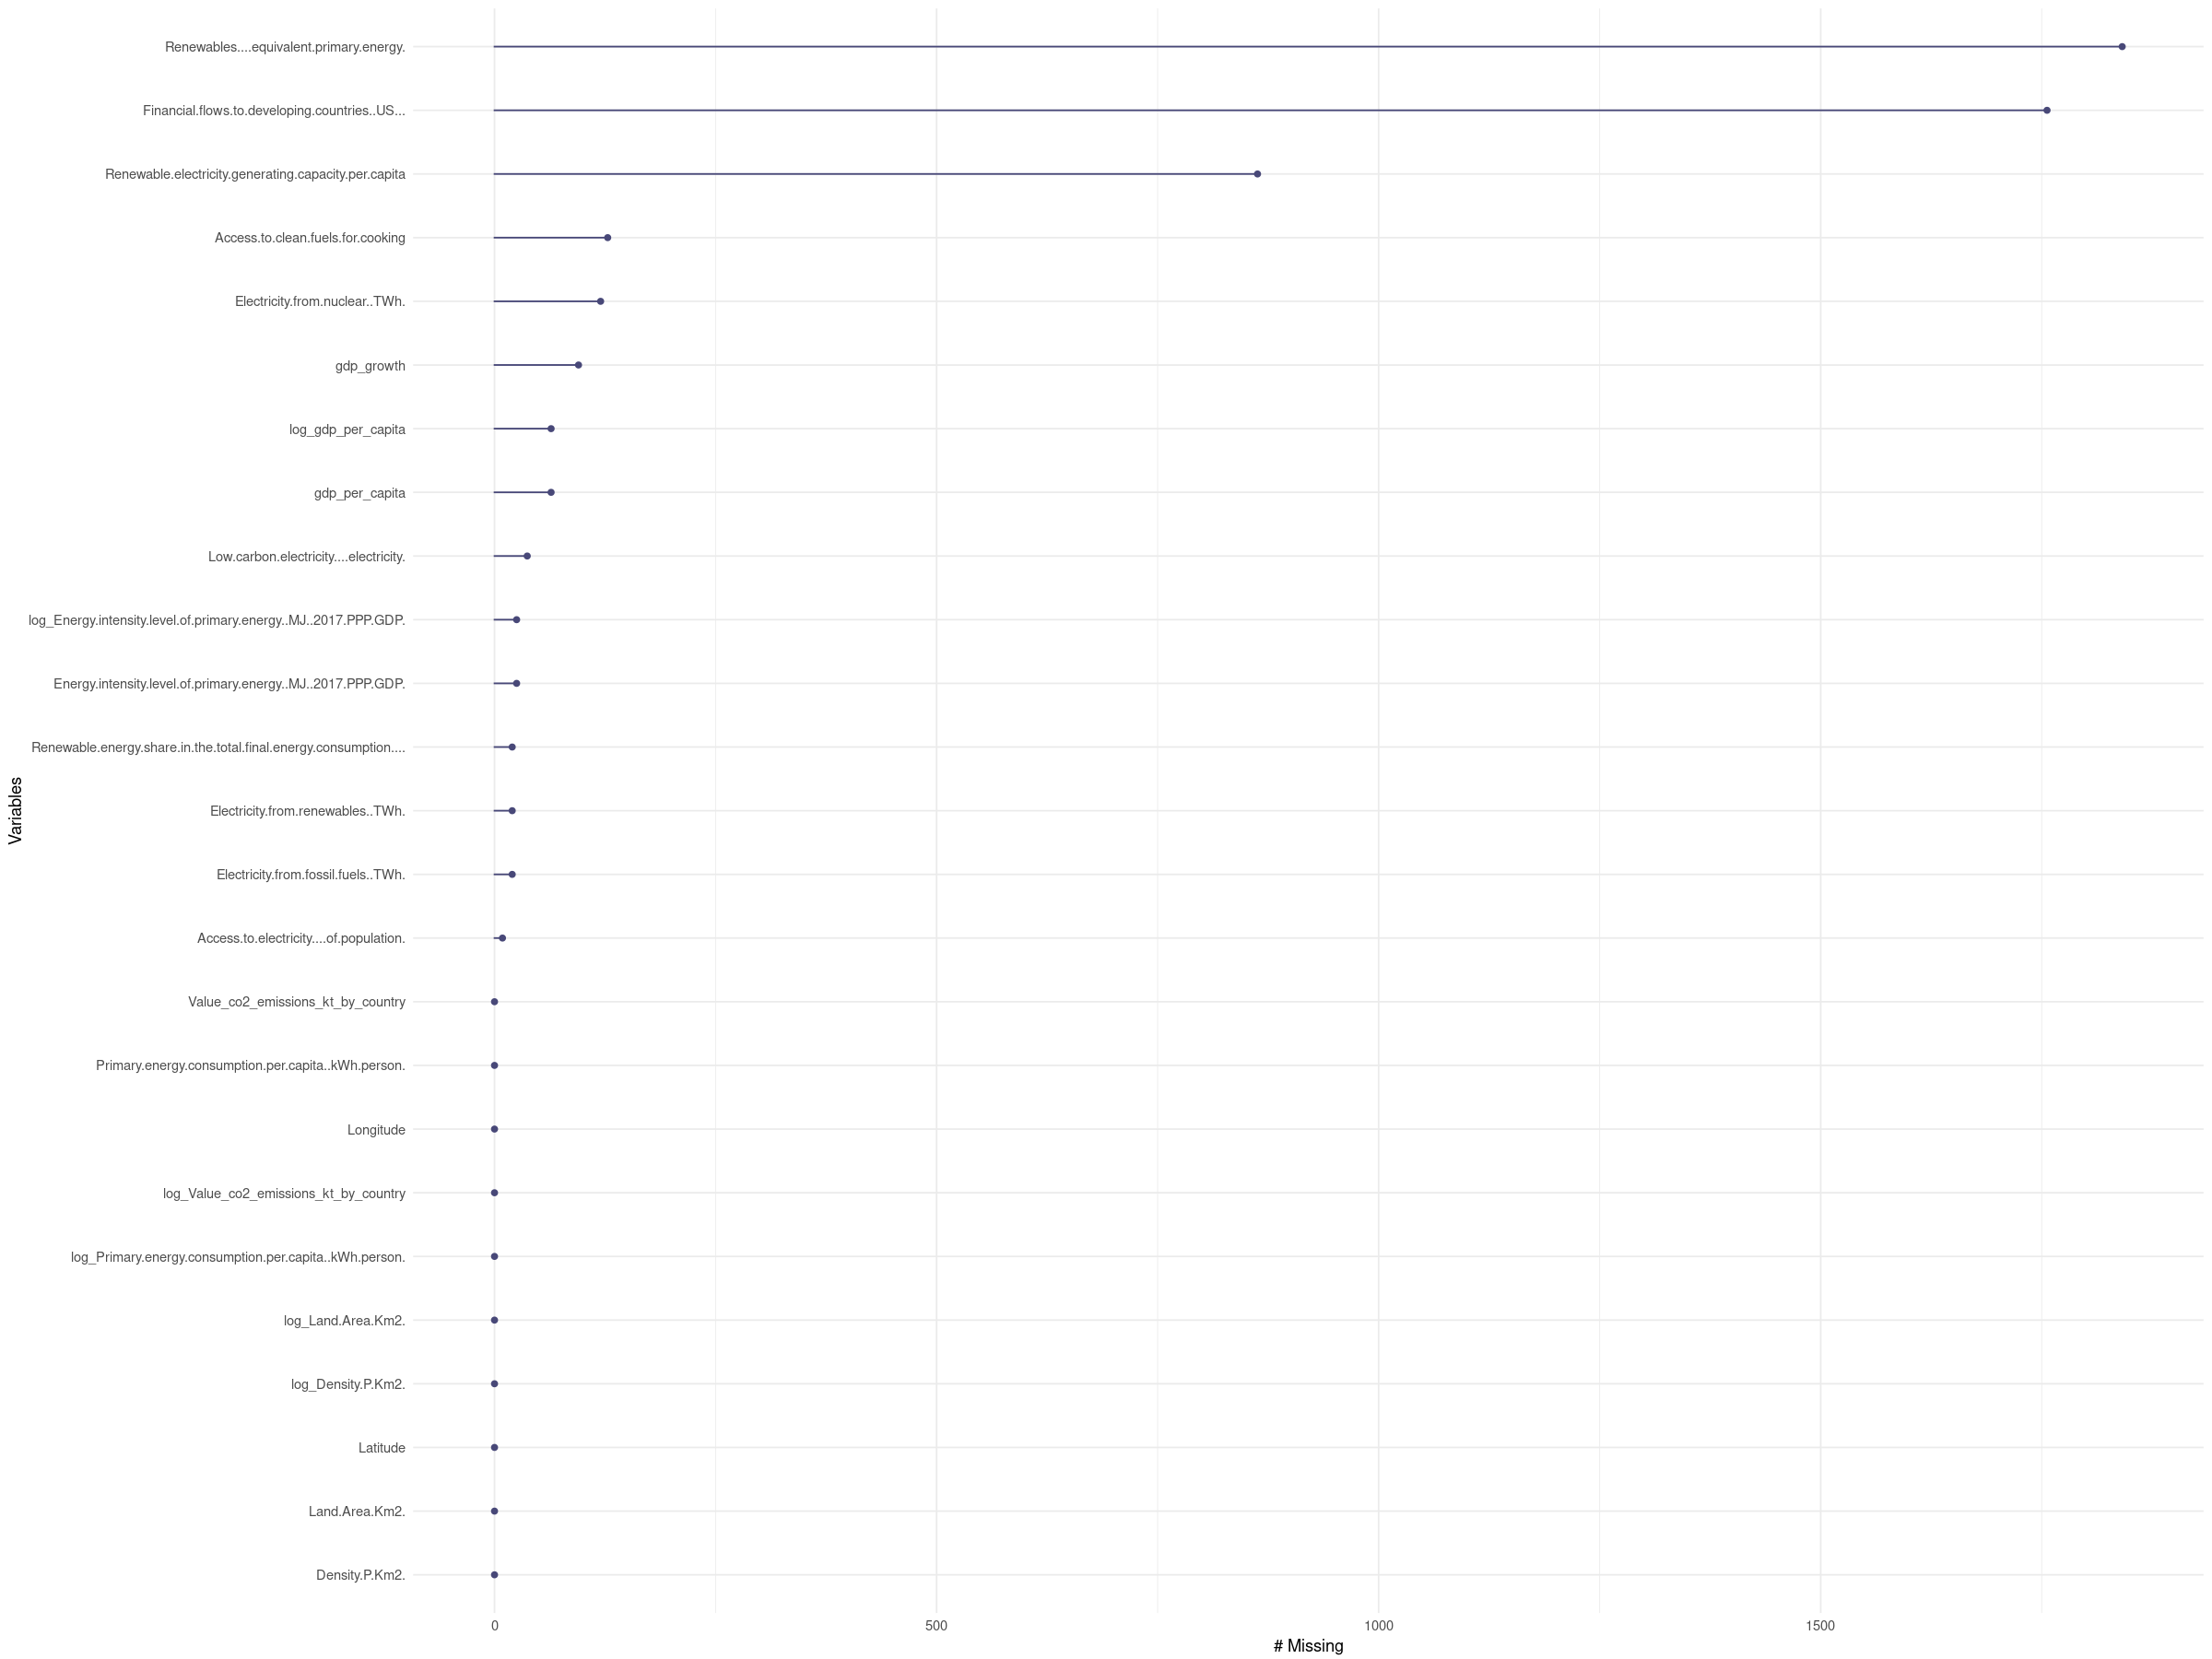

In [94]:
gg_miss_var(Xnaquanti)

On enlève également du dataframe les variables qui contiennent trop de valeurs manquantes, ce n'est pas intéressant de les compléter car on manque d'information.

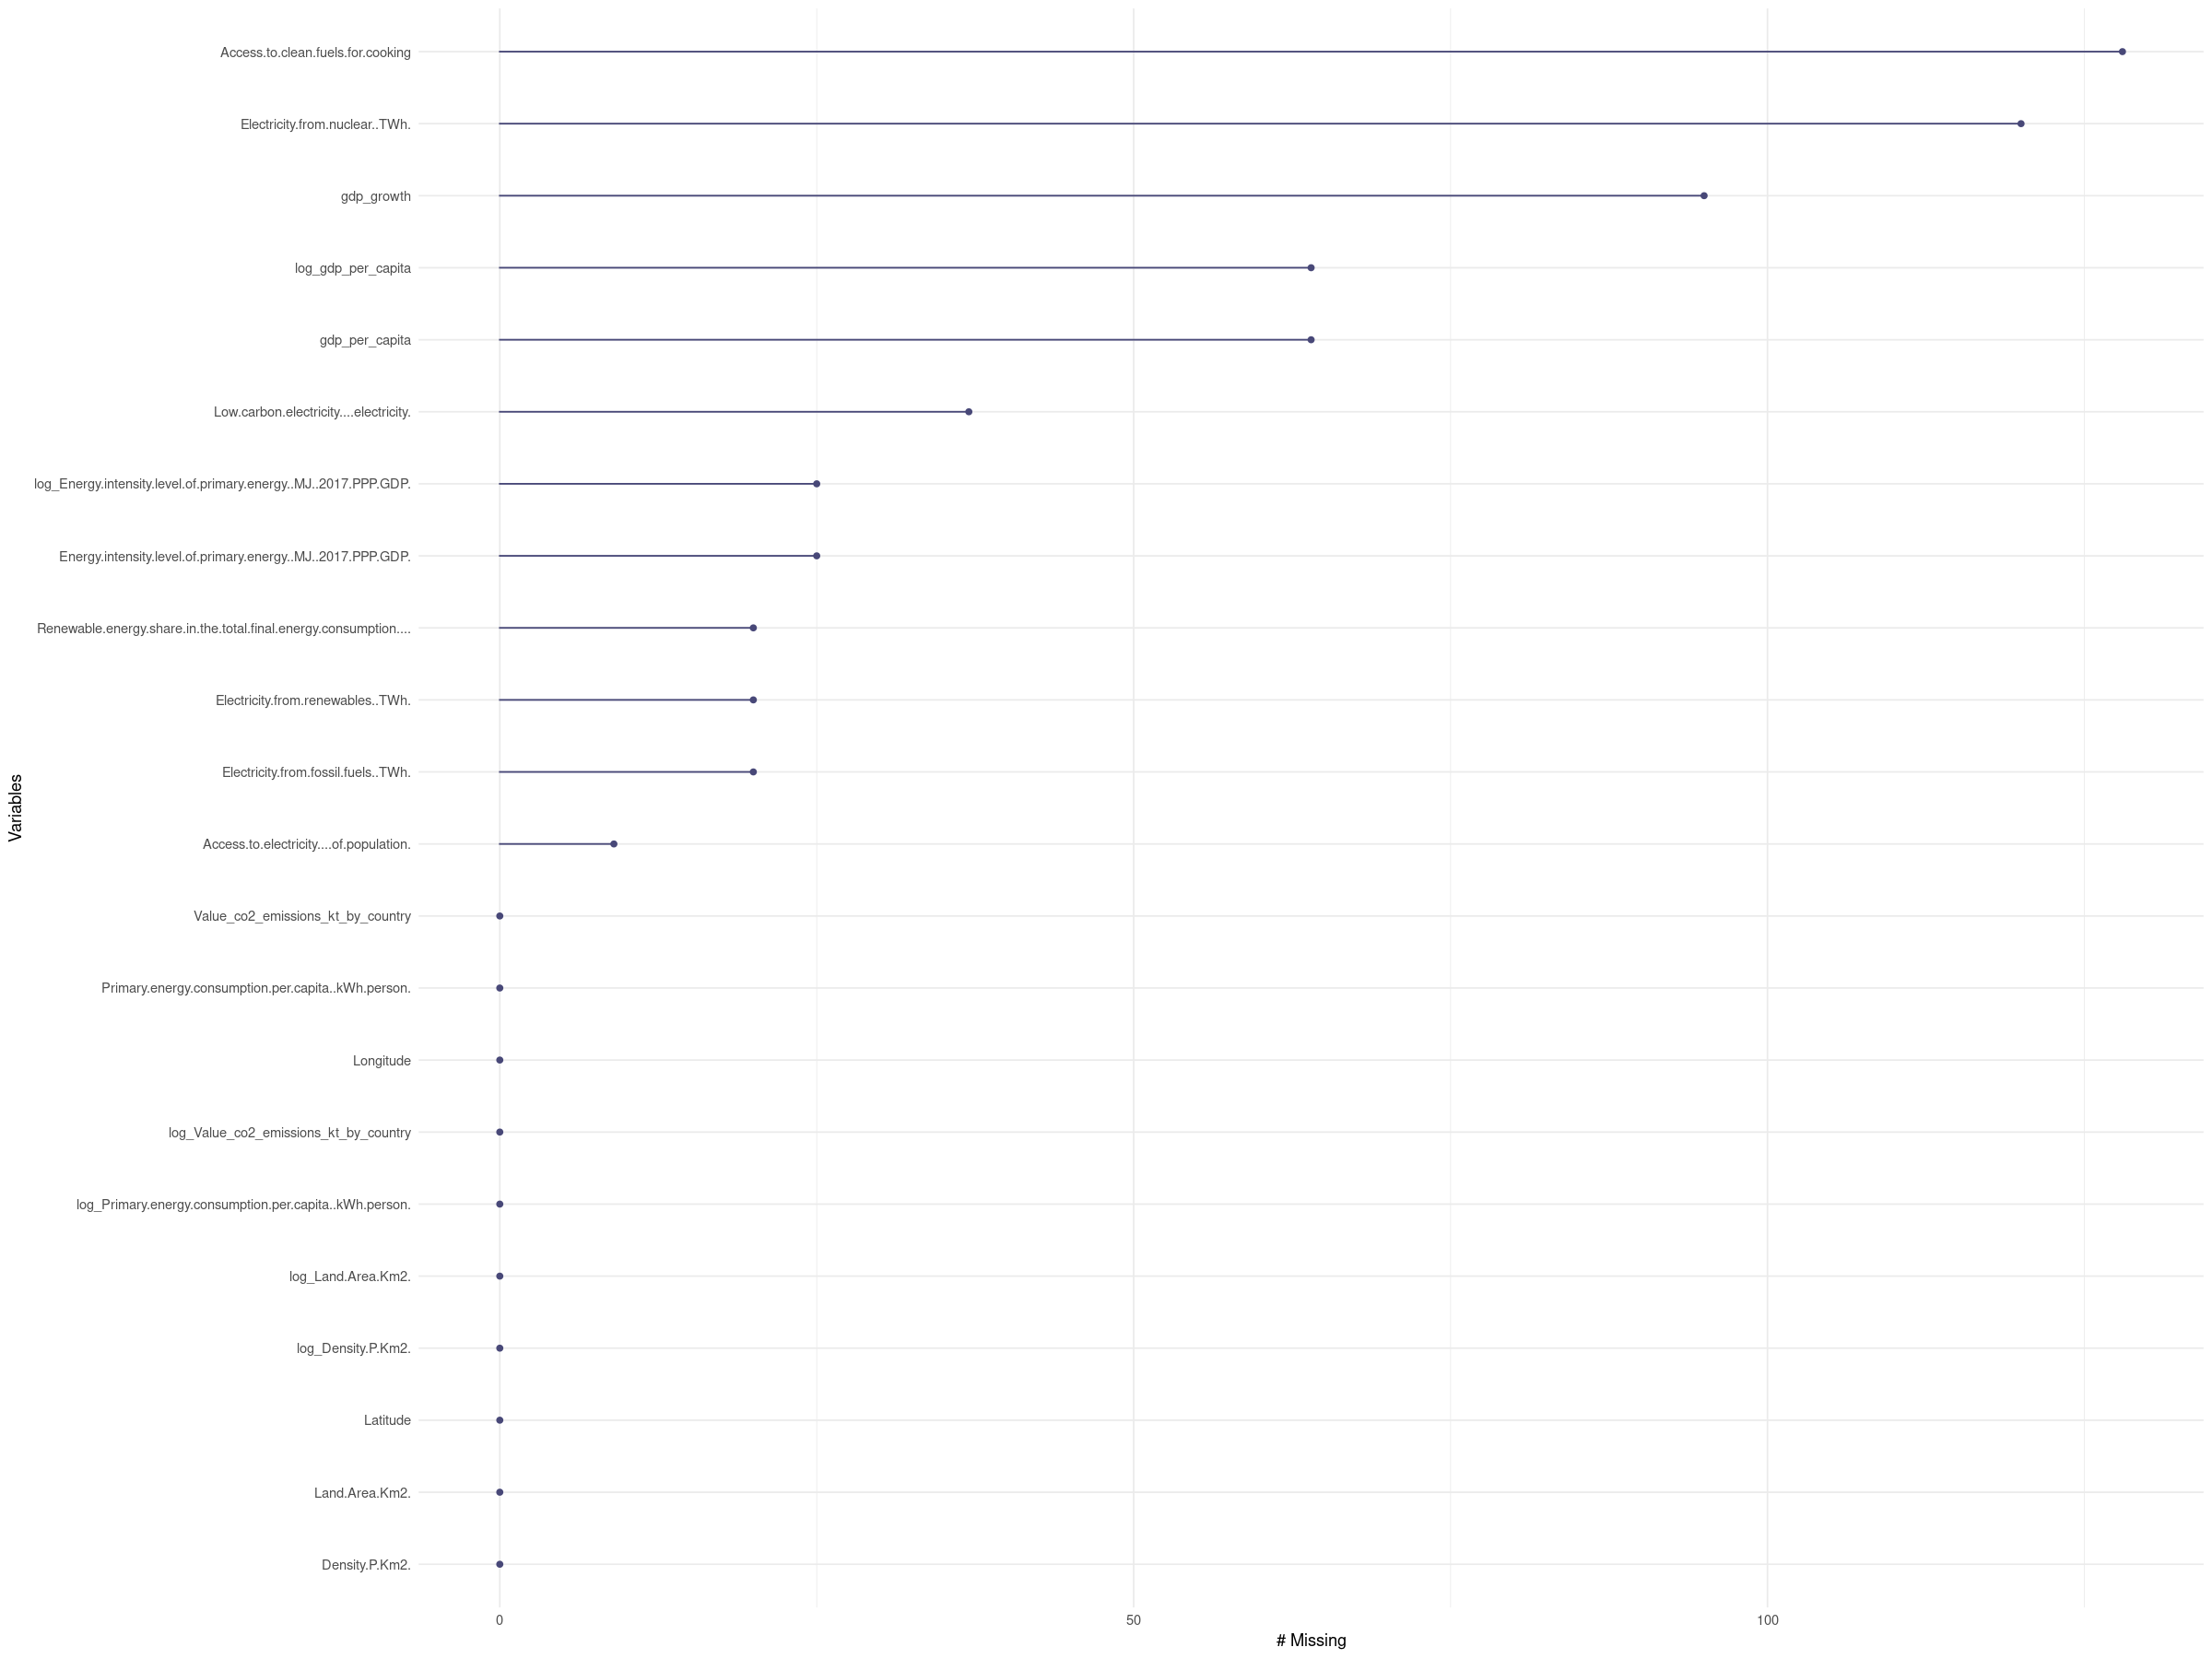

In [95]:
Xnaquanti=Xnaquanti[,-c(3,4,13)] 
gg_miss_var(Xnaquanti)

In [96]:
print(paste("inf : ",sum(is.infinite(Xnaquanti$log_Primary.energy.consumption.per.capita..kWh.person.))))
Xnaquanti <- subset(Xnaquanti, is.finite(log_Primary.energy.consumption.per.capita..kWh.person.))
print(paste("inf : ",sum(is.infinite(Xnaquanti$log_Primary.energy.consumption.per.capita..kWh.person.))))

[1] "inf :  20"
[1] "inf :  0"


On voit bien qu'on n'a plus aucune valeur NA, ni de valeurs "infini", qui pourraient fausser les analyses.

On choisit les imputations de données suivantes : kNN et missForest, car il s'agit des plus preformantes dans le cas général.

On note que kNN pourrait très bien fonctionner en particulier, notre dataframe ayant une géométrie assez particulière : les observations étant regroupés par pays. On n'utilise cependant pas la complétion par la dernière variable vue, cette dernière étant moins robuste que kNN.

### 1. Complétion par les k plus proches voisins

L'algorithme de complétion KNN (K-Nearest Neighbors) impute les valeurs manquantes en remplaçant chaque valeur manquante par la moyenne ou la médiane des valeurs des k voisins les plus proches dans l'espace des caractéristiques.

L'argument 'k=5' spécifie que pour chaque valeur manquante, l'algorithme kNN utilisera les 5 voisins les plus proches pour estimer la valeur manquante.

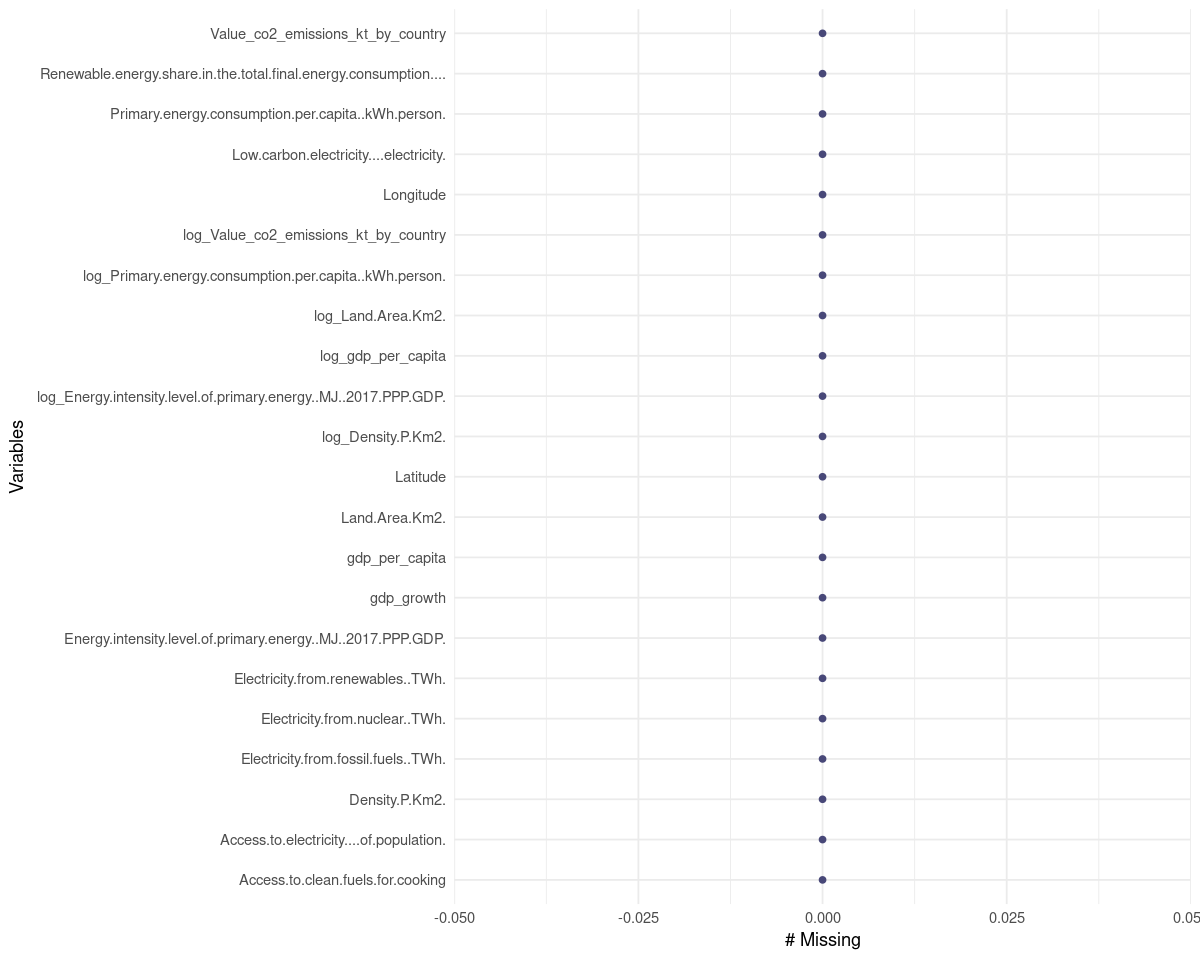

In [194]:
library(VIM)
X.kNN=kNN(Xnaquanti, k=5, imp_var=FALSE) 
gg_miss_var(X.kNN)

In [199]:
set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(X.kNN) # nombre de lignes dans les données
nvar <- ncol(X.kNN) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

# construction de l'échantillon d'apprentissage avec la variable à expliquer transformée
train <- X.kNN[appri, -c(1,2,6,12)]
# construction de l'échantillon test
test <- X.kNN[testi, -c(1,2,6,12)]

# vérification du contenu des échantillons
str(train)
str(test)

'data.frame':	2560 obs. of  18 variables:
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 33.9 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.34 0.2 0.2 0.16 0.19 0.18 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Low.carbon.electricity....electricity.                          : num  66 84.7 81.2 67 63.4 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  303 237 211 230 252 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.64 1.74 1.4 1.4 1.41 1.5 1.53 2.25 2.46 3.23 ...
 $ Value_co2_emissions_kt_by_country                               : num  760 730 1030 1220 1550 ...
 $ gdp_growth                                                      : num  8.83 8.83 8.83 8.83 11.23 ...
 $ Density.P.Km2.                                                  : num  60 60 60 60 60 60 60 60 60 60 ..

In [176]:
random_forest_knn = randomForest(log_Value_co2_emissions_kt_by_country ~ ., data = train, mtry = nb_opt)

fit.rfr_knn= predict(random_forest_knn, train)
res.rfr_knn=fit.rfr_knn-train$log_Value_co2_emissions_kt_by_country

pred.rf_knn = predict(random_forest_knn,newdata=test)
res.pred.rf_knn =pred.rf_knn-test$log_Value_co2_emissions_kt_by_country

In [177]:
svm_poly_knn = svm(log_Value_co2_emissions_kt_by_country ~ ., data = train,
               cost = 10, gamma = 0.025, coef0 = 2, degree = 3, kernel = "polynomial")

fit.poly_knn = predict(svm_poly_knn,data=train)
res.poly_knn=fit.poly_knn-train$log_Value_co2_emissions_kt_by_country

pred.poly_knn = predict(svm_poly_knn,newdata=test)
res.pred.poly_knn =pred.poly_knn-test$log_Value_co2_emissions_kt_by_country

In [200]:
nnetOpt_knn = nnet(log_Value_co2_emissions_kt_by_country~.,
               data=train,size=optimal_size,decay=optimal_decay,linout=TRUE,maxit=5000)

fit.nnetOpt_knn=predict(nnetOpt_knn,data=train)
res.nnetOpt_knn=fit.nnetOpt_knn-train$log_Value_co2_emissions_kt_by_country

pred.nnet_knn = predict(nnetOpt_knn,newdata=test)
res.pred.nnet_knn =pred.nnet_knn-test$log_Value_co2_emissions_kt_by_country

# weights:  894
initial  value 348996.482647 
iter  10 value 11495.194782
iter  20 value 9467.109575
iter  30 value 9312.148550
iter  40 value 8957.523737
iter  50 value 8601.909061
iter  60 value 8369.330660
iter  70 value 8149.995825
iter  80 value 8147.008264
iter  90 value 5230.087227
iter 100 value 4529.523041
iter 110 value 4396.930069
iter 120 value 4019.382481
iter 130 value 3489.980880
iter 140 value 3219.430432
iter 150 value 3118.717987
iter 160 value 3052.043635
iter 170 value 2903.774449
iter 180 value 2830.699679
iter 190 value 2733.134978
iter 200 value 2677.177111
iter 210 value 2660.536305
iter 220 value 2632.967149
iter 230 value 2628.862265
iter 240 value 2614.002362
iter 250 value 2604.938941
iter 260 value 2574.530110
iter 270 value 2567.415246
iter 280 value 2536.114821
iter 290 value 2525.865159
iter 300 value 2504.967921
iter 310 value 2498.297927
iter 320 value 2492.355475
iter 330 value 2484.985087
iter 340 value 2483.849668
iter 350 value 2476.965243
iter 360

### 2. Complétion par MissForest

MissForest est une méthode d'imputation des données manquantes qui utilise des forêts aléatoires. Elle remplace les valeurs manquantes en utilisant des prédictions basées sur les données observées dans les autres variables. Ce processus est itératif et se poursuit jusqu'à convergence. 


Attachement du package : ‘missForest’


L'objet suivant est masqué depuis ‘package:VIM’:

    nrmse




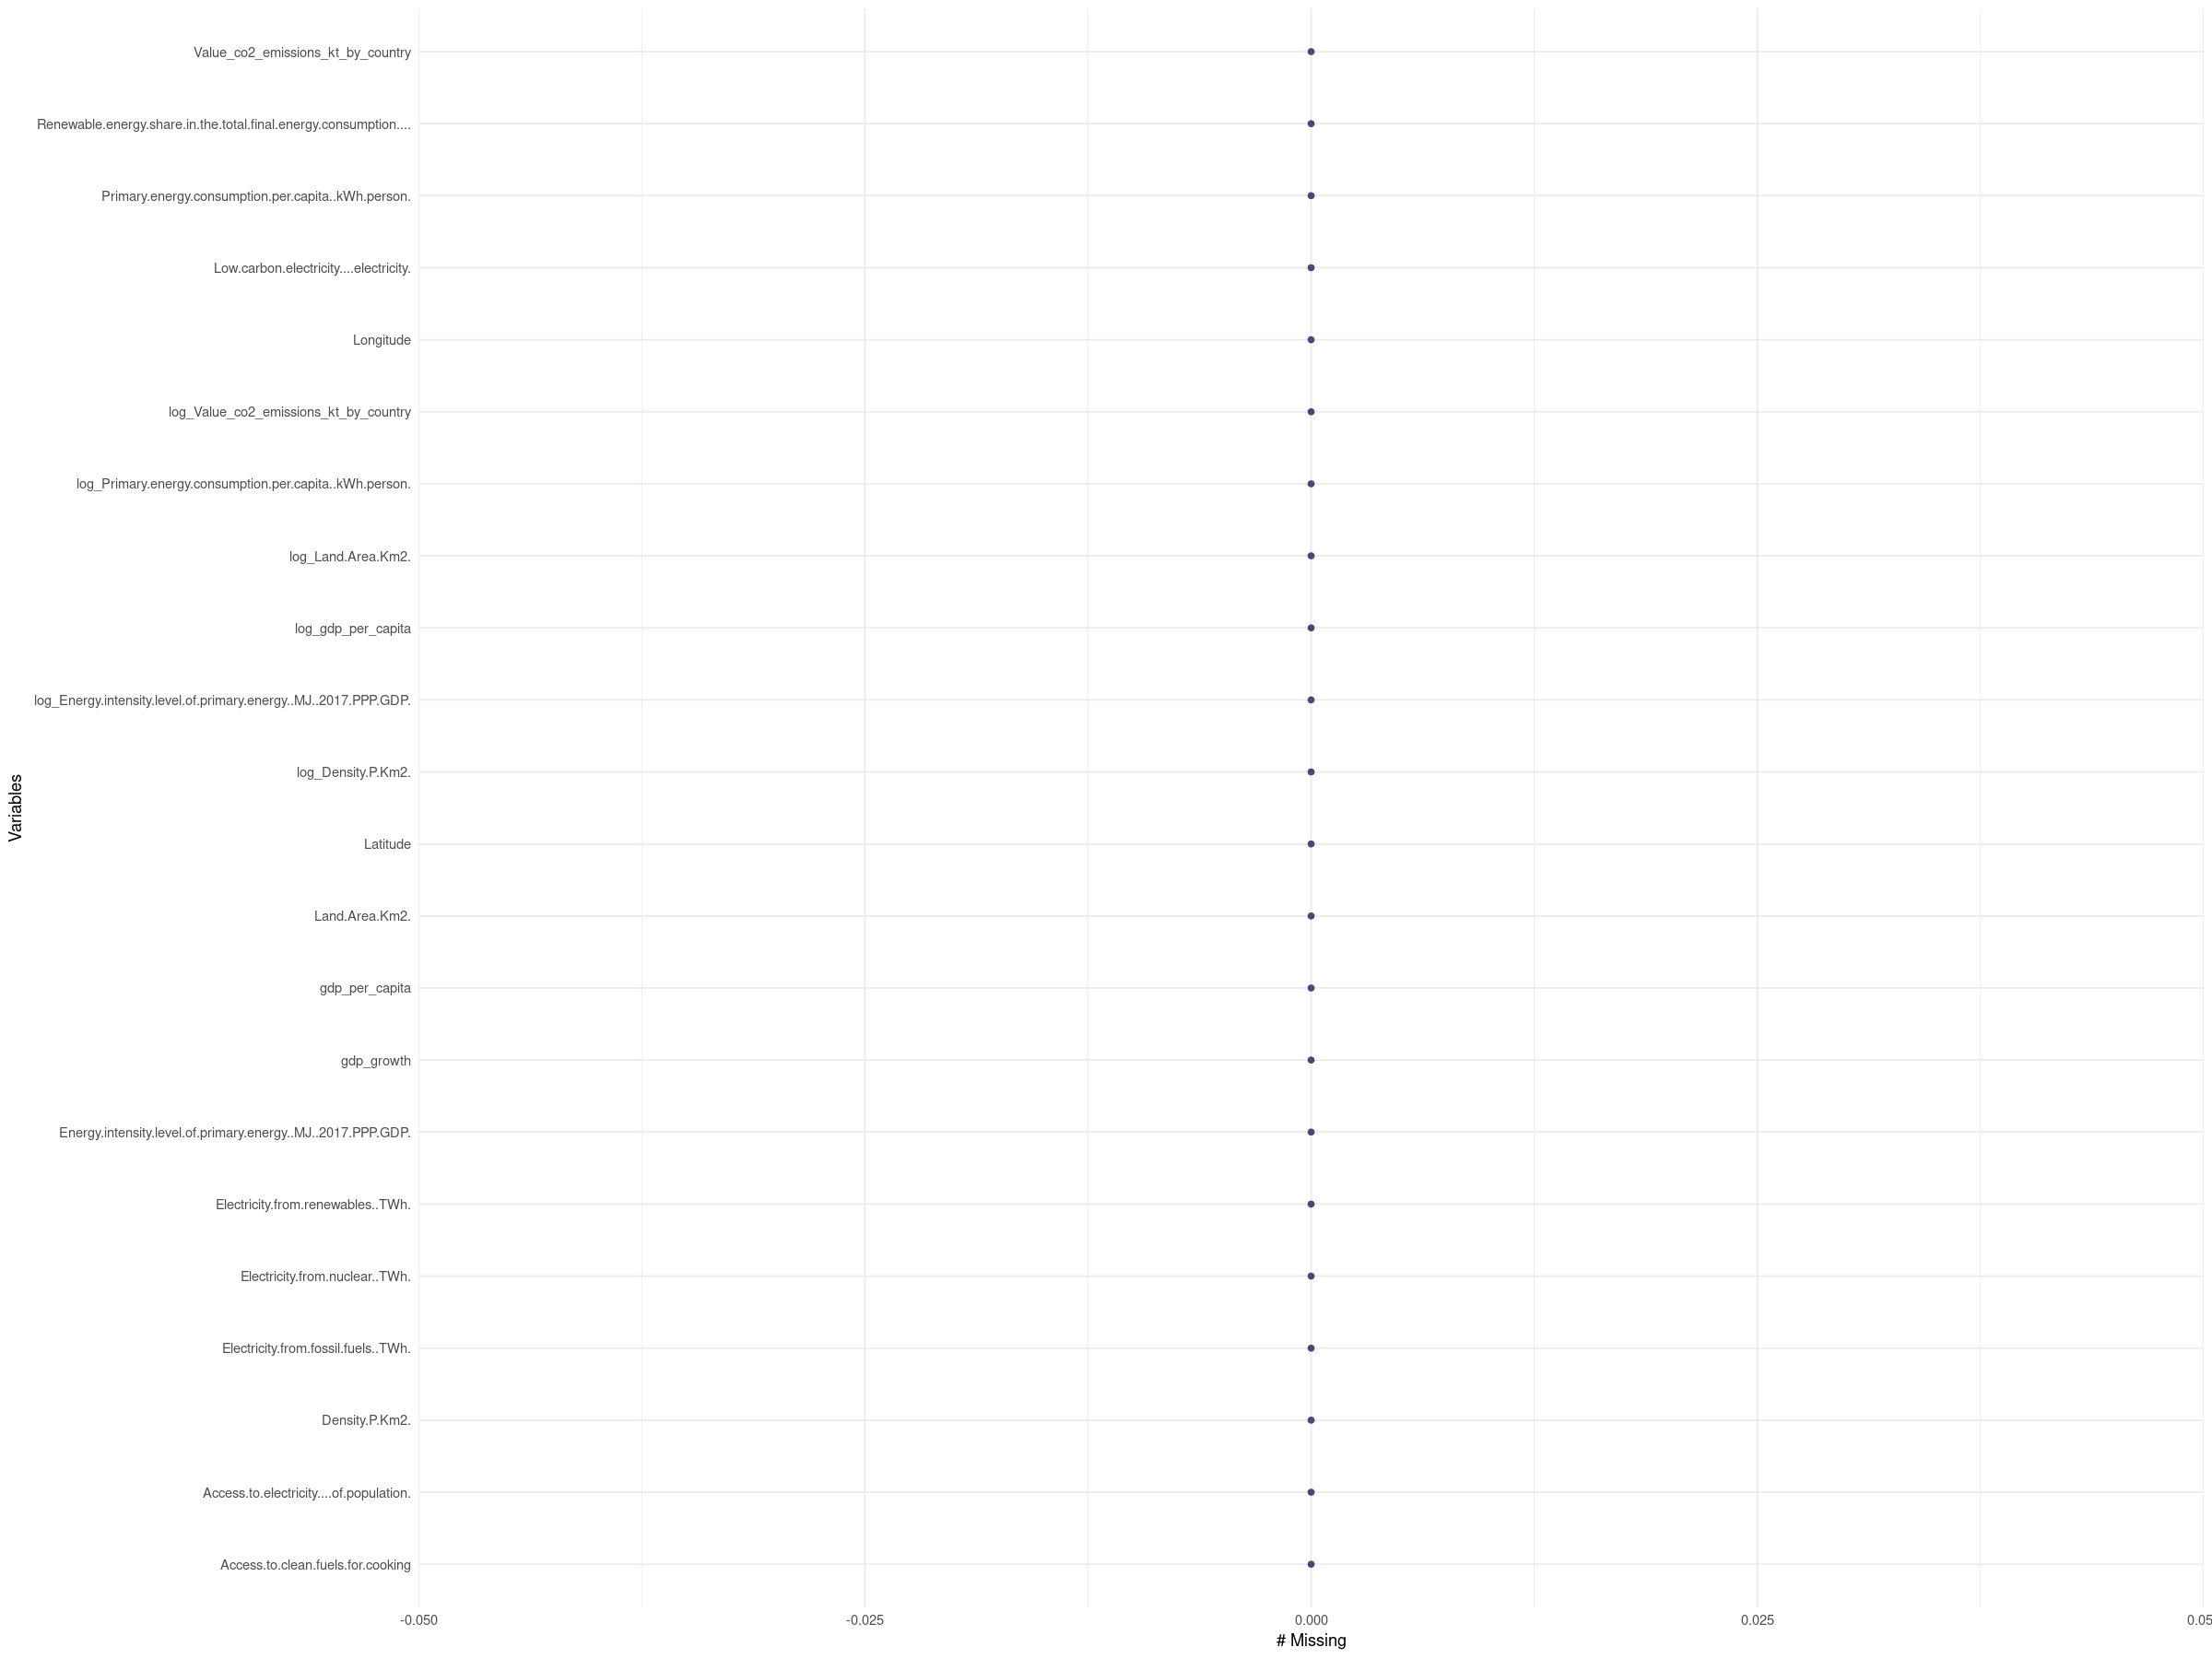

In [102]:
library(missForest)
X.mf=missForest(Xnaquanti,maxiter=10)
X.mf <- as.data.frame(X.mf$ximp)
gg_miss_var(X.mf)

In [103]:
set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(X.mf) # nombre de lignes dans les données
nvar <- ncol(X.mf) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

# construction de l'échantillon d'apprentissage avec la variable à expliquer transformée
train <- X.mf[appri, -c(1,2,6,12)]
# construction de l'échantillon test
test <- X.mf[testi, -c(1,2,6,12)]

# vérification du contenu des échantillons
str(train)
str(test)

'data.frame':	2560 obs. of  18 variables:
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 33.9 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.34 0.2 0.2 0.16 0.19 0.18 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Low.carbon.electricity....electricity.                          : num  66 84.7 81.2 67 63.4 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  303 237 211 230 252 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.64 1.74 1.4 1.4 1.41 1.5 1.53 2.25 2.46 3.23 ...
 $ Value_co2_emissions_kt_by_country                               : num  760 730 1030 1220 1550 ...
 $ gdp_growth                                                      : num  5.49 5.24 5.22 8.83 11.23 ...
 $ Density.P.Km2.                                                  : num  60 60 60 60 60 60 60 60 60 60 ..

In [104]:
random_forest_mf = randomForest(log_Value_co2_emissions_kt_by_country ~ ., data = train, mtry = nb_opt)

fit.rfr_mf= predict(random_forest_mf, train)
res.rfr_mf=fit.rfr_mf-train$log_Value_co2_emissions_kt_by_country

pred.rf_mf = predict(random_forest_mf,newdata=test)
res.pred.rf_mf =pred.rf_mf-test$log_Value_co2_emissions_kt_by_country

In [105]:
svm_poly_mf = svm(log_Value_co2_emissions_kt_by_country ~ ., data = train,
               cost = 10, gamma = 0.025, coef0 = 2, degree = 3, kernel = "polynomial")

fit.poly_mf = predict(svm_poly_mf,data=train)
res.poly_mf=fit.poly_mf-train$log_Value_co2_emissions_kt_by_country

pred.poly_mf = predict(svm_poly_mf,newdata=test)
res.pred.poly_mf =pred.poly_mf-test$log_Value_co2_emissions_kt_by_country

In [106]:
nnetOpt_mf = nnet(log_Value_co2_emissions_kt_by_country~.,
               data=train,size=optimal_size,decay=optimal_decay,linout=TRUE,maxit=5000)

fit.nnetOpt_mf=predict(nnetOpt_mf,data=train)
res.nnetOpt_mf=fit.nnetOpt_mf-train$log_Value_co2_emissions_kt_by_country

pred.nnet_mf = predict(nnetOpt_mf,newdata=test)
res.pred.nnet_mf =pred.nnet_mf-test$log_Value_co2_emissions_kt_by_country

# weights:  894
initial  value 414250.222219 
iter  10 value 8517.270953
iter  20 value 5632.326980
iter  30 value 5221.420684
iter  40 value 4978.261002
iter  50 value 4378.480622
iter  60 value 4156.728350
iter  70 value 3943.129206
iter  80 value 3881.831547
iter  90 value 3805.237607
iter 100 value 3802.421117
iter 110 value 3723.756621
iter 120 value 3638.972387
iter 130 value 3598.351187
iter 140 value 3494.799809
iter 150 value 3451.918395
iter 160 value 3257.339672
iter 170 value 3051.621821
iter 180 value 3003.906211
iter 190 value 2992.456801
iter 200 value 2937.920565
iter 210 value 2935.673623
iter 220 value 2850.640904
iter 230 value 2767.297324
iter 240 value 2738.224249
iter 250 value 2727.376902
iter 260 value 2726.009381
iter 270 value 2706.956786
iter 280 value 2706.298304
iter 290 value 2691.318495
iter 300 value 2689.089120
iter 310 value 2685.073552
iter 320 value 2674.596561
iter 330 value 2672.622489
iter 340 value 2671.767339
iter 350 value 2654.384988
iter 360 

## Comparaison des deux imputations de données

Dans cette partie, on va comparer l'erreur de généralisation des méthodes d'imputation de données suivantes : kNN, miss forest, sur les modèles suivants : random forest, SVM (noyau polynomial), et un réseau de neurones. On fait cela dans le but de choisir l'imputation de données que l'on va comparer avec nos analyses précédentes.

### Random Forest  

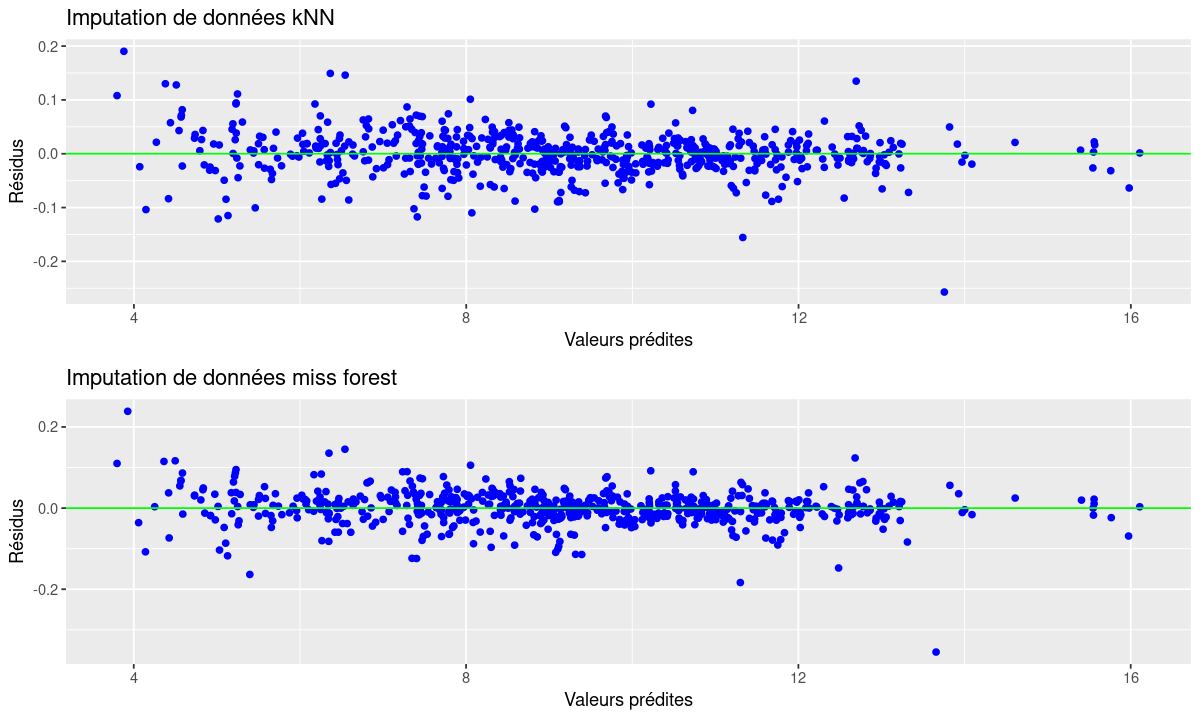

In [179]:
kNN.plot <- gplot.res(pred.rf_knn, res.pred.rf_knn, titre="Imputation de données kNN")
mf.plot <- gplot.res(pred.rf_mf, res.pred.rf_mf, titre="Imputation de données miss forest")

grid.arrange(kNN.plot, mf.plot)

In [180]:
print(paste("kNN :",mean(res.pred.rf_knn**2)))
print(paste("Miss Forest :", mean(res.pred.rf_mf**2)))

[1] "kNN : 0.00156455763345289"
[1] "Miss Forest : 0.00180262162528819"


Pour random forest, missForest semble plus performant que kNN en observant le graphe des résidus. Cependant, la MSE nous dit l'inverse, ce qui est sûrement dû au fait que missForest semble très mal classifier certains points, la où kNN semble avoir moins de variance.

### SVM Polynomial

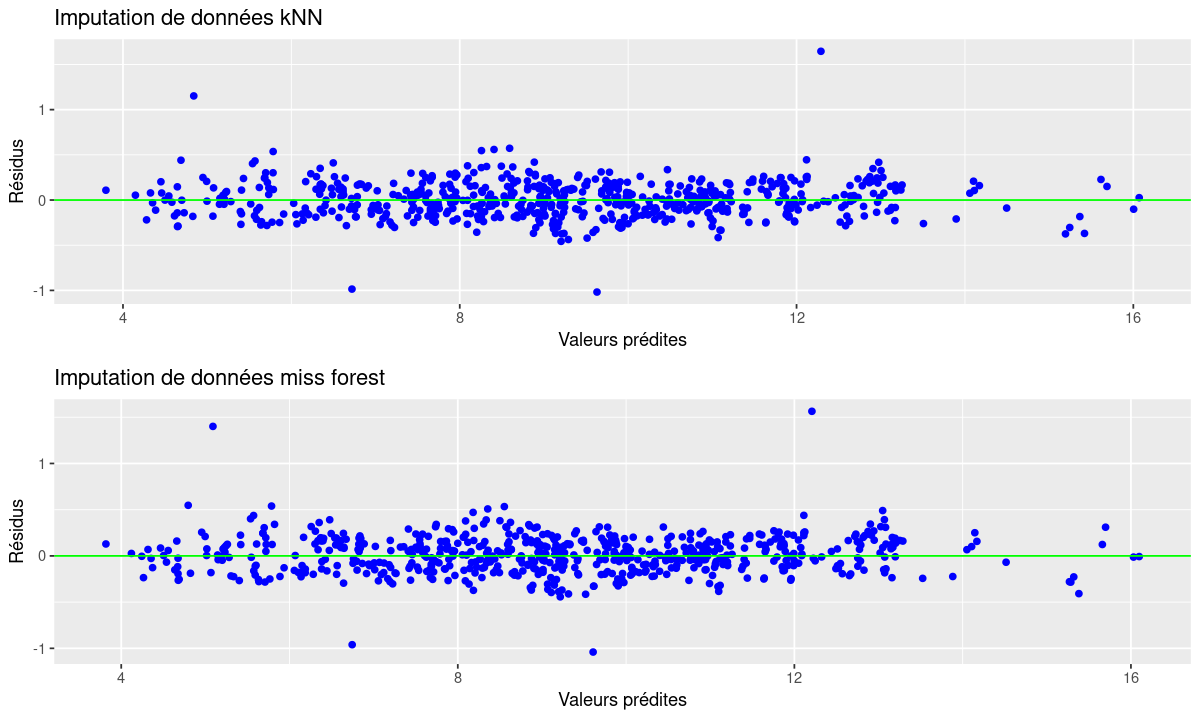

In [181]:
kNN.plot <- gplot.res(pred.poly_knn, res.pred.poly_knn, titre="Imputation de données kNN")
mf.plot <- gplot.res(pred.poly_mf, res.pred.poly_mf, titre="Imputation de données miss forest")

grid.arrange(kNN.plot, mf.plot)

In [182]:
print(paste("kNN :",mean(res.pred.poly_knn**2)))
print(paste("Miss Forest :",mean(res.pred.poly_mf**2)))

[1] "kNN : 0.0409544051120762"
[1] "Miss Forest : 0.0423791603382414"


Cette fois-ci, c'est miss forest qui est légèrement meilleur que kNN.

### Réseau de neurones

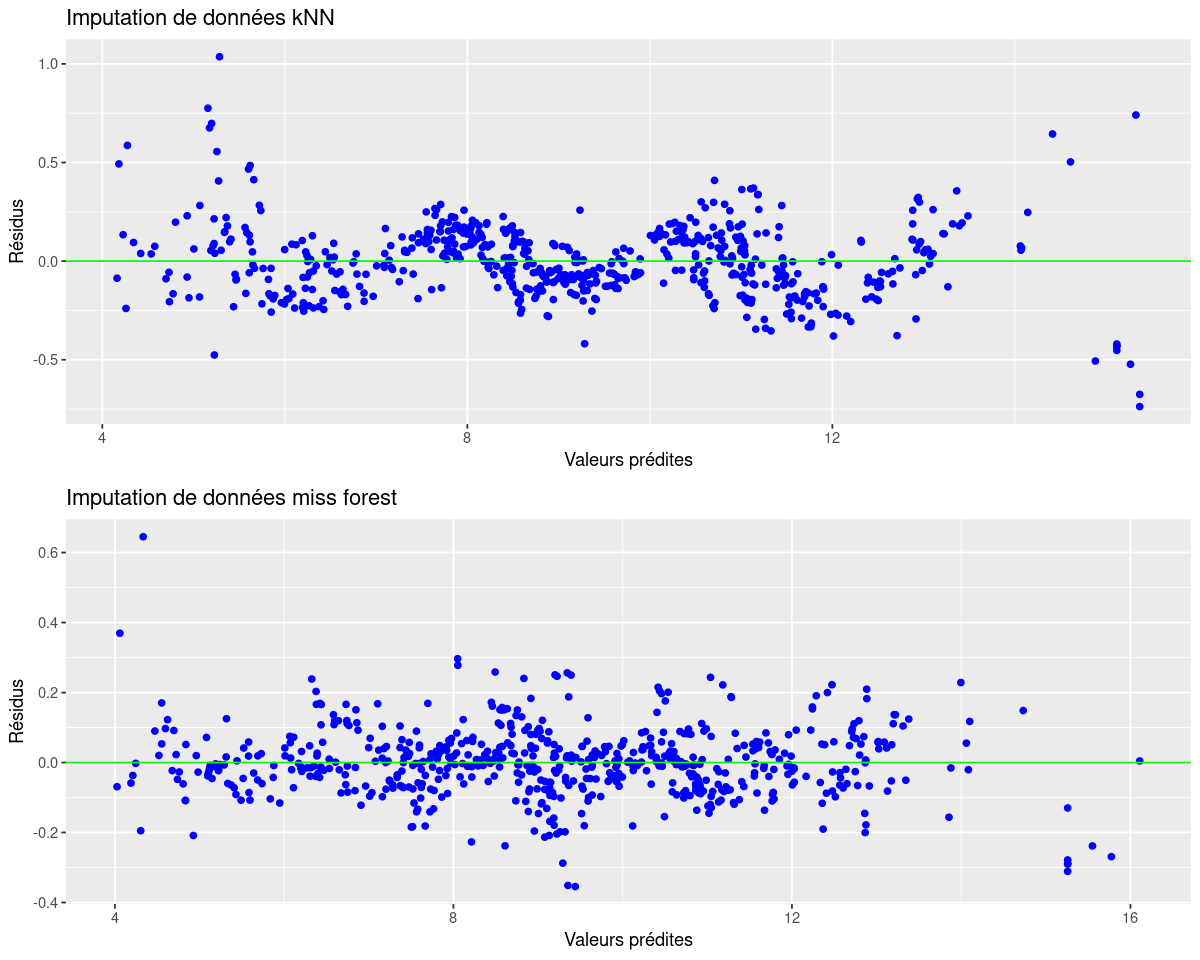

In [201]:
kNN.plot <- gplot.res(pred.nnet_knn, res.pred.nnet_knn, titre="Imputation de données kNN")
mf.plot <- gplot.res(pred.nnet_mf, res.pred.nnet_mf, titre="Imputation de données miss forest")

grid.arrange(kNN.plot, mf.plot)

In [184]:
print(paste("kNN :",mean(res.pred.nnet_knn**2)))
print(paste("Miss Forest :",mean(res.pred.nnet_mf**2)))

[1] "kNN : 1.2228388201785"
[1] "Miss Forest : 0.0098696313024769"


Pour le réseau de neurones, kNN semble être plus performant.

En conclusion, on va choisir la méthode d'imputation de données kNN, afin de compléter les valeurs manquantes dans le dataframe. On choisit cette dernière car elle est légèrement performante sur deux des trois méthodes testées, tout en prenant beaucoup moins de temps à s'éxecuter.

## Comparaison modèles avec et sans imputations

Dans cette partie, nous allons comparer les résultats obtenus pour nos meilleurs modèles, avec et sans imputation de données, en considérant uniqumeent l'imputation de données la plus efficace, à savoir kNN.

### Random Forest 

In [185]:
options(repr.plot.height = 8)

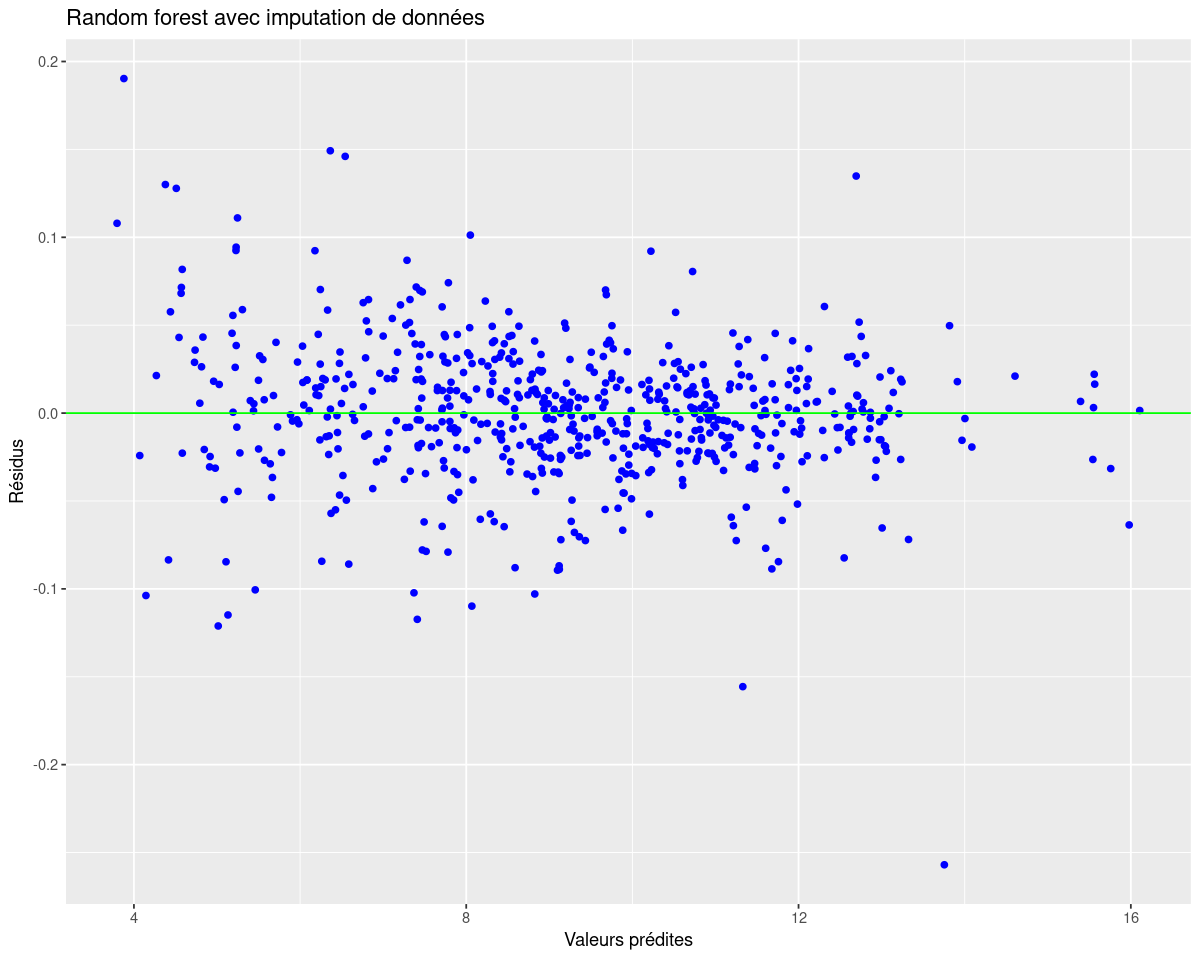

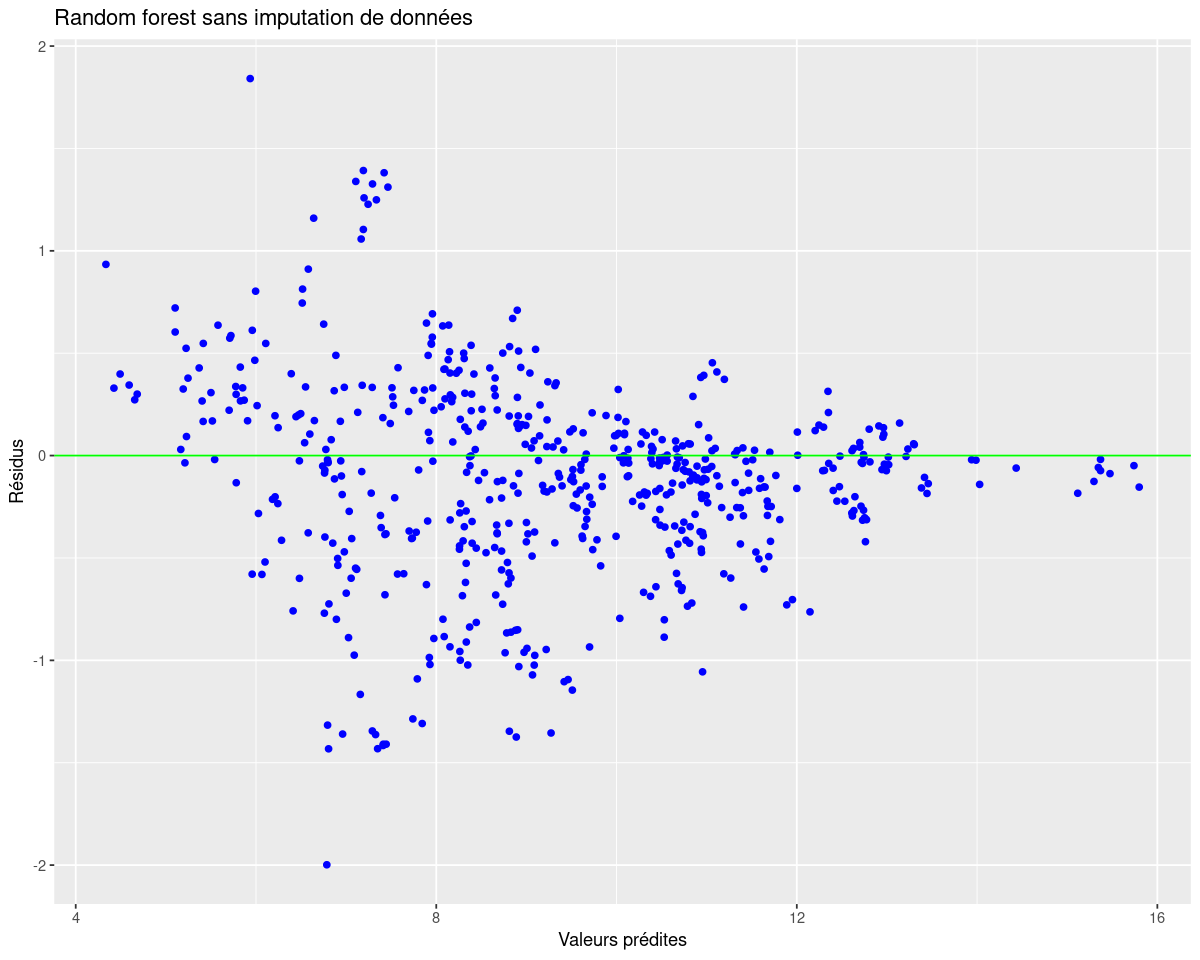

In [186]:
gplot.res(pred.rf_knn,res.pred.rf_knn,titre="Random forest avec imputation de données")
gplot.res(pred.rf,res.pred.rf,titre="Random forest sans imputation de données")

In [187]:
print(paste("Random forest avec imputation de données :", mean(res.pred.rf_knn**2)))
print(paste("Random forest sans imputation de données :", sum((pred.rf-scaled_test$log_Value_co2_emissions_kt_by_country)^2)/nrow(scaled_test)))

[1] "Random forest avec imputation de données : 0.00156455763345289"
[1] "Random forest sans imputation de données : 0.245142437235113"


### SVM Polynomial

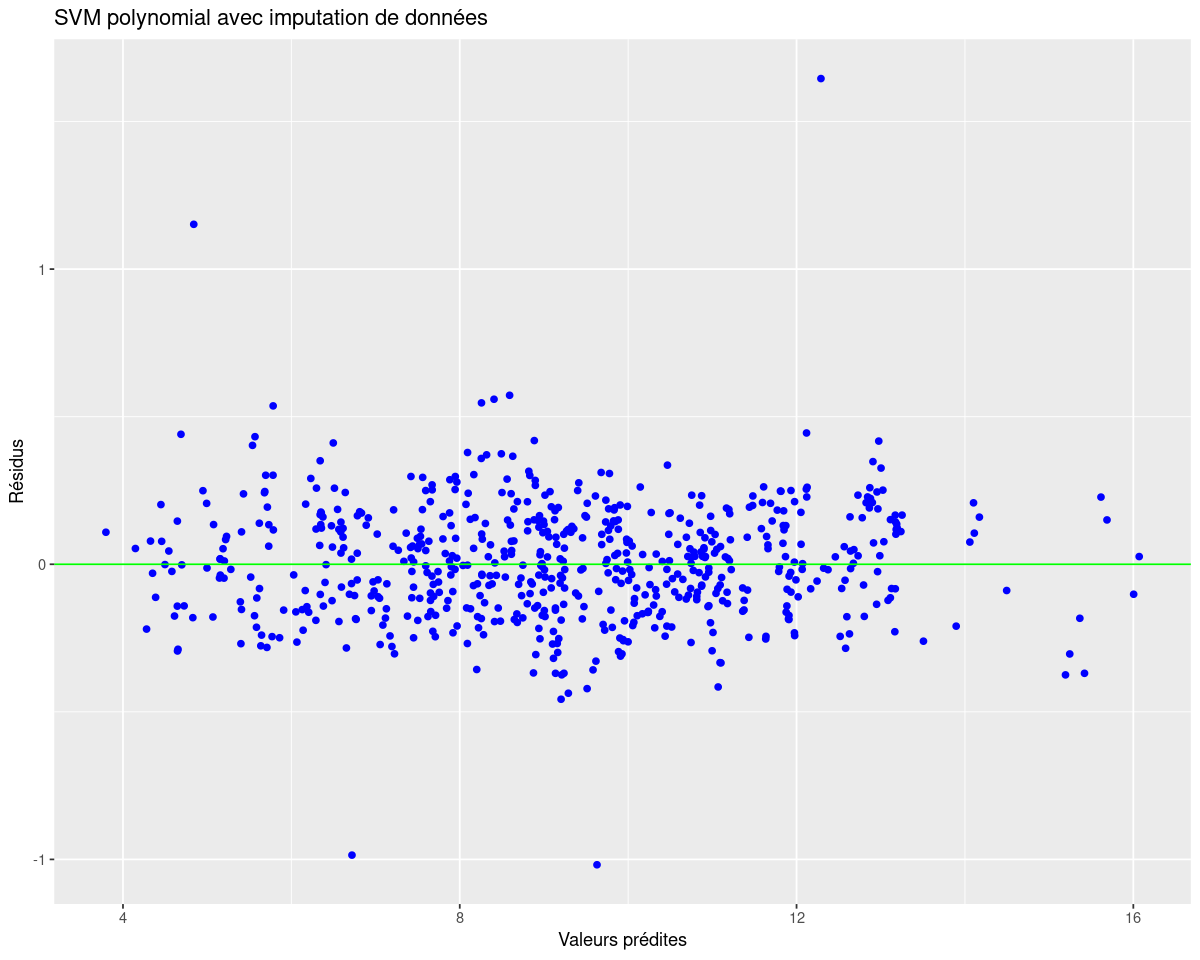

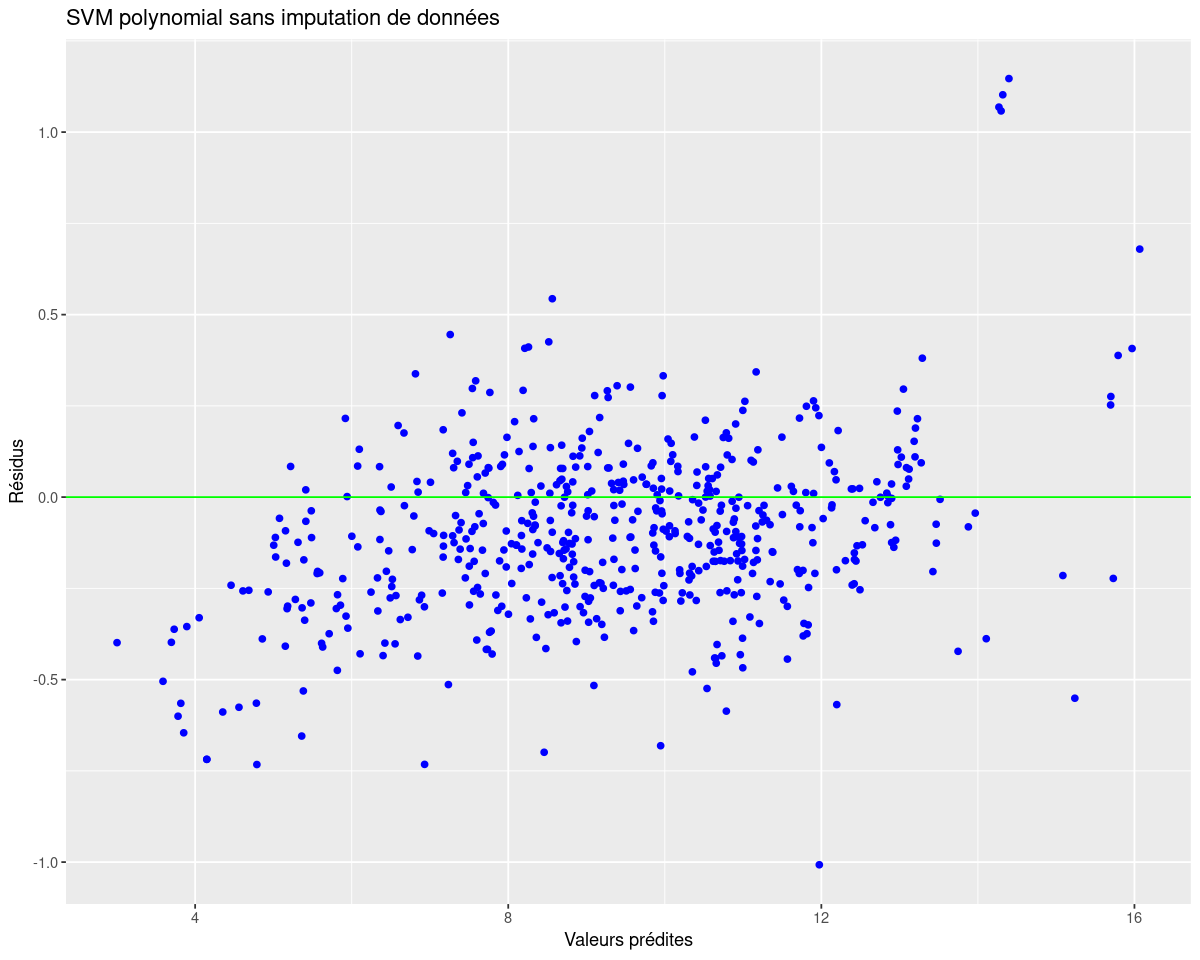

In [188]:
gplot.res(pred.poly_knn, res.pred.poly_knn, titre="SVM polynomial avec imputation de données")
gplot.res(pred.svm_poly,res.pred.svm_poly,titre = "SVM polynomial sans imputation de données")

In [189]:
print(paste("SVM polynomial avec imputation de données :",mean(res.pred.poly_knn**2)))
print(paste("SVM polynomial sans imputation de données :",sum((pred.svm_poly - scaled_test$log_Value_co2_emissions_kt_by_country)^2) / nrow(scaled_test)))

[1] "SVM polynomial avec imputation de données : 0.0409544051120762"
[1] "SVM polynomial sans imputation de données : 0.0654554592918537"


### Réseau de neurones

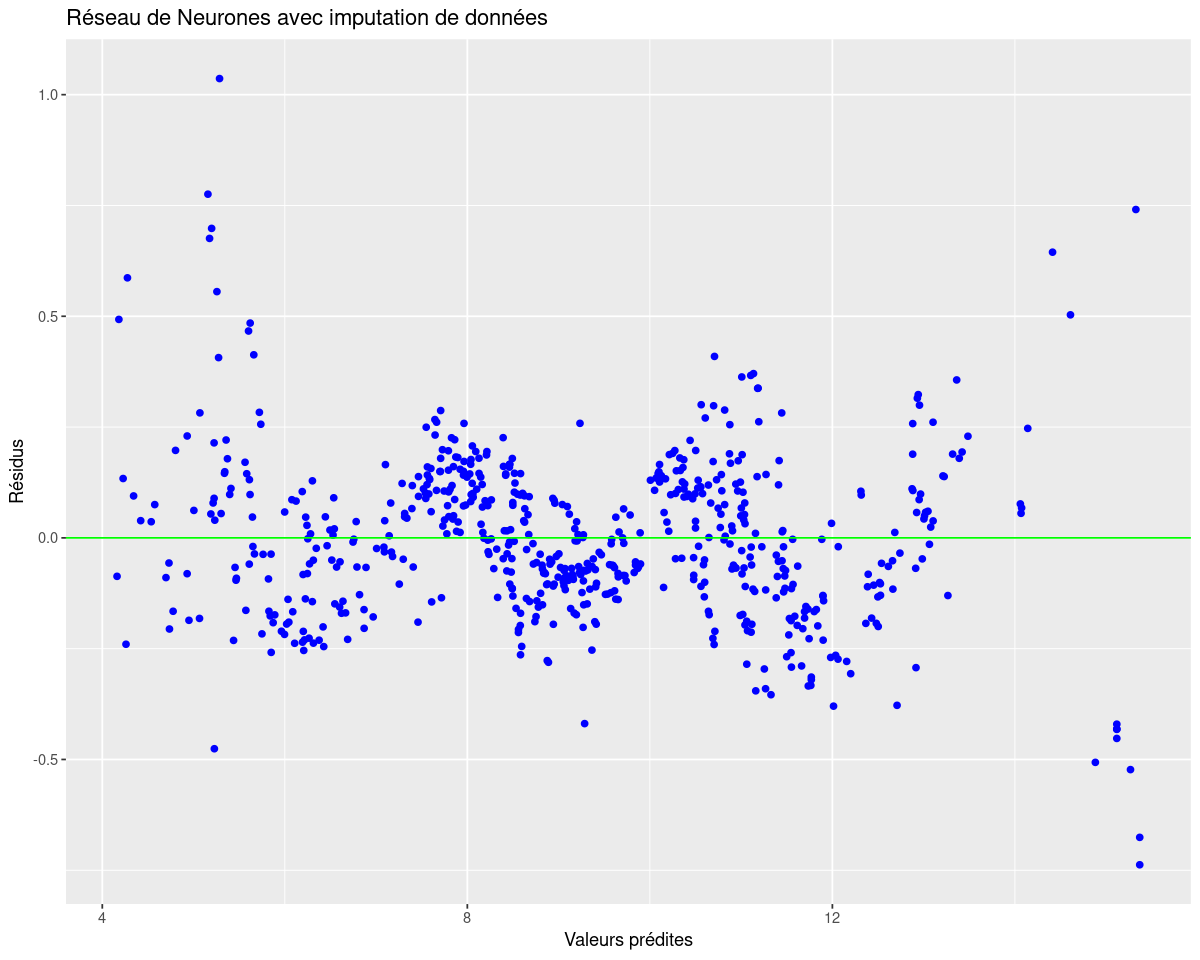

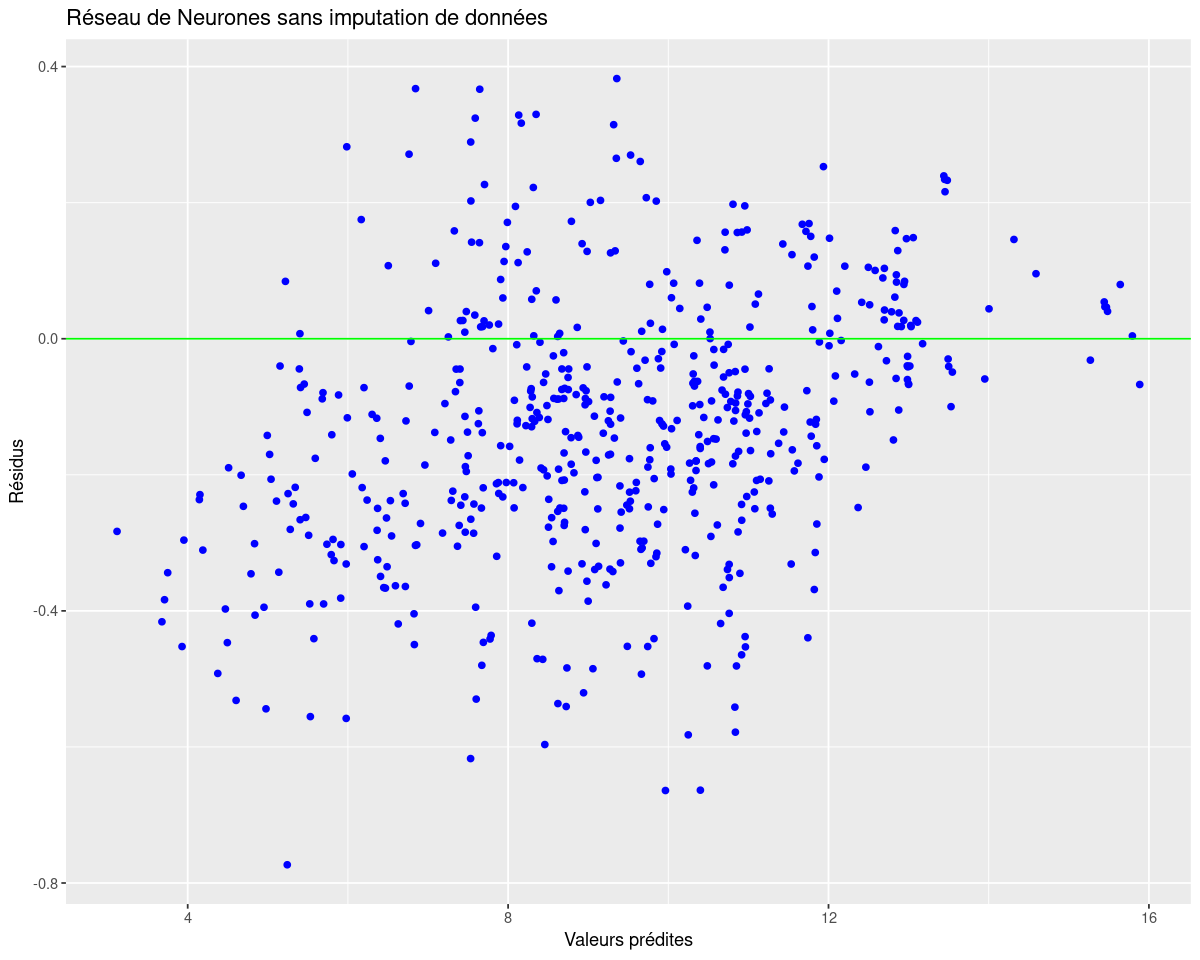

In [202]:
gplot.res(pred.nnet_knn,res.pred.nnet_knn,titre="Réseau de Neurones avec imputation de données")
gplot.res(pred.nnetOpt,res.pred.nnetOpt,titre="Réseau de Neurones sans imputation de données")

In [203]:
print(paste("Réseau de Neurones avec imputation de données :",mean(res.pred.nnet_knn**2)))
print(paste("Réseau de Neurones sans imputation de données",sum((pred.nnetOpt-scaled_test$log_Value_co2_emissions_kt_by_country)^2)/nrow(scaled_test)))


[1] "Réseau de Neurones avec imputation de données : 0.0335596951970608"
[1] "Réseau de Neurones sans imputation de données 0.0532122753005336"


On trouve ainsi que le jeu de données avec imputation de données est globalement plus performant que le jeu de données non imputé. Ainsi, il semblerait que l'imputation de données kNN soit très efficace sur notre jeu de données, et le meilleur modèle que l'on trouve serait random forest, sur les données imputées avec kNN.